## Problem Statement

The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

In the Boolean features, 1 means "yes" and 2 means "no". values as 97, 98 and 99 are missing data.

<li> Sex: 1 for female and 2 for male. </li></li> 
<li>  Age: of the patient. </li> 
<li>  classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive. </li> 
<li>  patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization. </li> 
<li>  Pneumonia: whether the patient already have air sacs inflammation or not. </li> 
<li>  pregnancy: whether the patient is Pregnant or not. </li> 
<li>  Diabetes: whether the patient has Diabetes or not. </li> 
<li>  Copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not. </li> 
<li>  Asthma: whether the patient has Asthma or not. </li> 
<li>  Inmsupr: whether the patient is immunosuppressed or not. </li> 
<li>  Hypertension: whether the patient has Hypertension or not. </li> 
<li>  Cardiovascular: whether the patient has heart or blood vessels related disease. </li> 
<li>  renal chronic: whether the patient has chronic renal disease or not. </li> 
<li>  other disease: whether the patient has other disease or not. </li> 
<li>  Obesity: whether the patient is obese or not. </li> 
<li>  Tobacco: whether the patient is a Tobacco user. </li> 
<li>  usmr: Indicates whether the patient treated medical units of the first, second or third level. </li> 
<li>  medical unit: type of institution of the National Health System that provided the care. </li> 
<li>  Intubed: whether the patient was connected to the ventilator. </li> 
<li>  Icu: Indicates whether the patient had been admitted to an Intensive Care Unit. </li> 
<li>  date died: If the patient died indicate the date of death, and 9999-99-99 otherwise. </li> 

## Libraries Used

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from jupyter_dash import JupyterDash

from explainerdashboard import *
from explainerdashboard.datasets import *
from explainerdashboard.custom import *

import dash_html_components as html
import dash_bootstrap_components as dbc

from explainerdashboard.custom import *
from explainerdashboard import ExplainerDashboard

C:\Users\dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
from sklearn.metrics import (ConfusionMatrixDisplay, accuracy_score,
                             classification_report, confusion_matrix, f1_score,
                             mean_squared_error, precision_score, recall_score,
                             roc_auc_score)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.discrete import discrete_model as dm
from statsmodels.tools import add_constant as ac

sc = StandardScaler()
le = LabelEncoder()

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier,
                              RandomForestClassifier, RandomForestRegressor)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (GridSearchCV, KFold, RandomizedSearchCV,
                                     StratifiedKFold, cross_val_score,
                                     train_test_split)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

rfr = RandomForestRegressor()
rfc = RandomForestClassifier()
import warnings

warnings.filterwarnings('ignore')
from collections import Counter
from pandarallel import pandarallel
from sklearn.svm import SVC

pd.options.display.max_columns = None #type: ignore
pd.options.display.max_rows = None #type: ignore

## Data Description

In [3]:
data = pd.read_csv(f'./Data/Covid Data.csv')

for i in data.columns:
    if i == 'HIPERTENSION':
        data.rename(columns = {'HIPERTENSION':'Hypertension'}, inplace = True)
    elif i == 'CLASIFFICATION_FINAL':
        data.rename(columns = {'CLASIFFICATION_FINAL':'Classification_Final'}, inplace = True)
    else:
        data.rename(columns={i: i.title()}, inplace=True) #type: ignore
data.head()

Usmer  Medical_Unit  Sex  Patient_Type   Date_Died  Intubed  Pneumonia  \
0      2             1    1             1  03/05/2020       97          1   
1      2             1    2             1  03/06/2020       97          1   
2      2             1    2             2  09/06/2020        1          2   
3      2             1    1             1  12/06/2020       97          2   
4      2             1    2             1  21/06/2020       97          2   

   Age  Pregnant  Diabetes  Copd  Asthma  Inmsupr  Hypertension  \
0   65         2         2     2       2        2             1   
1   72        97         2     2       2        2             1   
2   55        97         1     2       2        2             2   
3   53         2         2     2       2        2             2   
4   68        97         1     2       2        2             1   

   Other_Disease  Cardiovascular  Obesity  Renal_Chronic  Tobacco  \
0              2               2        2              2        2   
1              2               2        1              1        2   
2              2               2        2              2        2   
3              2               2        2              2        2   
4              2               2        2              2        2   

   Classification_Final  Icu  
0                     3   97  
1                     5   97  
2                     3    2  
3                     7   97  
4                     3   97

In [4]:
data.columns

Index(['Usmer', 'Medical_Unit', 'Sex', 'Patient_Type', 'Date_Died', 'Intubed',
       'Pneumonia', 'Age', 'Pregnant', 'Diabetes', 'Copd', 'Asthma', 'Inmsupr',
       'Hypertension', 'Other_Disease', 'Cardiovascular', 'Obesity',
       'Renal_Chronic', 'Tobacco', 'Classification_Final', 'Icu'],
      dtype='object')

In [5]:
data.shape

(1048575, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   Usmer                 1048575 non-null  int64 
 1   Medical_Unit          1048575 non-null  int64 
 2   Sex                   1048575 non-null  int64 
 3   Patient_Type          1048575 non-null  int64 
 4   Date_Died             1048575 non-null  object
 5   Intubed               1048575 non-null  int64 
 6   Pneumonia             1048575 non-null  int64 
 7   Age                   1048575 non-null  int64 
 8   Pregnant              1048575 non-null  int64 
 9   Diabetes              1048575 non-null  int64 
 10  Copd                  1048575 non-null  int64 
 11  Asthma                1048575 non-null  int64 
 12  Inmsupr               1048575 non-null  int64 
 13  Hypertension          1048575 non-null  int64 
 14  Other_Disease         1048575 non-null  int64 
 15

## Data Tweaking

### Typecasting

In [7]:
data.columns

Index(['Usmer', 'Medical_Unit', 'Sex', 'Patient_Type', 'Date_Died', 'Intubed',
       'Pneumonia', 'Age', 'Pregnant', 'Diabetes', 'Copd', 'Asthma', 'Inmsupr',
       'Hypertension', 'Other_Disease', 'Cardiovascular', 'Obesity',
       'Renal_Chronic', 'Tobacco', 'Classification_Final', 'Icu'],
      dtype='object')

In [8]:
data.replace({
    'Date_Died': {
    '9999-99-99': np.nan
    }}, inplace=True)

In [9]:
data[['Usmer', 'Medical_Unit', 'Sex', 'Patient_Type', 'Intubed', 'Pneumonia', 
    'Pregnant', 'Diabetes', 'Copd', 'Asthma', 'Inmsupr', 'Hypertension', 
    'Other_Disease', 'Cardiovascular', 'Obesity', 'Renal_Chronic', 'Tobacco', 
    'Classification_Final', 'Icu']] = data[['Usmer', 'Medical_Unit', 'Sex', 'Patient_Type', 
    'Intubed', 'Pneumonia', 'Pregnant', 'Diabetes', 'Copd', 'Asthma', 'Inmsupr', 
    'Hypertension', 'Other_Disease', 'Cardiovascular', 'Obesity', 'Renal_Chronic',
      'Tobacco', 'Classification_Final', 'Icu']].astype('category')

data['Date_Died'] = pd.to_datetime(data['Date_Died'], dayfirst=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Usmer                 1048575 non-null  category      
 1   Medical_Unit          1048575 non-null  category      
 2   Sex                   1048575 non-null  category      
 3   Patient_Type          1048575 non-null  category      
 4   Date_Died             76942 non-null    datetime64[ns]
 5   Intubed               1048575 non-null  category      
 6   Pneumonia             1048575 non-null  category      
 7   Age                   1048575 non-null  int64         
 8   Pregnant              1048575 non-null  category      
 9   Diabetes              1048575 non-null  category      
 10  Copd                  1048575 non-null  category      
 11  Asthma                1048575 non-null  category      
 12  Inmsupr               1048575 non-null  ca

In [10]:
data[['Medical_Unit', 'Sex', 'Patient_Type', 'Intubed', 'Pneumonia', 
    'Pregnant', 'Diabetes', 'Copd', 'Asthma', 'Inmsupr', 'Hypertension', 
    'Other_Disease', 'Cardiovascular', 'Obesity', 'Renal_Chronic', 'Tobacco', 
    'Classification_Final', 'Icu']].replace(to_replace=[97, 98, 99], value = np.nan, inplace = True)

data.head()

Usmer Medical_Unit Sex Patient_Type  Date_Died Intubed Pneumonia  Age  \
0     2            1   1            1 2020-05-03     NaN         1   65   
1     2            1   2            1 2020-06-03     NaN         1   72   
2     2            1   2            2 2020-06-09       1         2   55   
3     2            1   1            1 2020-06-12     NaN         2   53   
4     2            1   2            1 2020-06-21     NaN         2   68   

  Pregnant Diabetes Copd Asthma Inmsupr Hypertension Other_Disease  \
0        2        2    2      2       2            1             2   
1      NaN        2    2      2       2            1             2   
2      NaN        1    2      2       2            2             2   
3        2        2    2      2       2            2             2   
4      NaN        1    2      2       2            1             2   

  Cardiovascular Obesity Renal_Chronic Tobacco Classification_Final  Icu  
0              2       2             2       2                    3  NaN  
1              2       1             1       2                    5  NaN  
2              2       2             2       2                    3    2  
3              2       2             2       2                    7  NaN  
4              2       2             2       2                    3  NaN

In [11]:
# Column: Sex

data.replace({'Sex':{2: 'Male', 1: 'Female'}}, inplace = True)
data.head()

Usmer Medical_Unit     Sex Patient_Type  Date_Died Intubed Pneumonia  Age  \
0     2            1  Female            1 2020-05-03     NaN         1   65   
1     2            1    Male            1 2020-06-03     NaN         1   72   
2     2            1    Male            2 2020-06-09       1         2   55   
3     2            1  Female            1 2020-06-12     NaN         2   53   
4     2            1    Male            1 2020-06-21     NaN         2   68   

  Pregnant Diabetes Copd Asthma Inmsupr Hypertension Other_Disease  \
0        2        2    2      2       2            1             2   
1      NaN        2    2      2       2            1             2   
2      NaN        1    2      2       2            2             2   
3        2        2    2      2       2            2             2   
4      NaN        1    2      2       2            1             2   

  Cardiovascular Obesity Renal_Chronic Tobacco Classification_Final  Icu  
0              2       2             2       2                    3  NaN  
1              2       1             1       2                    5  NaN  
2              2       2             2       2                    3    2  
3              2       2             2       2                    7  NaN  
4              2       2             2       2                    3  NaN

In [12]:
# Column: Classification_Final

# pandarallel.initialize(progress_bar = True)

def clean_classification(x):
    if (x >= 4) & (x <= 9):
        return 'Not Found'
    elif x == 1:
        return 'Low'
    elif x == 2:
        return 'Medium'
    else:
        return 'High'

data['Classification_Final'] = data['Classification_Final'].apply(clean_classification)
data['Classification_Final'] = data['Classification_Final'].astype('category')
data.head()

Usmer Medical_Unit     Sex Patient_Type  Date_Died Intubed Pneumonia  Age  \
0     2            1  Female            1 2020-05-03     NaN         1   65   
1     2            1    Male            1 2020-06-03     NaN         1   72   
2     2            1    Male            2 2020-06-09       1         2   55   
3     2            1  Female            1 2020-06-12     NaN         2   53   
4     2            1    Male            1 2020-06-21     NaN         2   68   

  Pregnant Diabetes Copd Asthma Inmsupr Hypertension Other_Disease  \
0        2        2    2      2       2            1             2   
1      NaN        2    2      2       2            1             2   
2      NaN        1    2      2       2            2             2   
3        2        2    2      2       2            2             2   
4      NaN        1    2      2       2            1             2   

  Cardiovascular Obesity Renal_Chronic Tobacco Classification_Final  Icu  
0              2       2             2       2                 High  NaN  
1              2       1             1       2            Not Found  NaN  
2              2       2             2       2                 High    2  
3              2       2             2       2            Not Found  NaN  
4              2       2             2       2                 High  NaN

In [13]:
# Column: Patient Type

data.replace({
        'Patient_Type': {
        1: 'Home',
        2: 'Hospital'
        }}, inplace=True)

data.head()

Usmer Medical_Unit     Sex Patient_Type  Date_Died Intubed Pneumonia  Age  \
0     2            1  Female         Home 2020-05-03     NaN         1   65   
1     2            1    Male         Home 2020-06-03     NaN         1   72   
2     2            1    Male     Hospital 2020-06-09       1         2   55   
3     2            1  Female         Home 2020-06-12     NaN         2   53   
4     2            1    Male         Home 2020-06-21     NaN         2   68   

  Pregnant Diabetes Copd Asthma Inmsupr Hypertension Other_Disease  \
0        2        2    2      2       2            1             2   
1      NaN        2    2      2       2            1             2   
2      NaN        1    2      2       2            2             2   
3        2        2    2      2       2            2             2   
4      NaN        1    2      2       2            1             2   

  Cardiovascular Obesity Renal_Chronic Tobacco Classification_Final  Icu  
0              2       2             2       2                 High  NaN  
1              2       1             1       2            Not Found  NaN  
2              2       2             2       2                 High    2  
3              2       2             2       2            Not Found  NaN  
4              2       2             2       2                 High  NaN

In [14]:
# Column: Usmer

data.replace({
    'Usmer': {
    1: 'First',
    2: 'Second',
    3: 'Third'
    }
}, inplace=True)

data.head()

Usmer Medical_Unit     Sex Patient_Type  Date_Died Intubed Pneumonia  Age  \
0  Second            1  Female         Home 2020-05-03     NaN         1   65   
1  Second            1    Male         Home 2020-06-03     NaN         1   72   
2  Second            1    Male     Hospital 2020-06-09       1         2   55   
3  Second            1  Female         Home 2020-06-12     NaN         2   53   
4  Second            1    Male         Home 2020-06-21     NaN         2   68   

  Pregnant Diabetes Copd Asthma Inmsupr Hypertension Other_Disease  \
0        2        2    2      2       2            1             2   
1      NaN        2    2      2       2            1             2   
2      NaN        1    2      2       2            2             2   
3        2        2    2      2       2            2             2   
4      NaN        1    2      2       2            1             2   

  Cardiovascular Obesity Renal_Chronic Tobacco Classification_Final  Icu  
0              2       2             2       2                 High  NaN  
1              2       1             1       2            Not Found  NaN  
2              2       2             2       2                 High    2  
3              2       2             2       2            Not Found  NaN  
4              2       2             2       2                 High  NaN

In [15]:
# Converting all 1,2 into Yes, No

data[['Intubed', 'Pneumonia', 'Pregnant', 'Diabetes', 'Copd', 'Asthma', 'Inmsupr', 'Hypertension', 
    'Other_Disease', 'Cardiovascular', 'Obesity', 'Renal_Chronic', 'Tobacco', 'Icu']].replace(to_replace=1, value = 'Yes', inplace = True)

data[['Intubed', 'Pneumonia', 'Pregnant', 'Diabetes', 'Copd', 'Asthma', 'Inmsupr', 'Hypertension', 
    'Other_Disease', 'Cardiovascular', 'Obesity', 'Renal_Chronic', 'Tobacco', 'Icu']].replace(to_replace=2, value = 'No', inplace = True)

In [16]:
# Column: Adding a Died Column.
# Assuming that if the date is present then the patient died, if not patient recovered or alive but still sick.

# pandarallel.initialize(progress_bar=True)

def died_or_not(x):
    # import pandas as pd
    if pd.isnull(x):
        return 'Alive'
    else: 
        return 'Dead' 

# data['Died'] = data['Date_Died'].parallel_apply(died_or_not)
data['Died'] = data['Date_Died'].apply(died_or_not)
data.drop(columns='Date_Died', axis = 1, inplace=True)
data.head()

Usmer Medical_Unit     Sex Patient_Type Intubed Pneumonia  Age Pregnant  \
0  Second            1  Female         Home     NaN       Yes   65       No   
1  Second            1    Male         Home     NaN       Yes   72      NaN   
2  Second            1    Male     Hospital     Yes        No   55      NaN   
3  Second            1  Female         Home     NaN        No   53       No   
4  Second            1    Male         Home     NaN        No   68      NaN   

  Diabetes Copd Asthma Inmsupr Hypertension Other_Disease Cardiovascular  \
0       No   No     No      No          Yes            No             No   
1       No   No     No      No          Yes            No             No   
2      Yes   No     No      No           No            No             No   
3       No   No     No      No           No            No             No   
4      Yes   No     No      No          Yes            No             No   

  Obesity Renal_Chronic Tobacco Classification_Final  Icu  Died  
0      No            No      No                 High  NaN  Dead  
1     Yes           Yes      No            Not Found  NaN  Dead  
2      No            No      No                 High   No  Dead  
3      No            No      No            Not Found  NaN  Dead  
4      No            No      No                 High  NaN  Dead

In [17]:
target_var = 'Died'   # Classification between Died and Alive

## Univariate Analysis

In [18]:
not_to_plot = []
color = ['red', 'blue', 'green']

In [19]:
def univariate(df = data, rows = 7, cols = 3):
    k = 0
    fig=plt.figure(figsize=(20,20))
    for i in df.columns:
        if i not in not_to_plot:
            # ax=fig.add_subplot(rows,cols,k+1)
            if i in df.select_dtypes(['category', 'object']):
                ax=fig.add_subplot(rows,cols,k+1)
                sns.countplot(x= i, data = df, ax=ax)
                k += 1
            if i in df.select_dtypes(['int', 'float64']):
                ax=fig.add_subplot(rows,cols,k+1)
                sns.distplot(x = df[i], ax=ax, color=np.random.choice(color))
                ax.set(xlabel=i)
                k += 1
    fig.tight_layout() 
    plt.show()

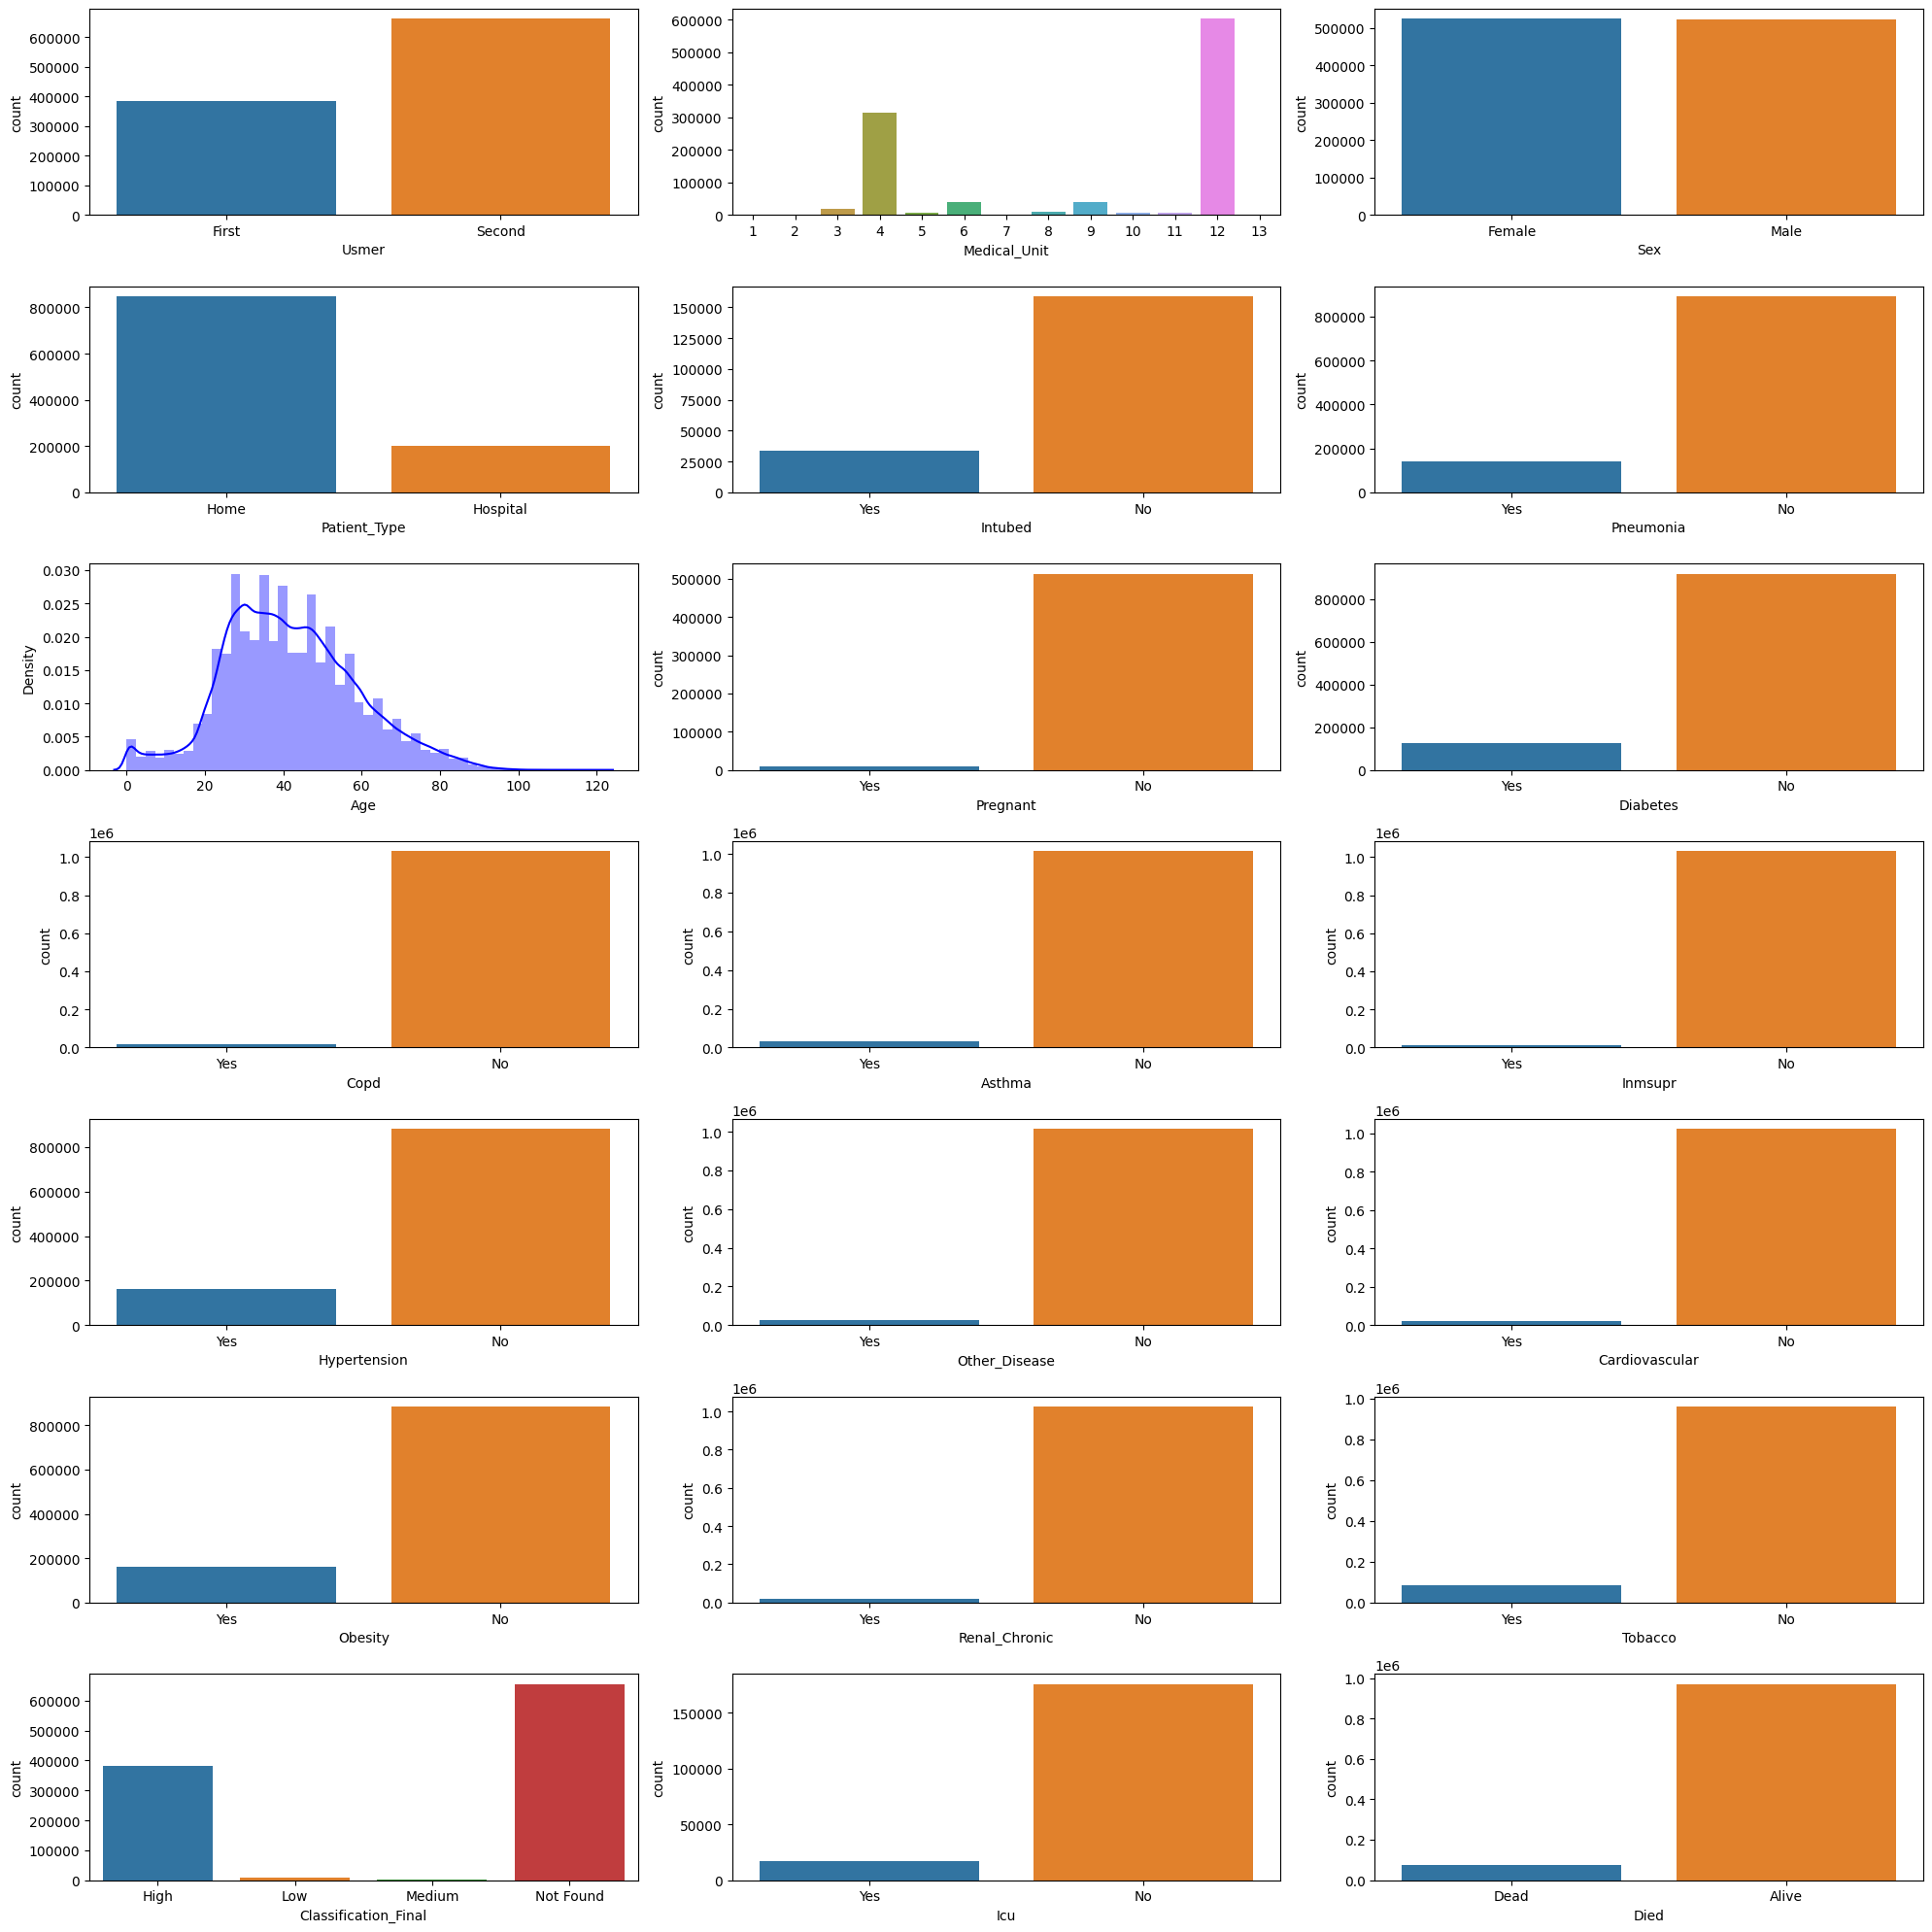

In [20]:
univariate()

### Insights:

1. 'Dead' data points are highly underbalanced as compared to 'Alive' data points. Would use SMOTE for balancing the data.
2. Maximum cases range from people aged 18-50. Could be because these people are generally out of house for different reasons like work, travel, more prone to catch Covid.
3. Pneumonia, Diabetes, Hypertension, Obesity are higher compared to other diseases. Should check Bivariate anaysis whether it has any relation to Covid severity. 

## Bivariate Analysis

In [21]:
def bivariate(df = data, y = target_var, cols = 4, rows = 5):
    temp = not_to_plot[:]
    temp.append(y)
    k = 0
    fig=plt.figure(figsize=(25,20))

    for i in df.columns:
        if i not in temp:
            if y in df.select_dtypes(['float', 'int']):
                if i in df.select_dtypes(['category', 'object']):
                    if (i not in temp): 
                        ax=fig.add_subplot(rows,cols,k+1)
                        sns.boxplot(x = i, y = y, data = df)

                if i in df.select_dtypes(['float', 'int']):                
                    if (i not in temp):      
                        ax=fig.add_subplot(rows,cols,k+1)       
                        sns.scatterplot(x = y, y = i, data = df)                  
                k += 1
            elif y in df.select_dtypes(['category', 'object']):
                if i in df.select_dtypes(['category', 'object']):
                    if (i not in temp):
                        ax=fig.add_subplot(rows,cols,k+1)
                        sns.countplot(x = i, hue = y, data = df)
                        plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

                if i in df.select_dtypes(['float', 'int']):
                    if (i not in temp):
                        ax=fig.add_subplot(rows,cols,k+1)
                        sns.boxplot(x = y, y = i, data = df)
                k += 1
    fig.tight_layout() 
    plt.show()

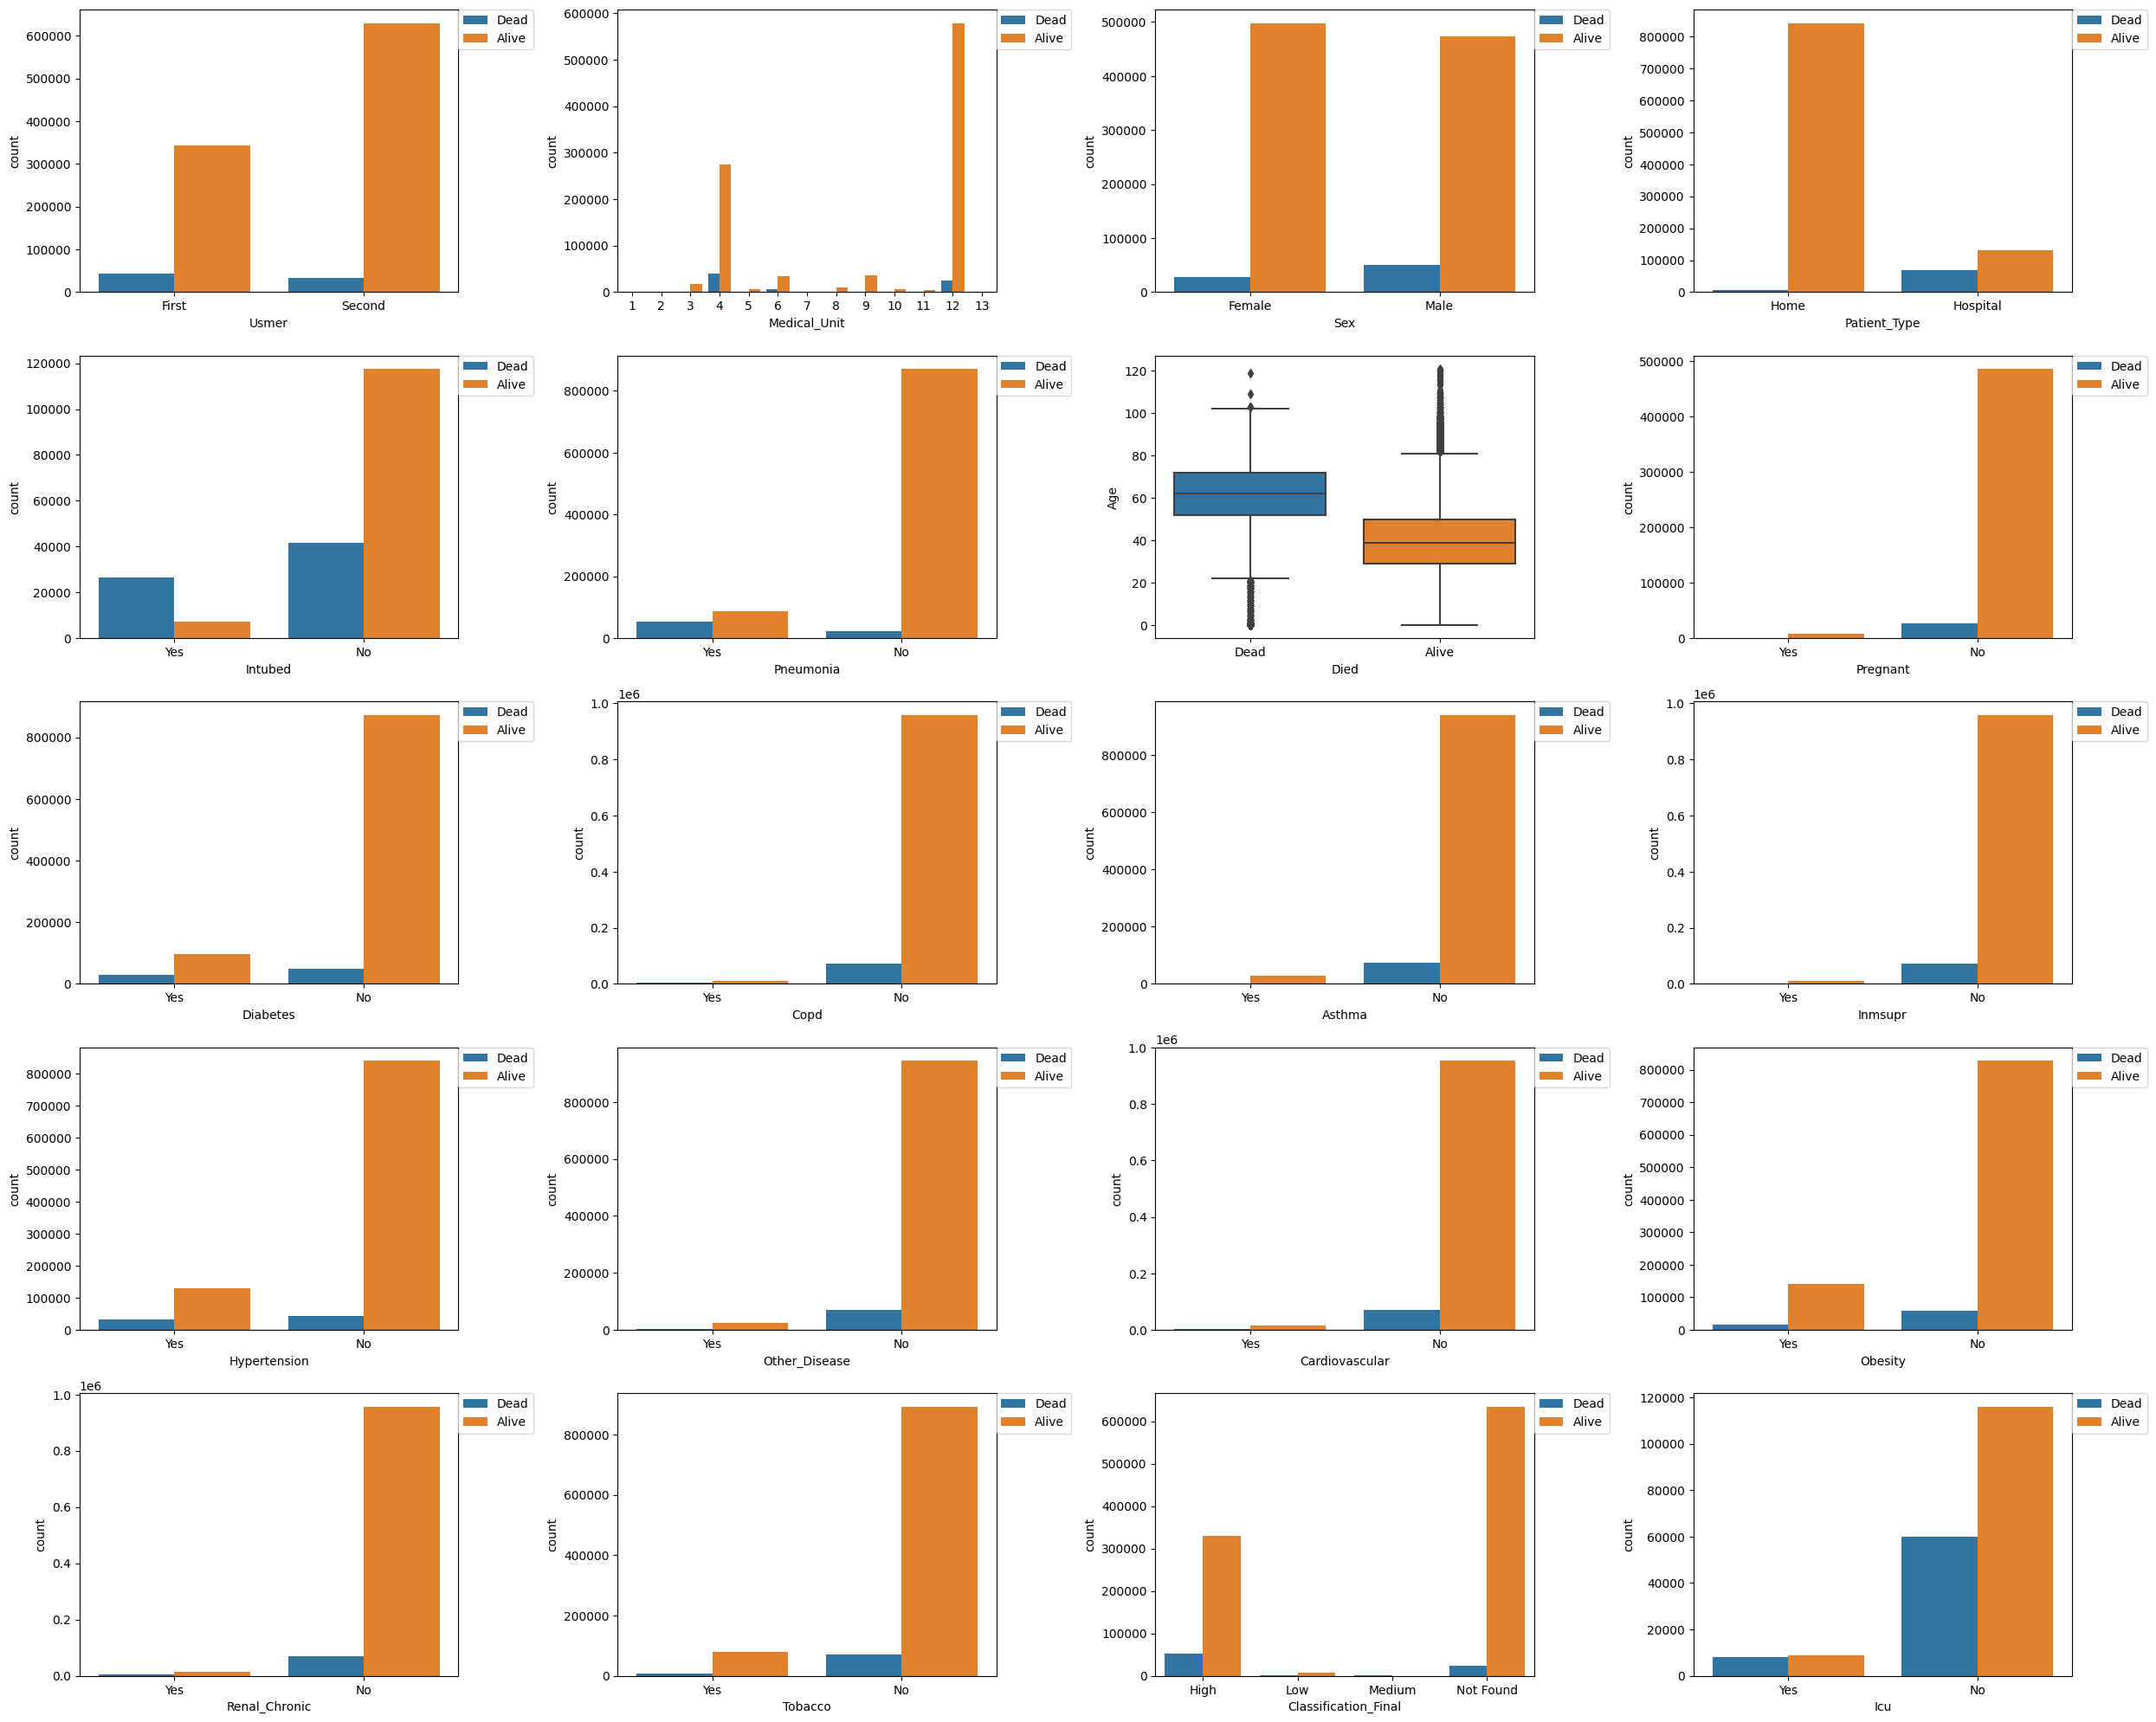

In [22]:
bivariate() # Taking 'Died' as target variable

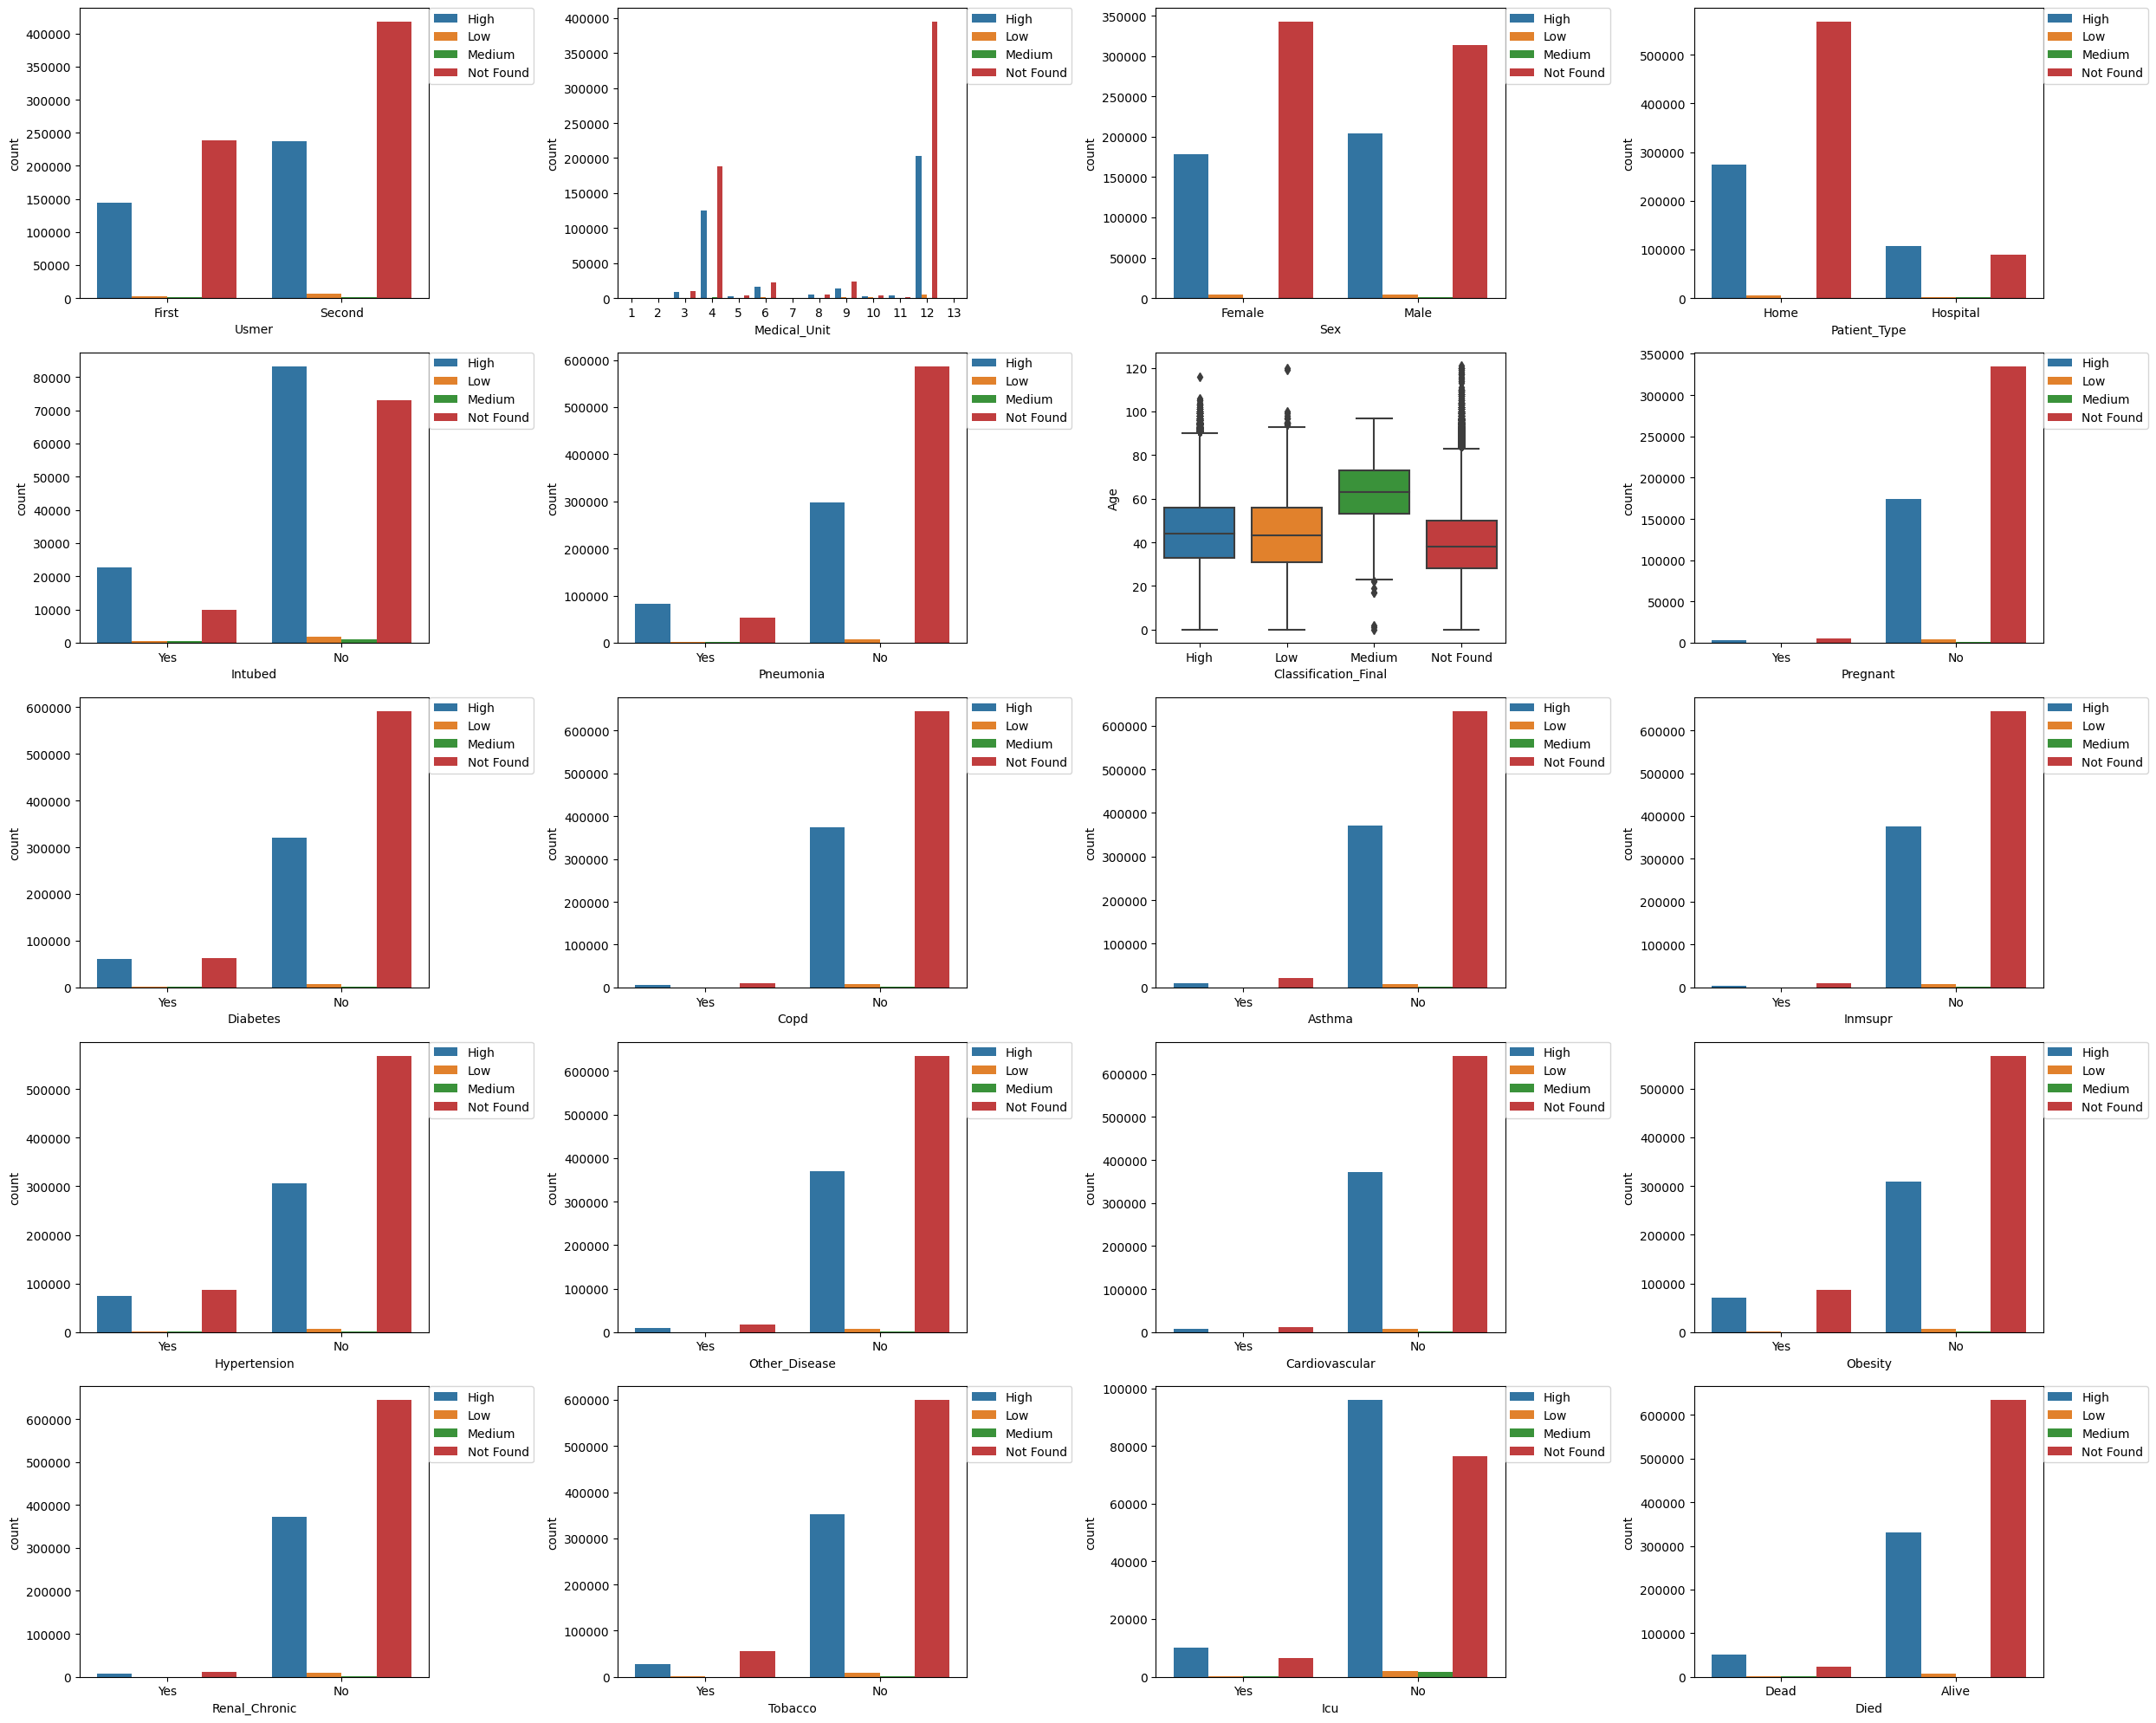

In [23]:
bivariate(y = 'Classification_Final')   # Taking Classification as target Vairable

<AxesSubplot: xlabel='Classification_Final', ylabel='count'>

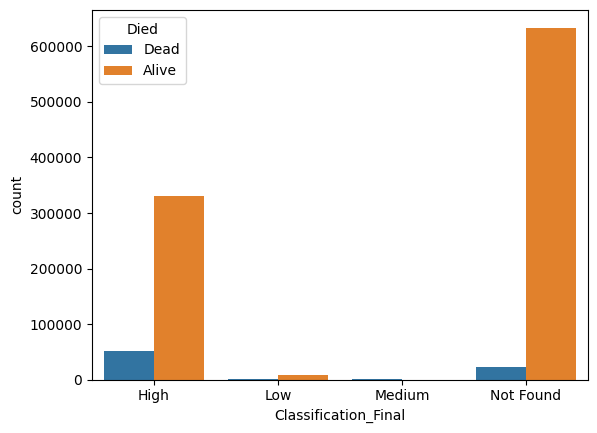

In [24]:
# Classification vs Died

sns.countplot(x = 'Classification_Final', hue = 'Died', data = data)

# Data is highly imbalanced that's we don't see a clear pattern, 
# my assumpton was that there would be a clear pattern between Death and High Severity.

### Insights

1. We can see a direct correlation b/w 'Age' and 'Died'. Maximum people who died are centered around 60, with a few young outliers. 

## Missing Values

In [25]:
data.isnull().sum() [ data.isnull().sum() > 0]

Intubed           855869
Pneumonia          16003
Pregnant          527265
Diabetes            3338
Copd                3003
Asthma              2979
Inmsupr             3404
Hypertension        3104
Other_Disease       5045
Cardiovascular      3076
Obesity             3032
Renal_Chronic       3006
Tobacco             3220
Icu               856032
dtype: int64

### Column: Pregnant

In [26]:
data.loc[(data['Sex'] == 'Male') & (data['Pregnant'].isnull()), 'Pregnant'] = 'No'

# Male cannot be pregnant so assigning all Males as 'No' in Pregnant

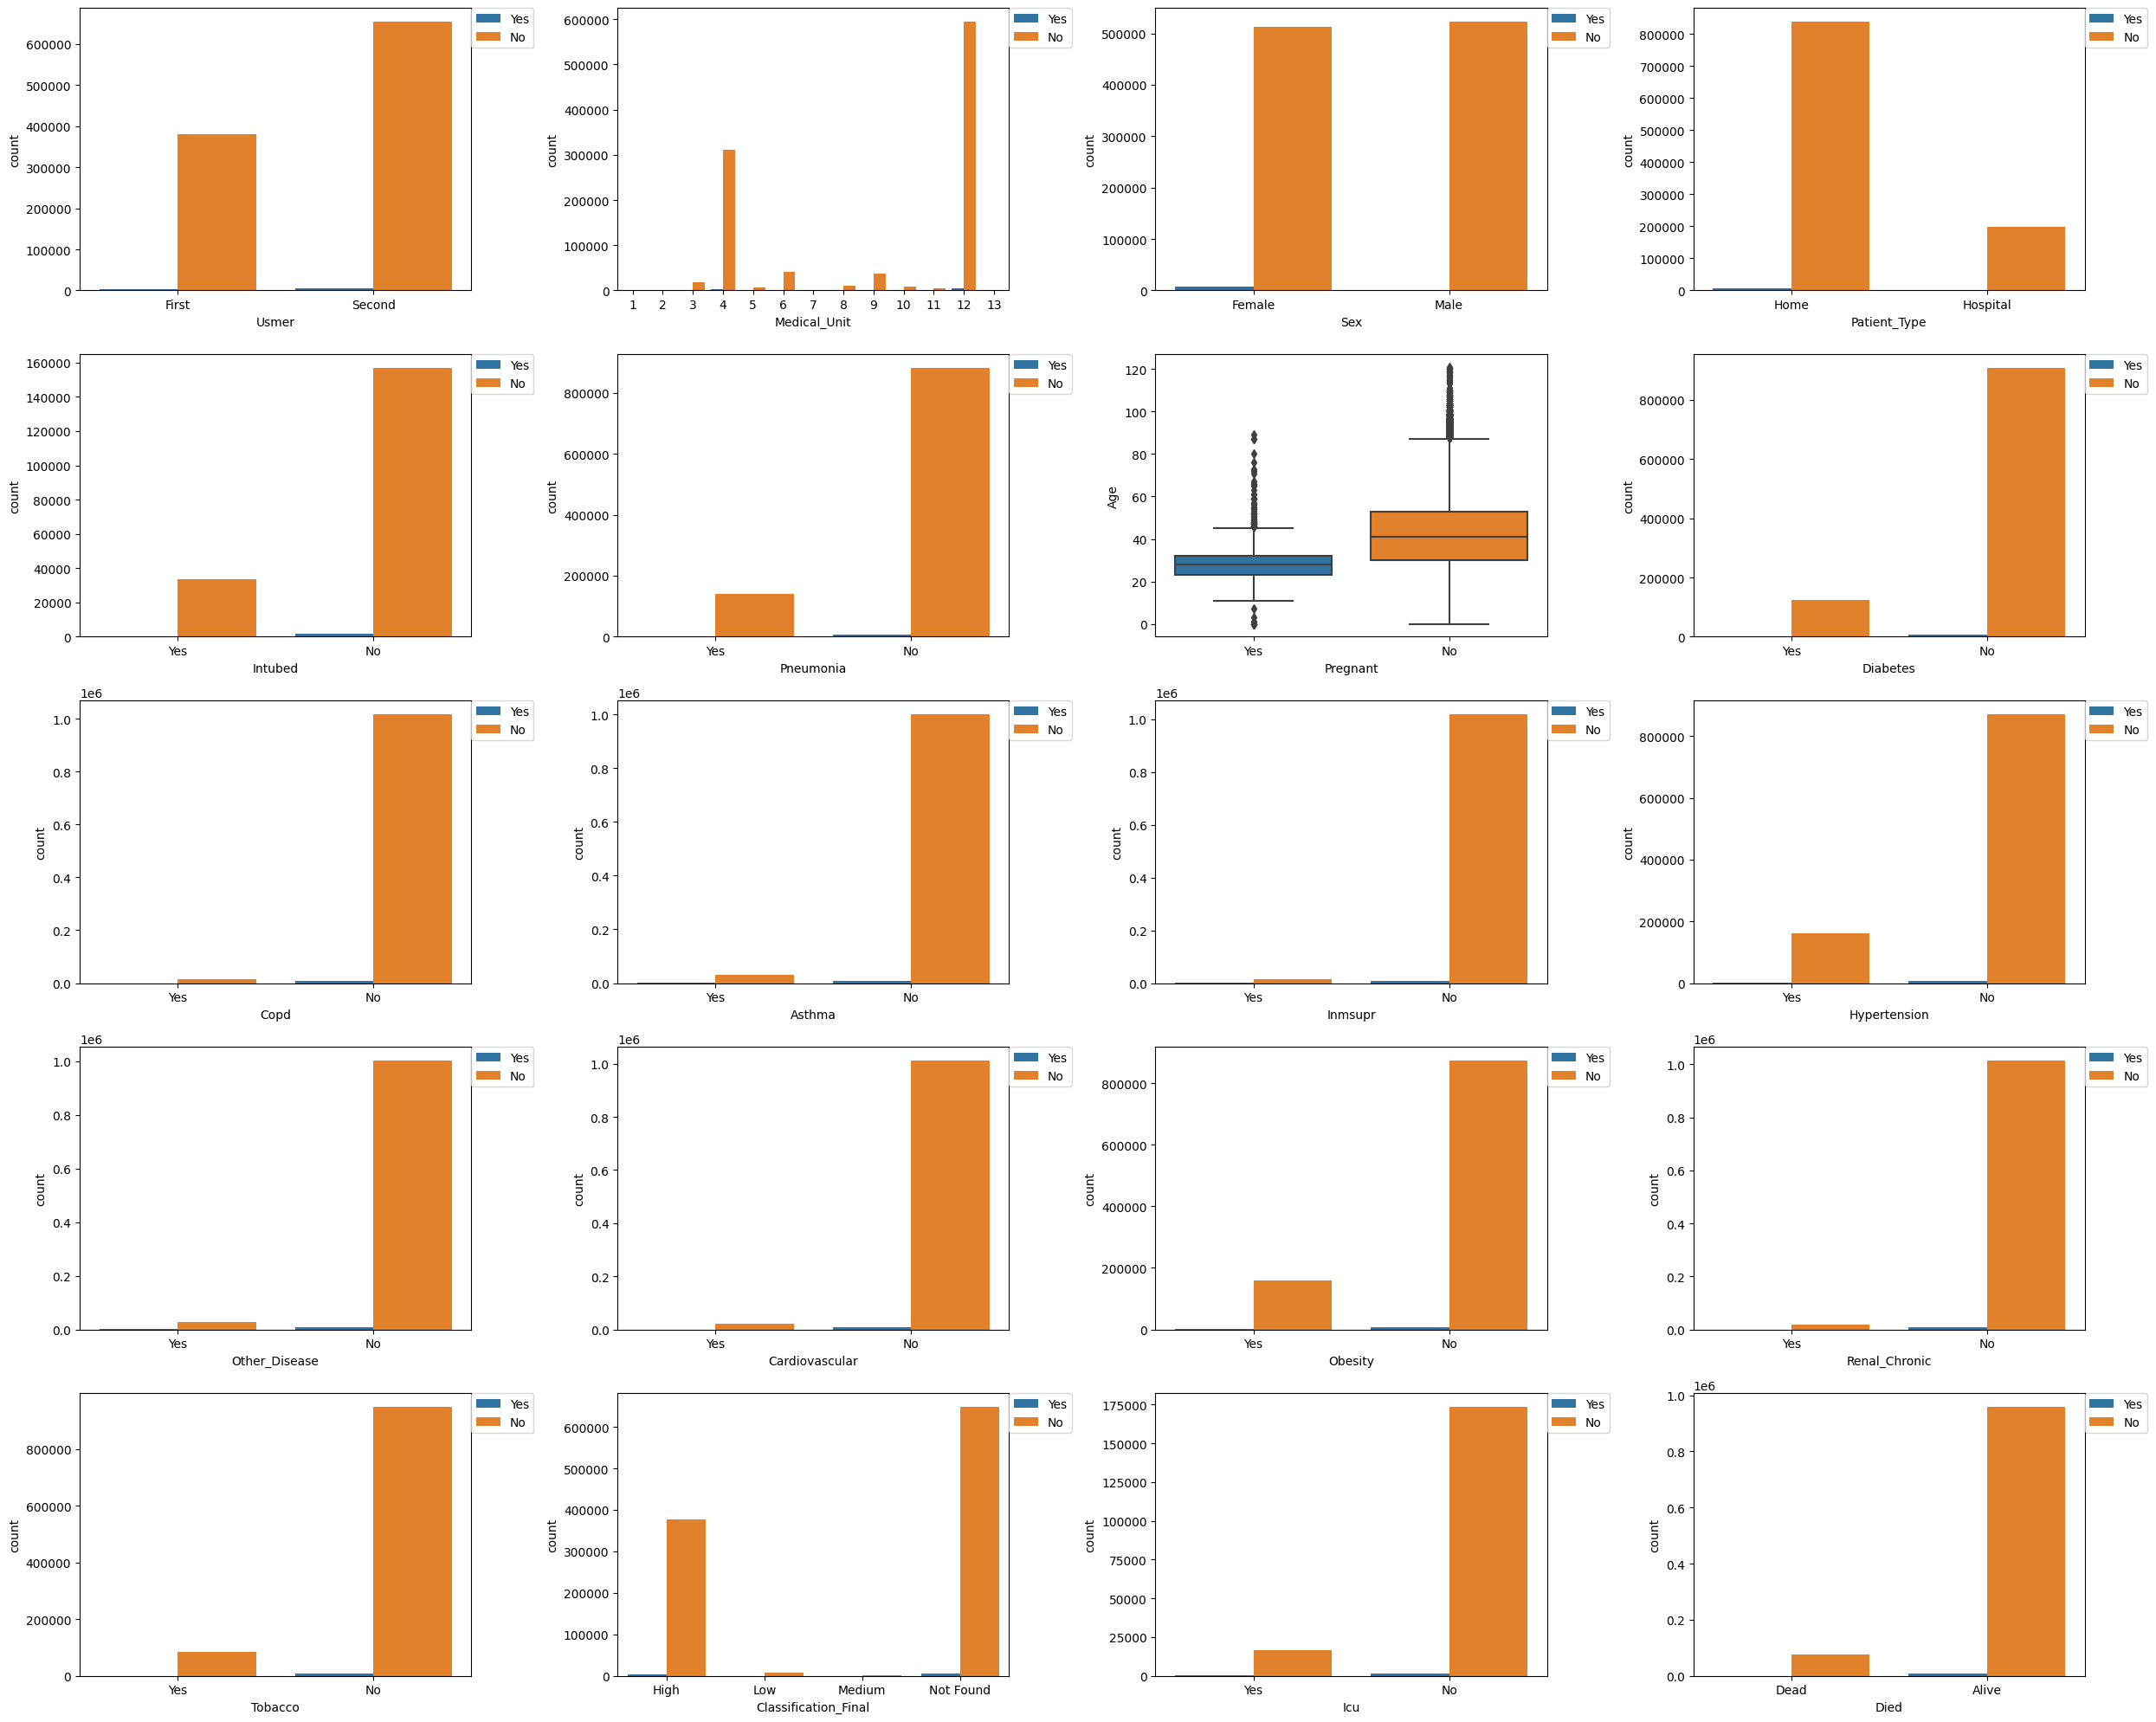

In [27]:
bivariate(y = 'Pregnant')

In [28]:
data.loc[(data['Age'] > 18) & (data['Age'] <= 35) & (data['Pregnant'].isnull()), 'Pregnant'] = 'Yes'    # 18 - 40 may be pregnant.
data.loc[(data['Age'] <= 18) | (data['Age'] > 35) & (data['Pregnant'].isnull()), 'Pregnant'] = 'No'     # 0-18 and 40-100 are less likely to be pregnant.

In [29]:
data.isnull().sum() [ data.isnull().sum() > 0]

Intubed           855869
Pneumonia          16003
Diabetes            3338
Copd                3003
Asthma              2979
Inmsupr             3404
Hypertension        3104
Other_Disease       5045
Cardiovascular      3076
Obesity             3032
Renal_Chronic       3006
Tobacco             3220
Icu               856032
dtype: int64

### Column: Diabetes

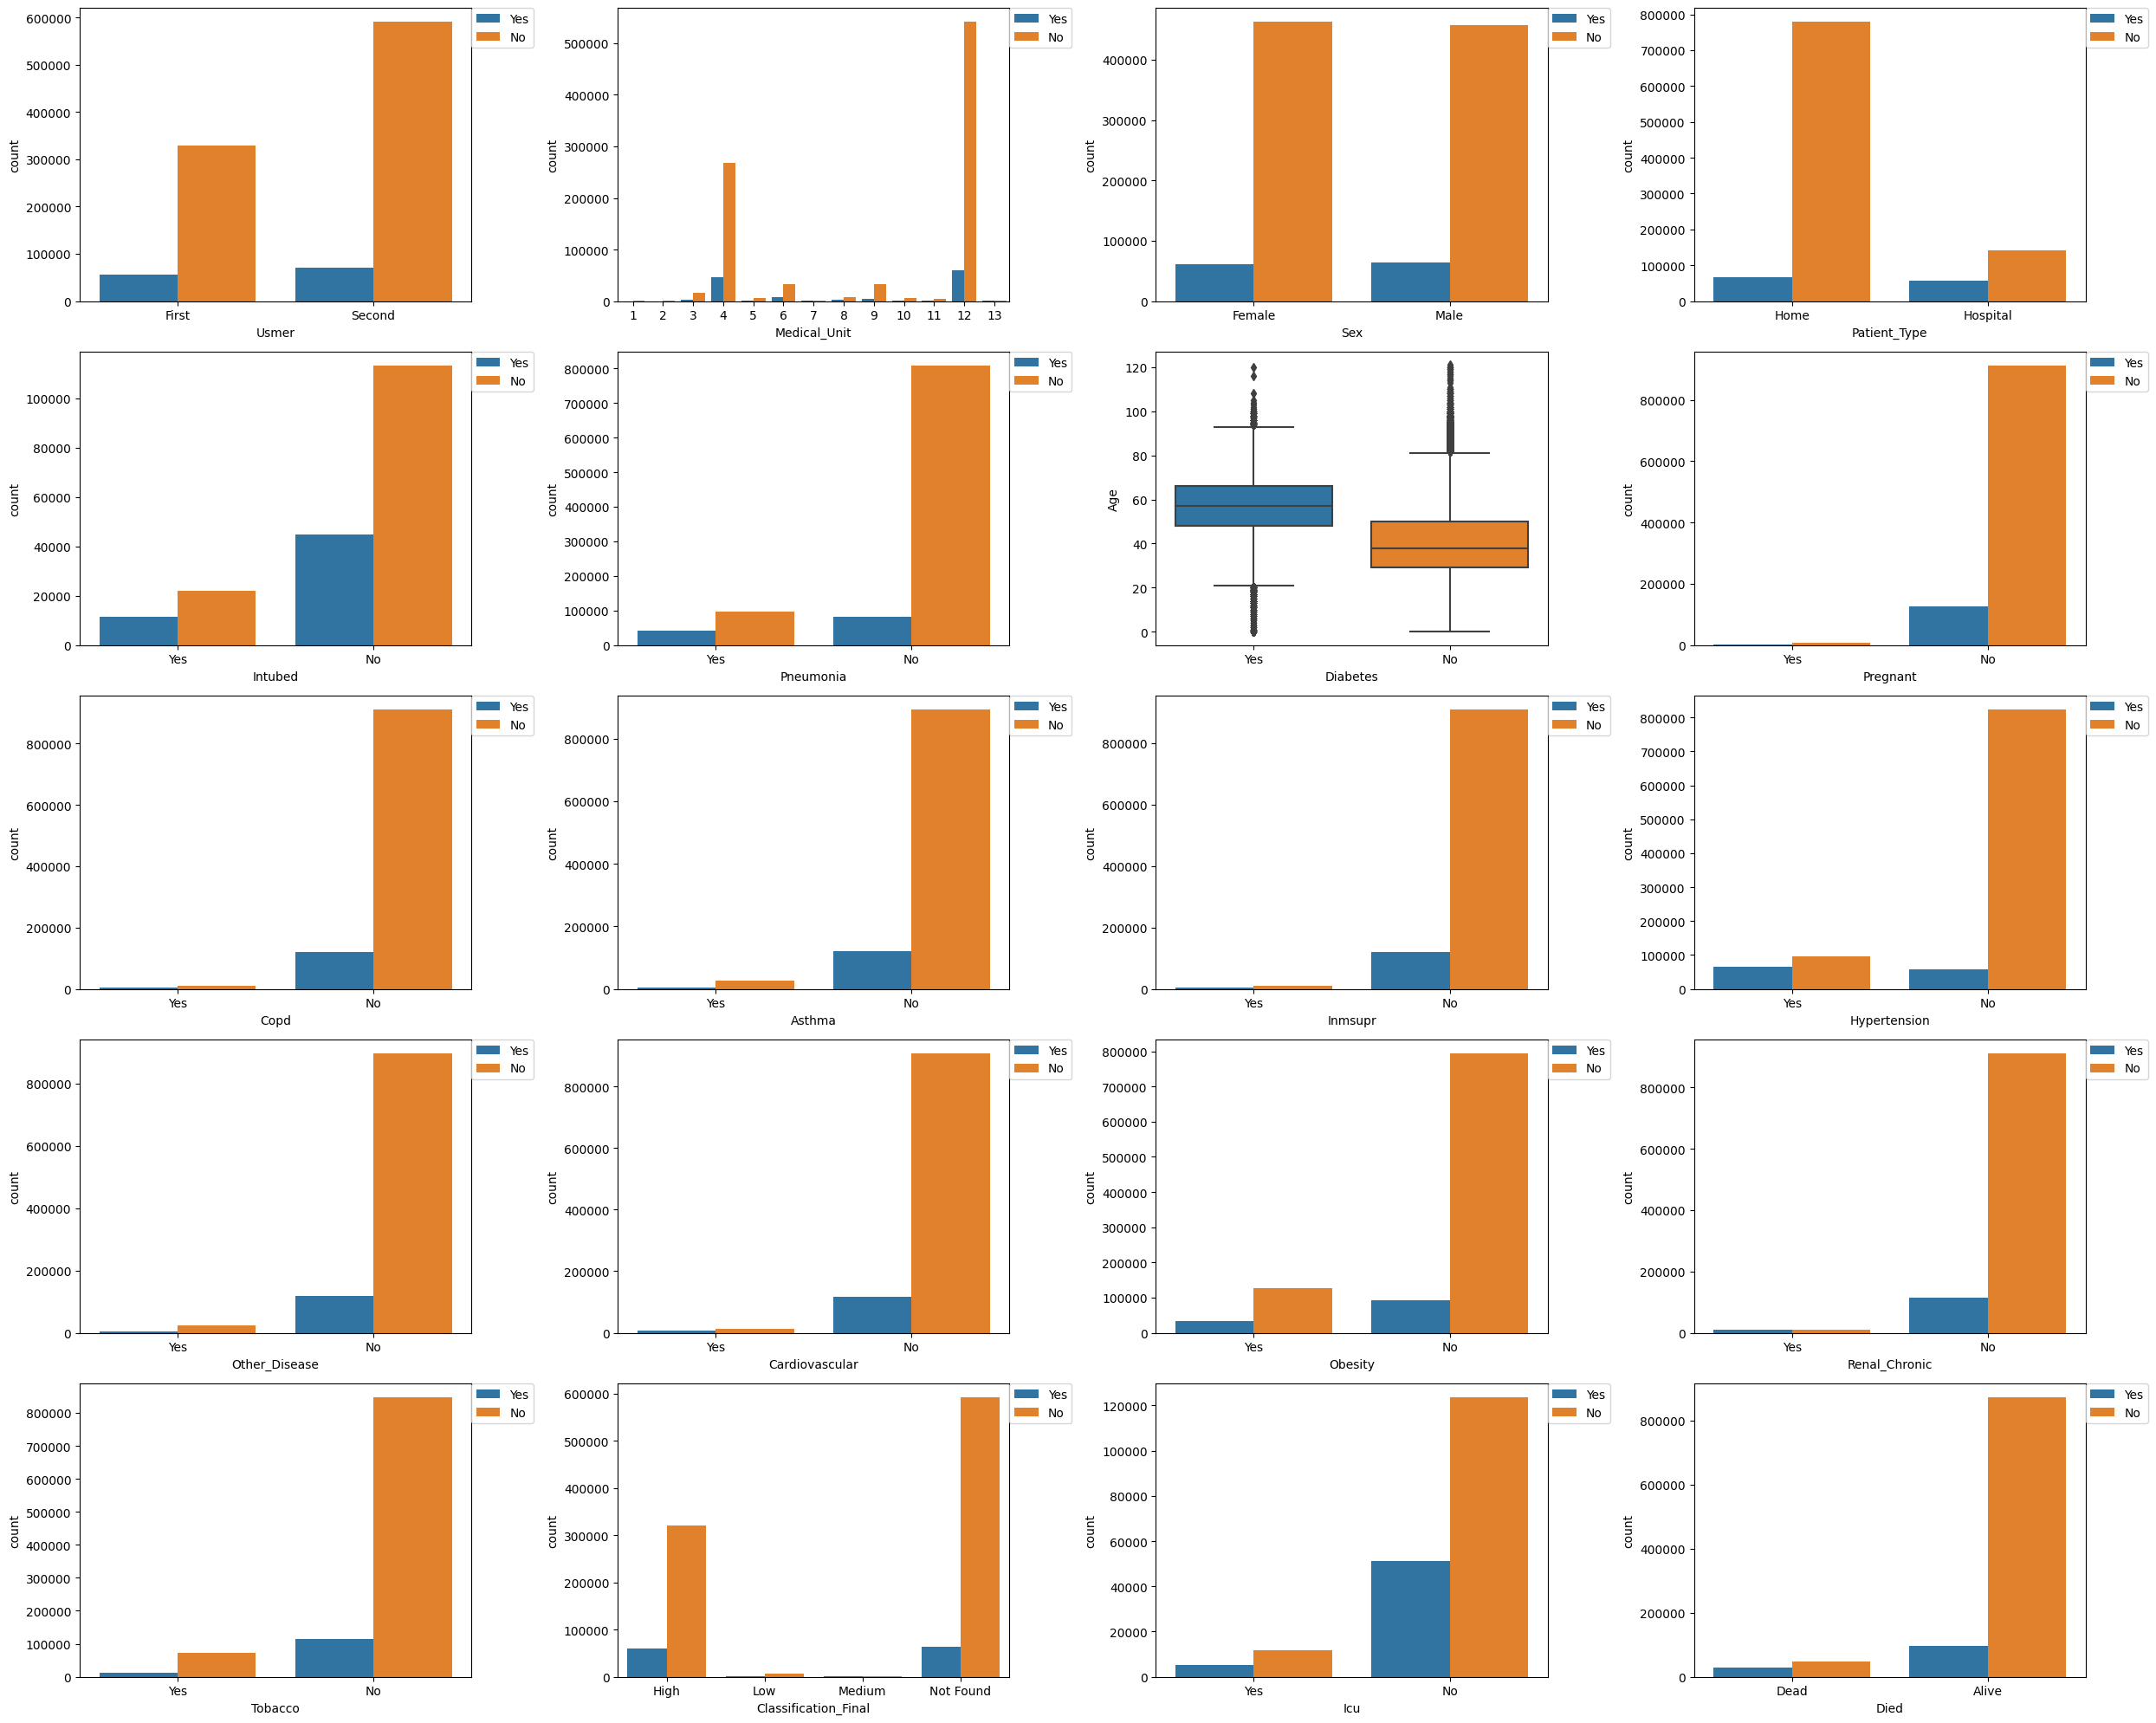

In [30]:
bivariate(y = 'Diabetes')

In [31]:
data.loc[(data['Age'] > 50) & (data['Diabetes'].isnull()), 'Diabetes'] = 'Yes'
data.loc[(data['Age'] <= 50) & (data['Diabetes'].isnull()), 'Diabetes'] = 'No'   

In [32]:
data.isnull().sum() [ data.isnull().sum() > 0]

Intubed           855869
Pneumonia          16003
Copd                3003
Asthma              2979
Inmsupr             3404
Hypertension        3104
Other_Disease       5045
Cardiovascular      3076
Obesity             3032
Renal_Chronic       3006
Tobacco             3220
Icu               856032
dtype: int64

### Column: COPD

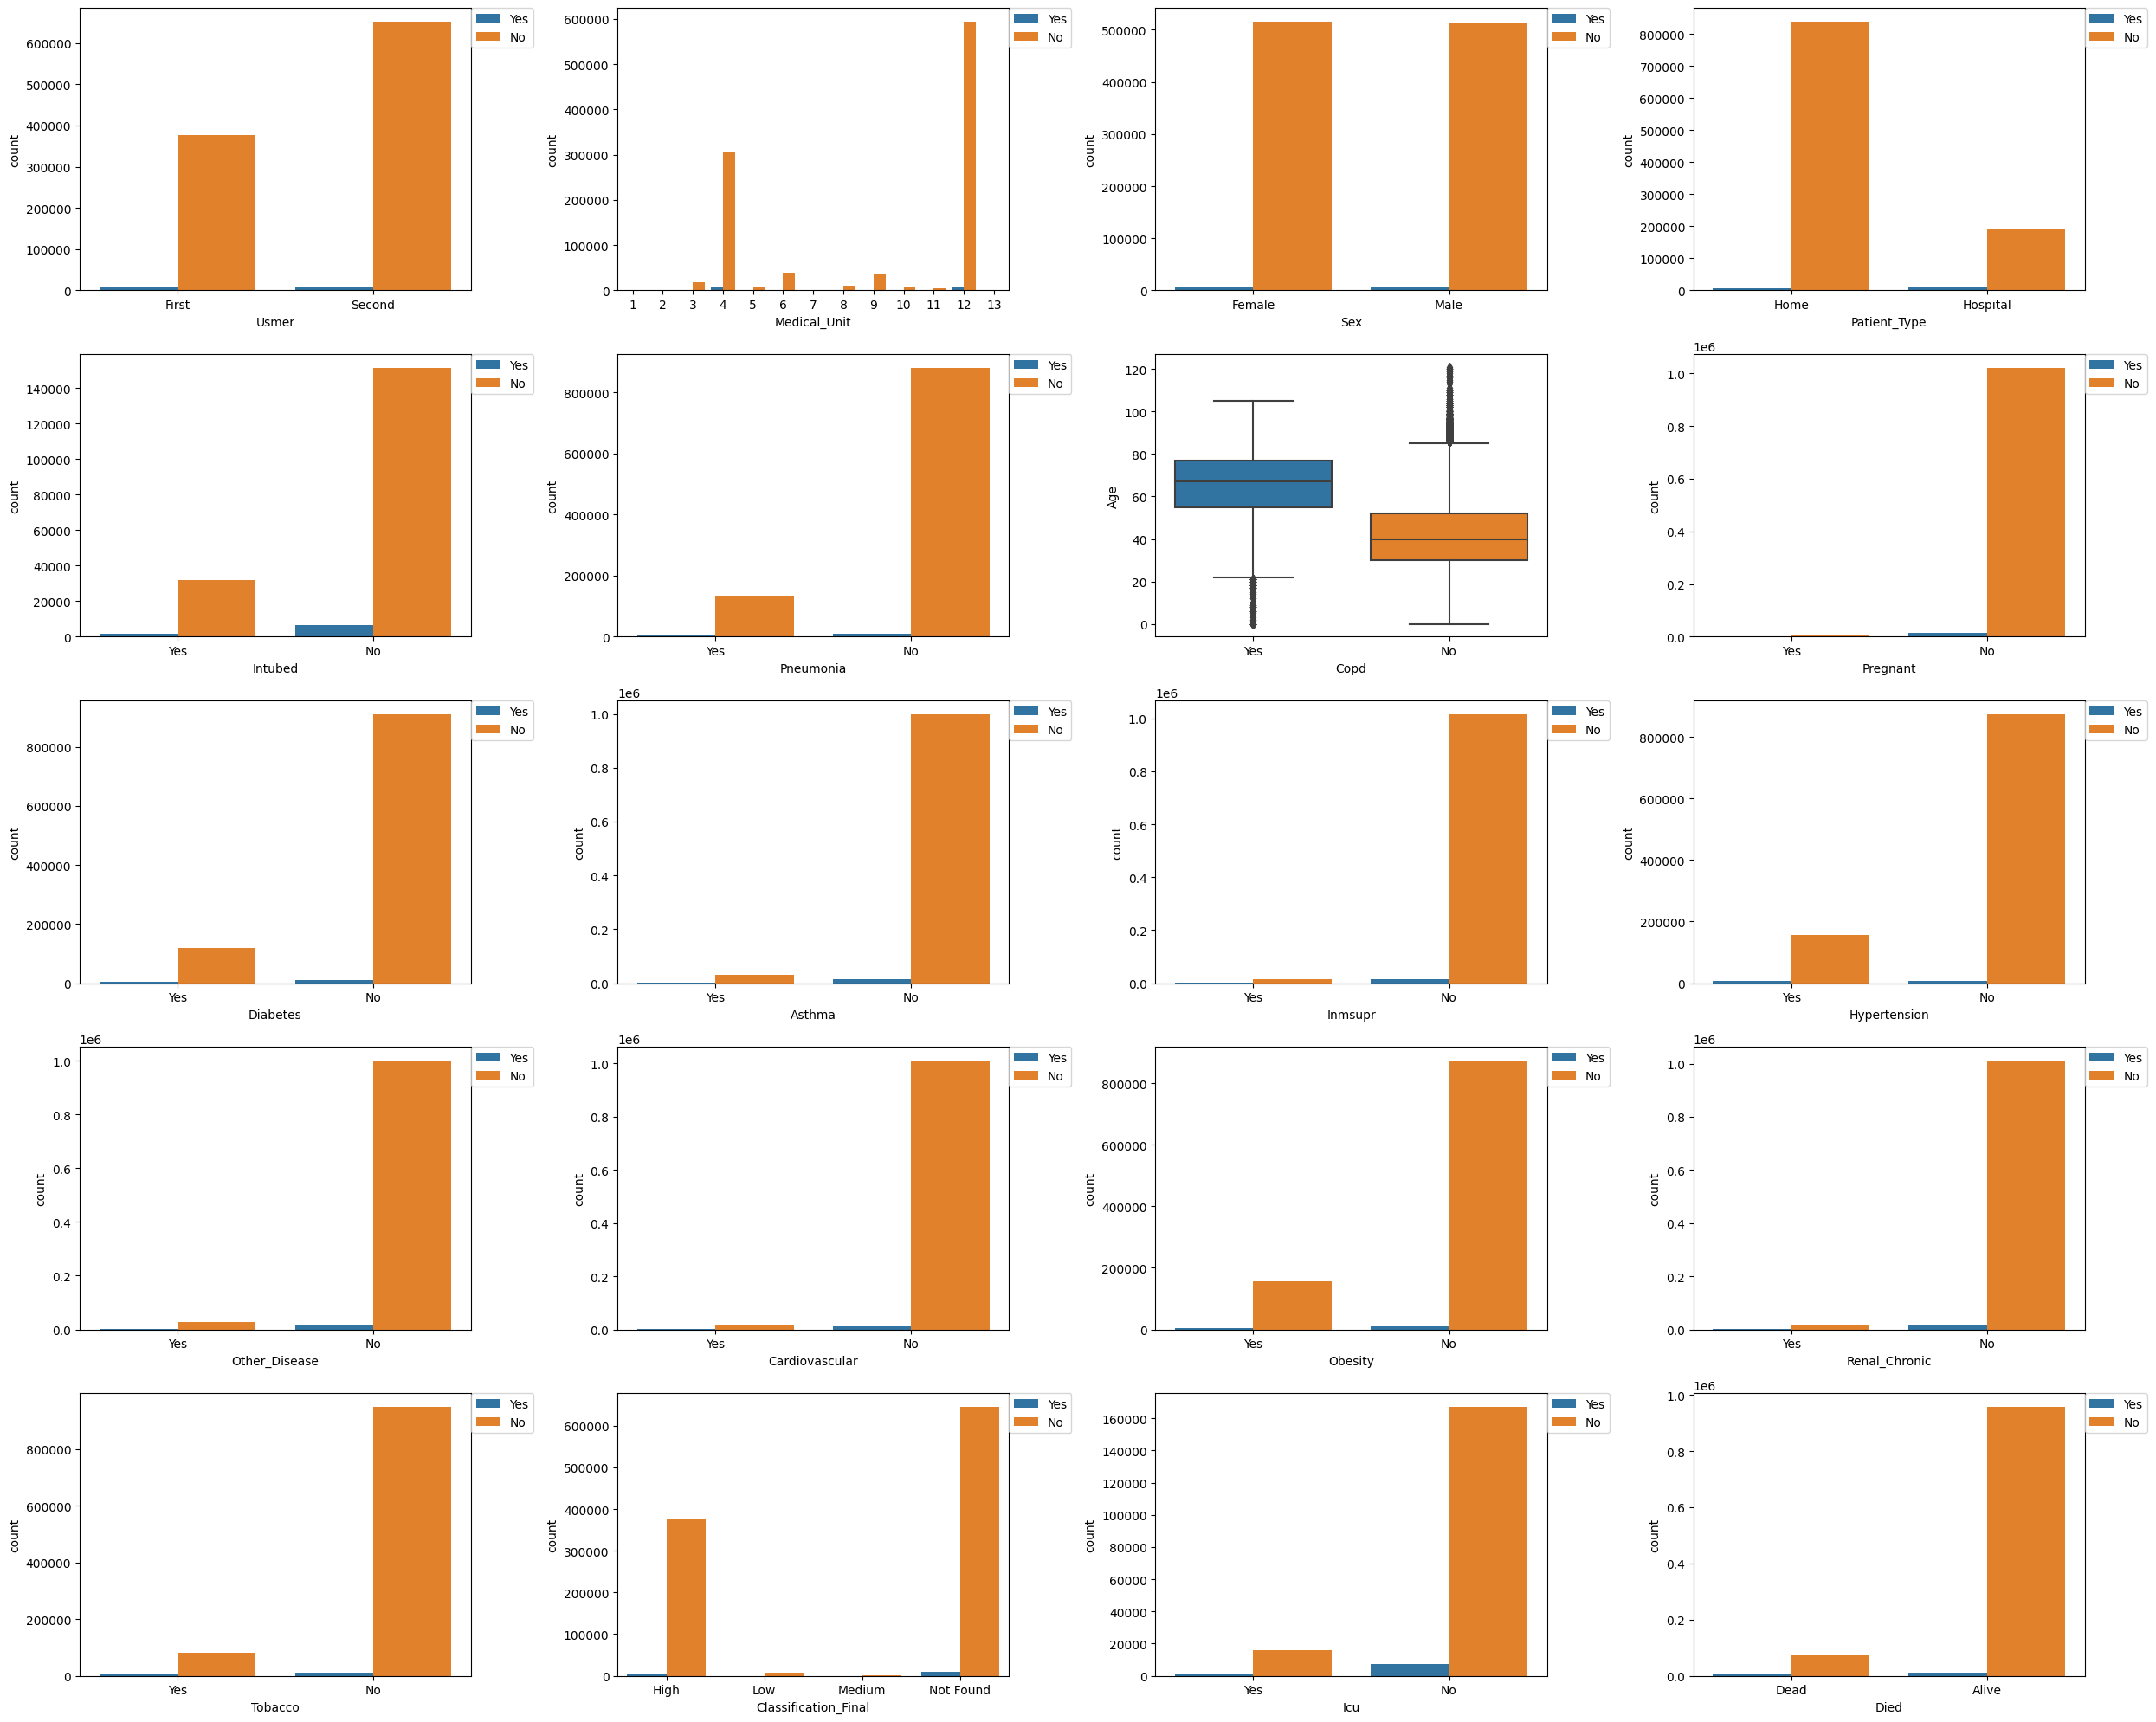

In [33]:
bivariate(y = 'Copd')

In [34]:
data.loc[(data['Age'] > 50) & (data['Copd'].isnull()), 'Copd'] = 'Yes'
data.loc[(data['Age'] <= 50) & (data['Copd'].isnull()), 'Copd'] = 'No'   

In [35]:
data.isnull().sum() [ data.isnull().sum() > 0]

Intubed           855869
Pneumonia          16003
Asthma              2979
Inmsupr             3404
Hypertension        3104
Other_Disease       5045
Cardiovascular      3076
Obesity             3032
Renal_Chronic       3006
Tobacco             3220
Icu               856032
dtype: int64

### Column: Asthma

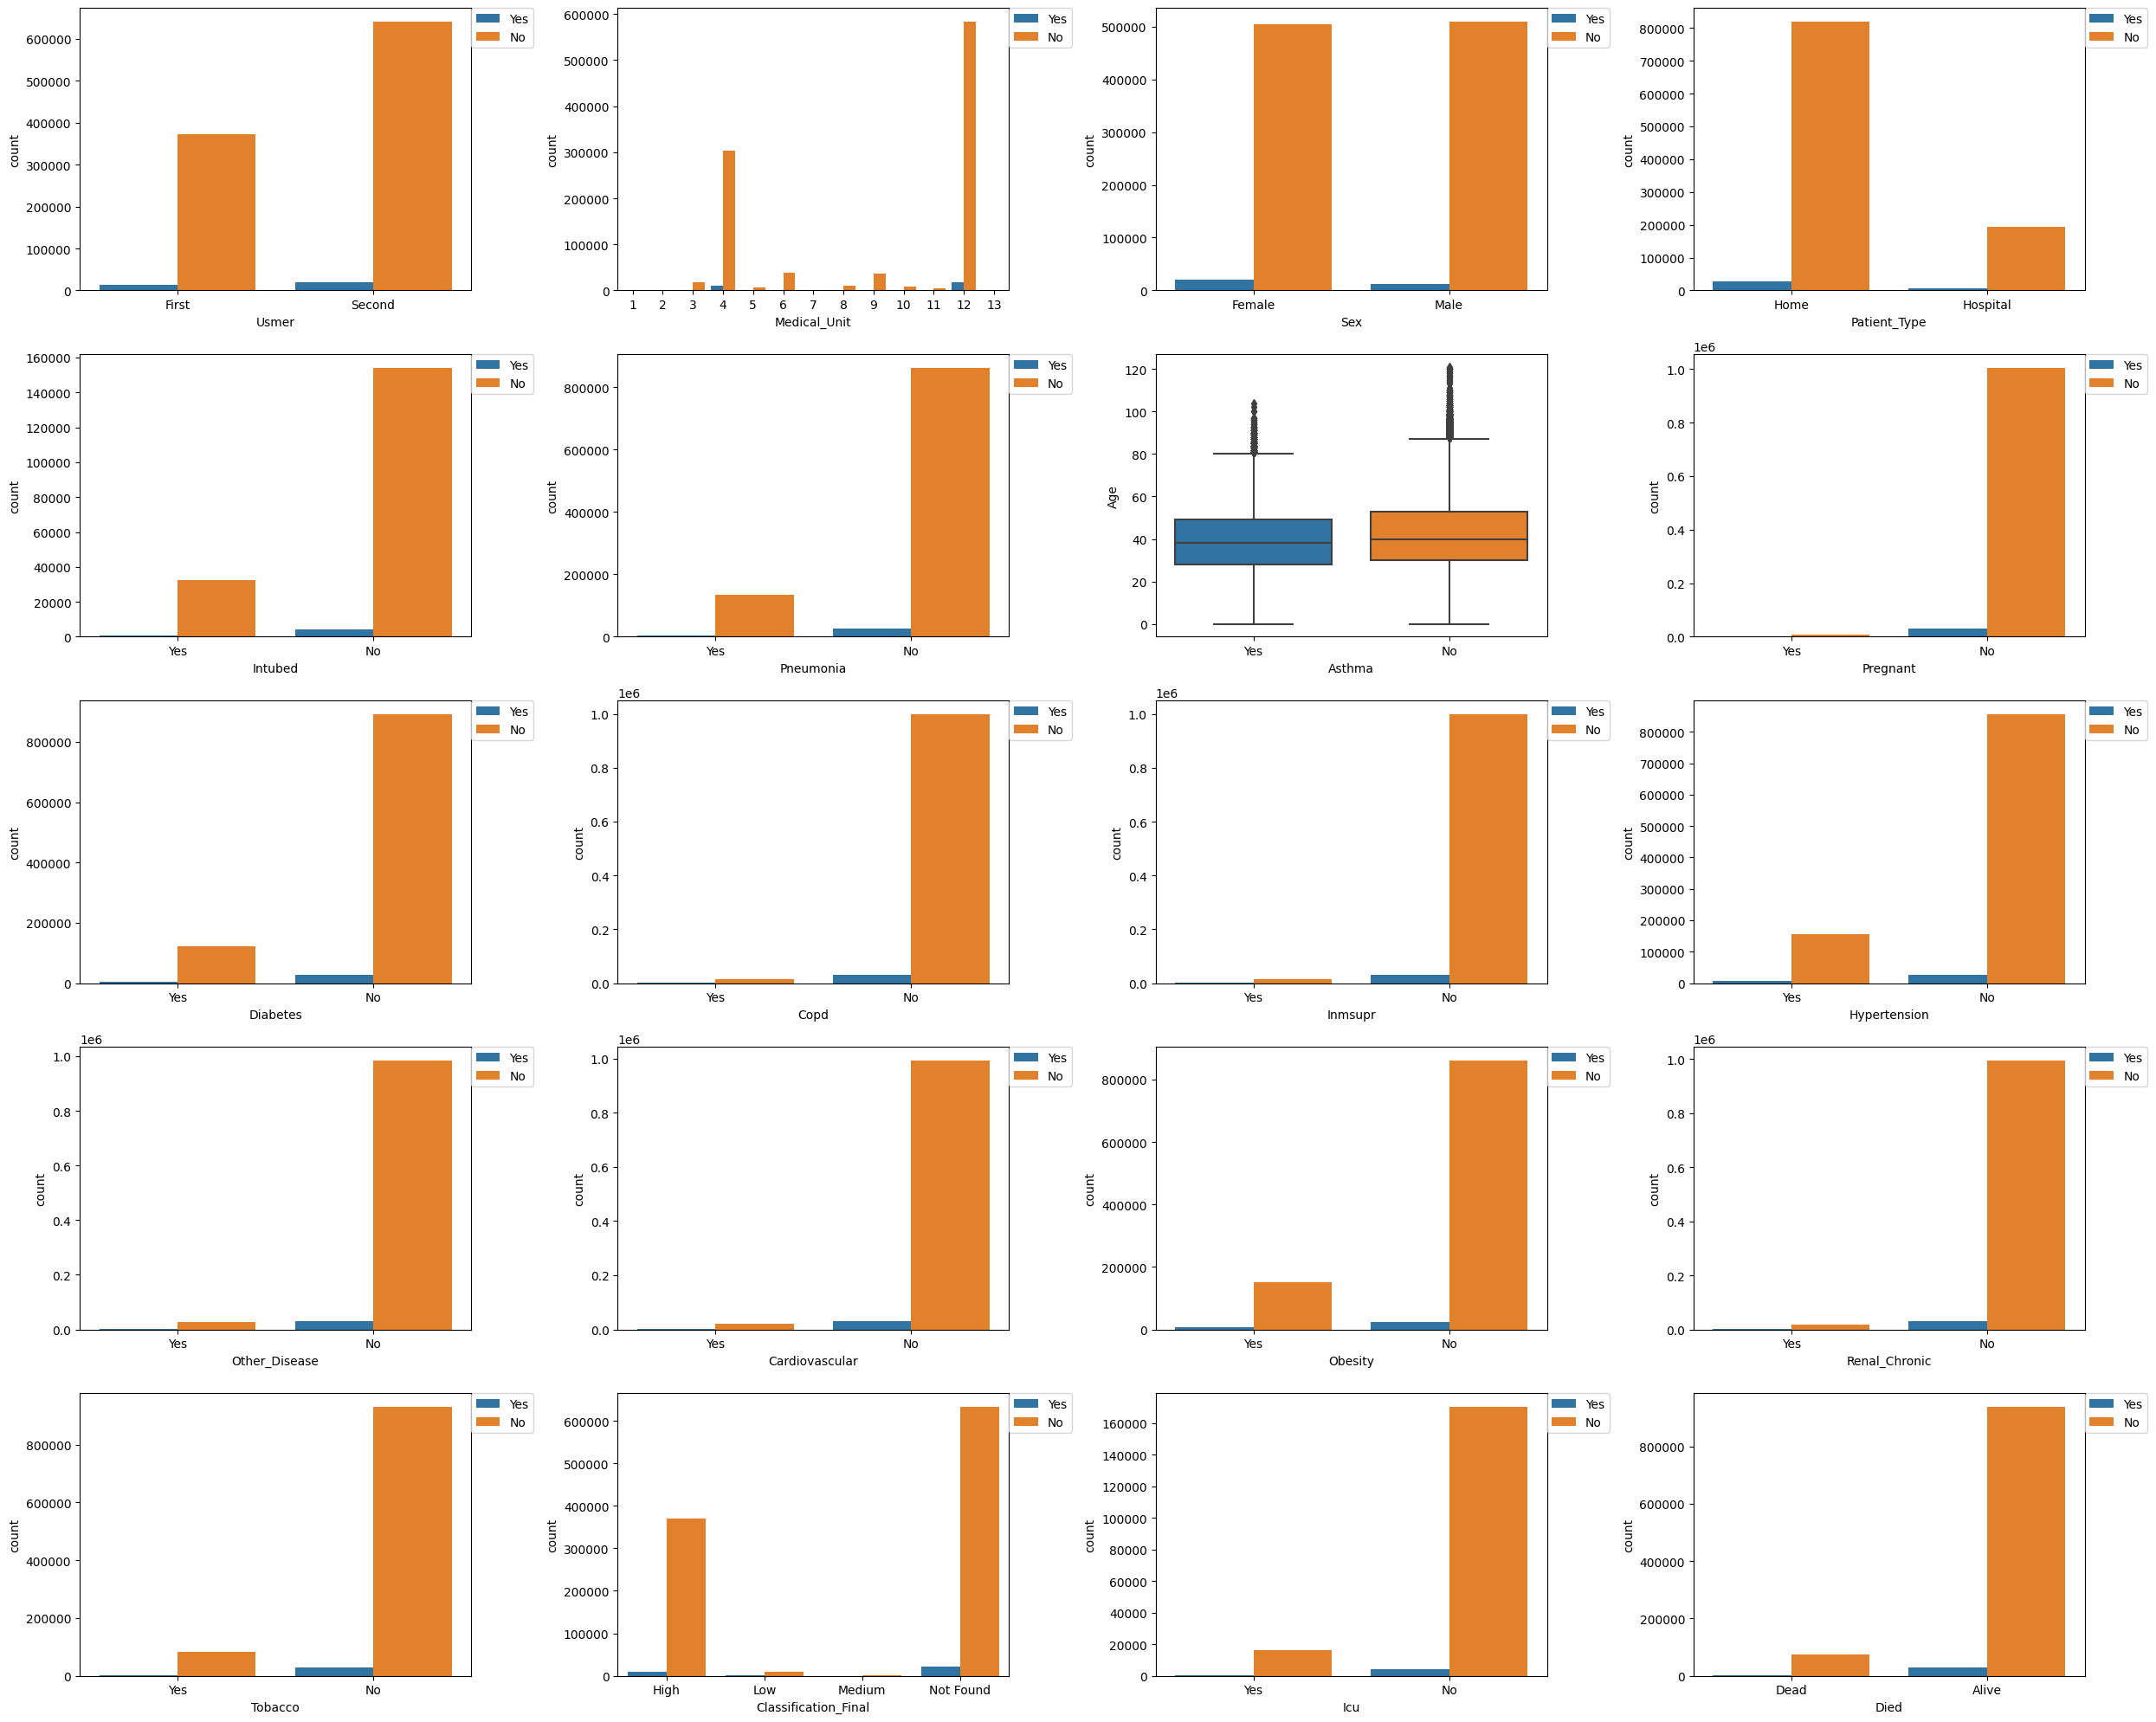

In [36]:
bivariate(y = 'Asthma')

In [37]:
def add_rand_choice(col):
    ch = ['Yes', 'No']
    
    for i in data[data[col].isnull()].index:
        data.loc[i, col] = np.random.choice(ch)

In [38]:
# Adding random values since no pattern is found yet.

add_rand_choice('Asthma')

In [39]:
data.isnull().sum() [ data.isnull().sum() > 0]

Intubed           855869
Pneumonia          16003
Inmsupr             3404
Hypertension        3104
Other_Disease       5045
Cardiovascular      3076
Obesity             3032
Renal_Chronic       3006
Tobacco             3220
Icu               856032
dtype: int64

### Column: Inmsupr

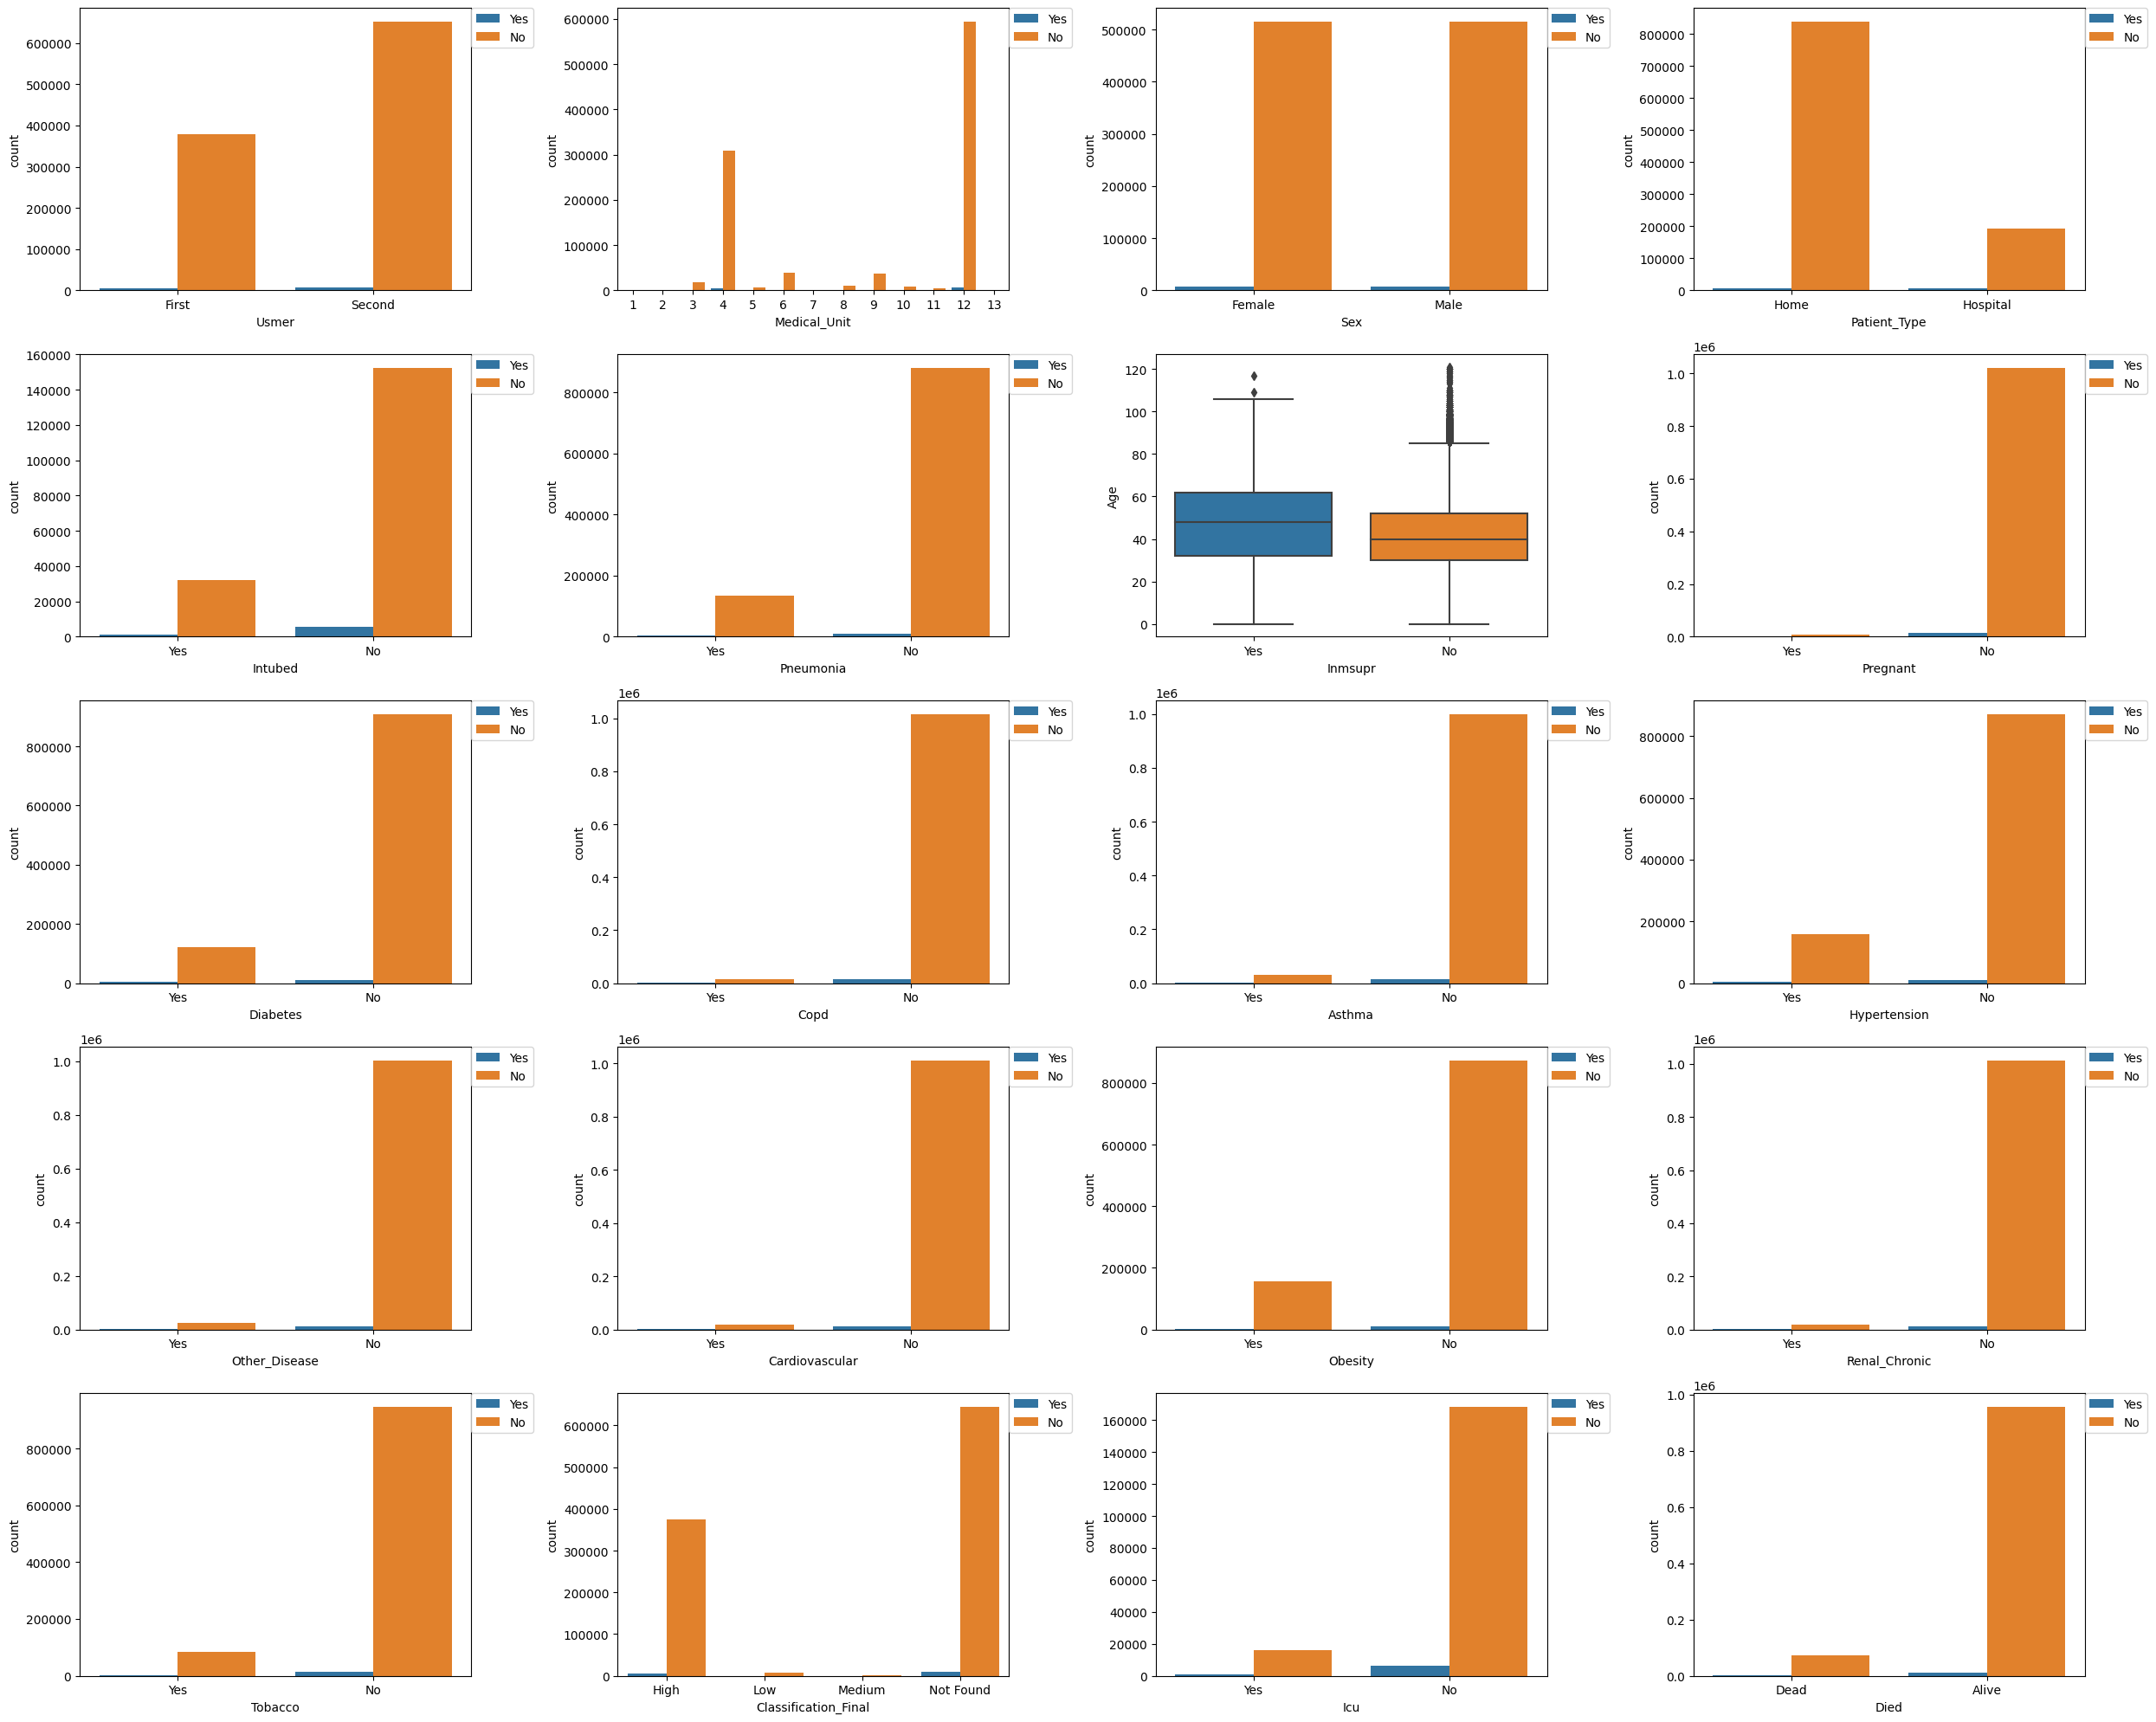

In [40]:
bivariate(y = 'Inmsupr')

In [41]:
# Medical Unit gives a slight pattern with Inmsupr: 
# Only Units 4, 12 detect patients as immunosuppressed, others don't

data.loc[(data['Inmsupr'].isnull()) & (data['Medical_Unit'] == 4) | (data['Medical_Unit'] == 12), 'Inmsupr'] = 'Yes'
data.loc[data['Inmsupr'].isnull(), 'Inmsupr'] = 'No'

In [42]:
data.isnull().sum() [ data.isnull().sum() > 0]

Intubed           855869
Pneumonia          16003
Hypertension        3104
Other_Disease       5045
Cardiovascular      3076
Obesity             3032
Renal_Chronic       3006
Tobacco             3220
Icu               856032
dtype: int64

### Column: Pneumonia

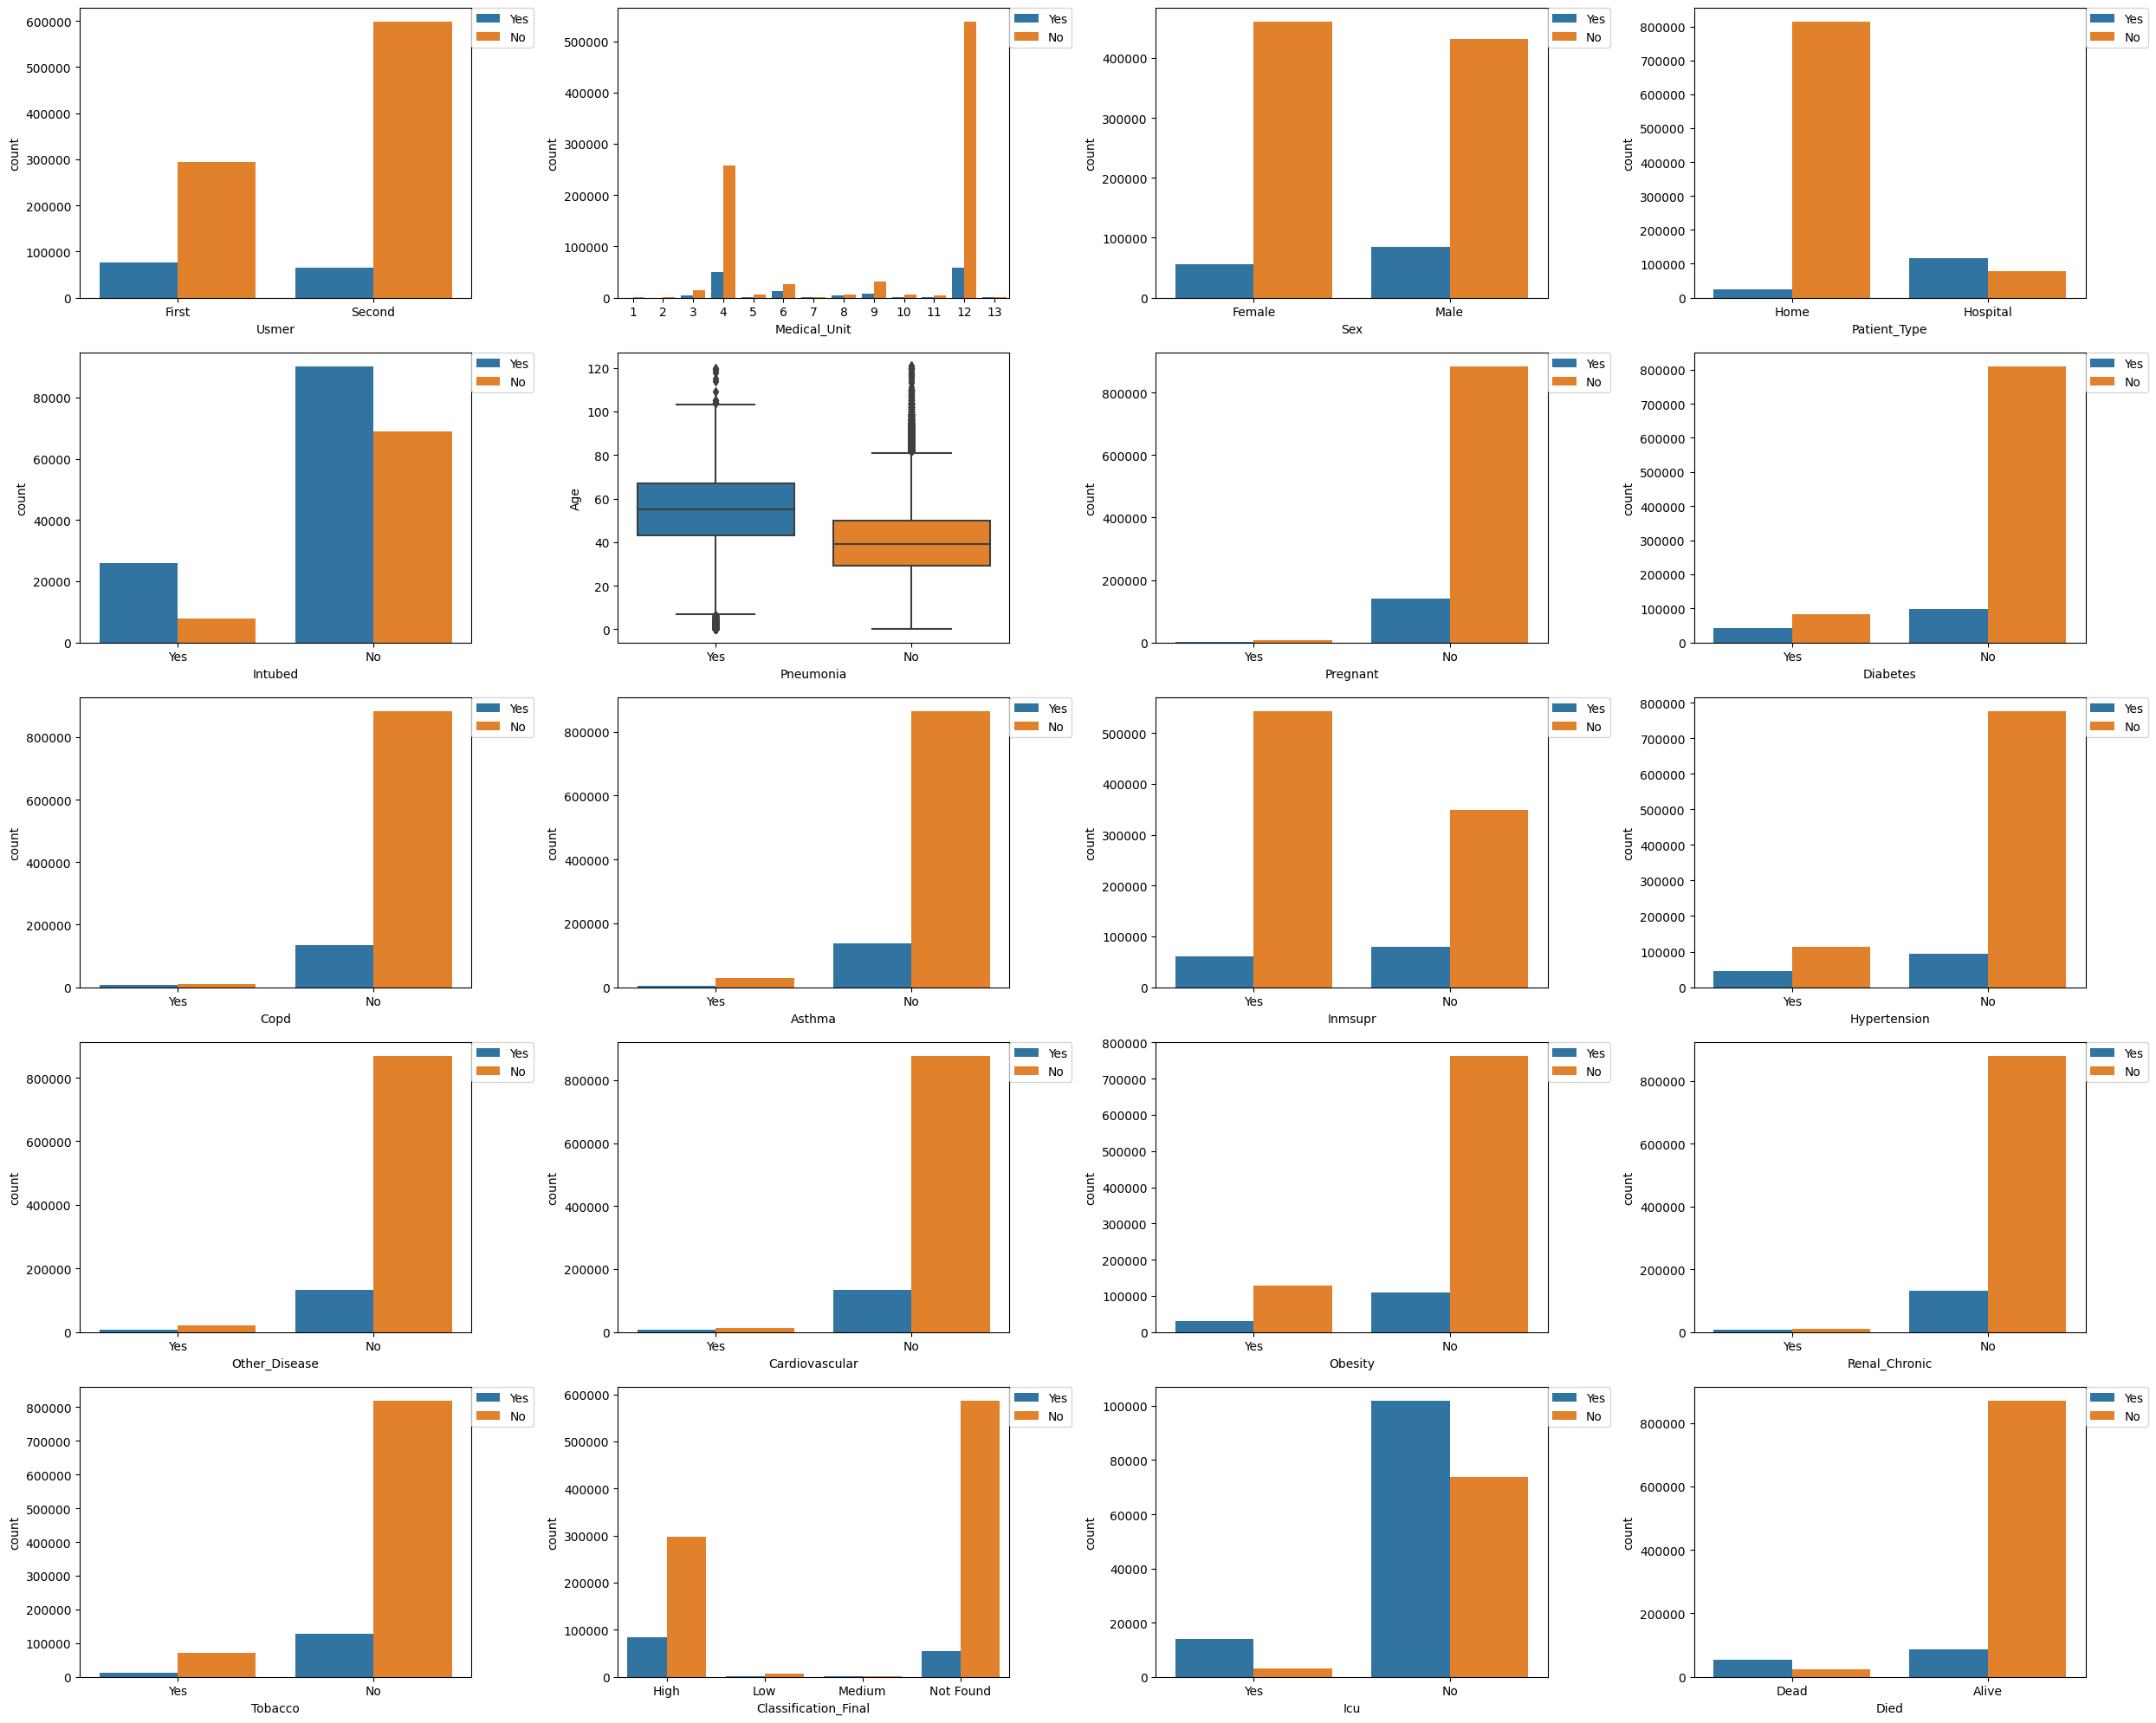

In [43]:
bivariate(y = 'Pneumonia')

In [44]:
# Age vs Pneumonia has a slight pattern, using that for now.

data.loc[(data['Age'] > 45) & (data['Pneumonia'].isnull()), 'Pneumonia'] = 'Yes'
data.loc[(data['Age'] <= 45) & (data['Pneumonia'].isnull()), 'Pneumonia'] = 'No'   

In [45]:
data.isnull().sum() [ data.isnull().sum() > 0]

Intubed           855869
Hypertension        3104
Other_Disease       5045
Cardiovascular      3076
Obesity             3032
Renal_Chronic       3006
Tobacco             3220
Icu               856032
dtype: int64

### Column: Hypertension

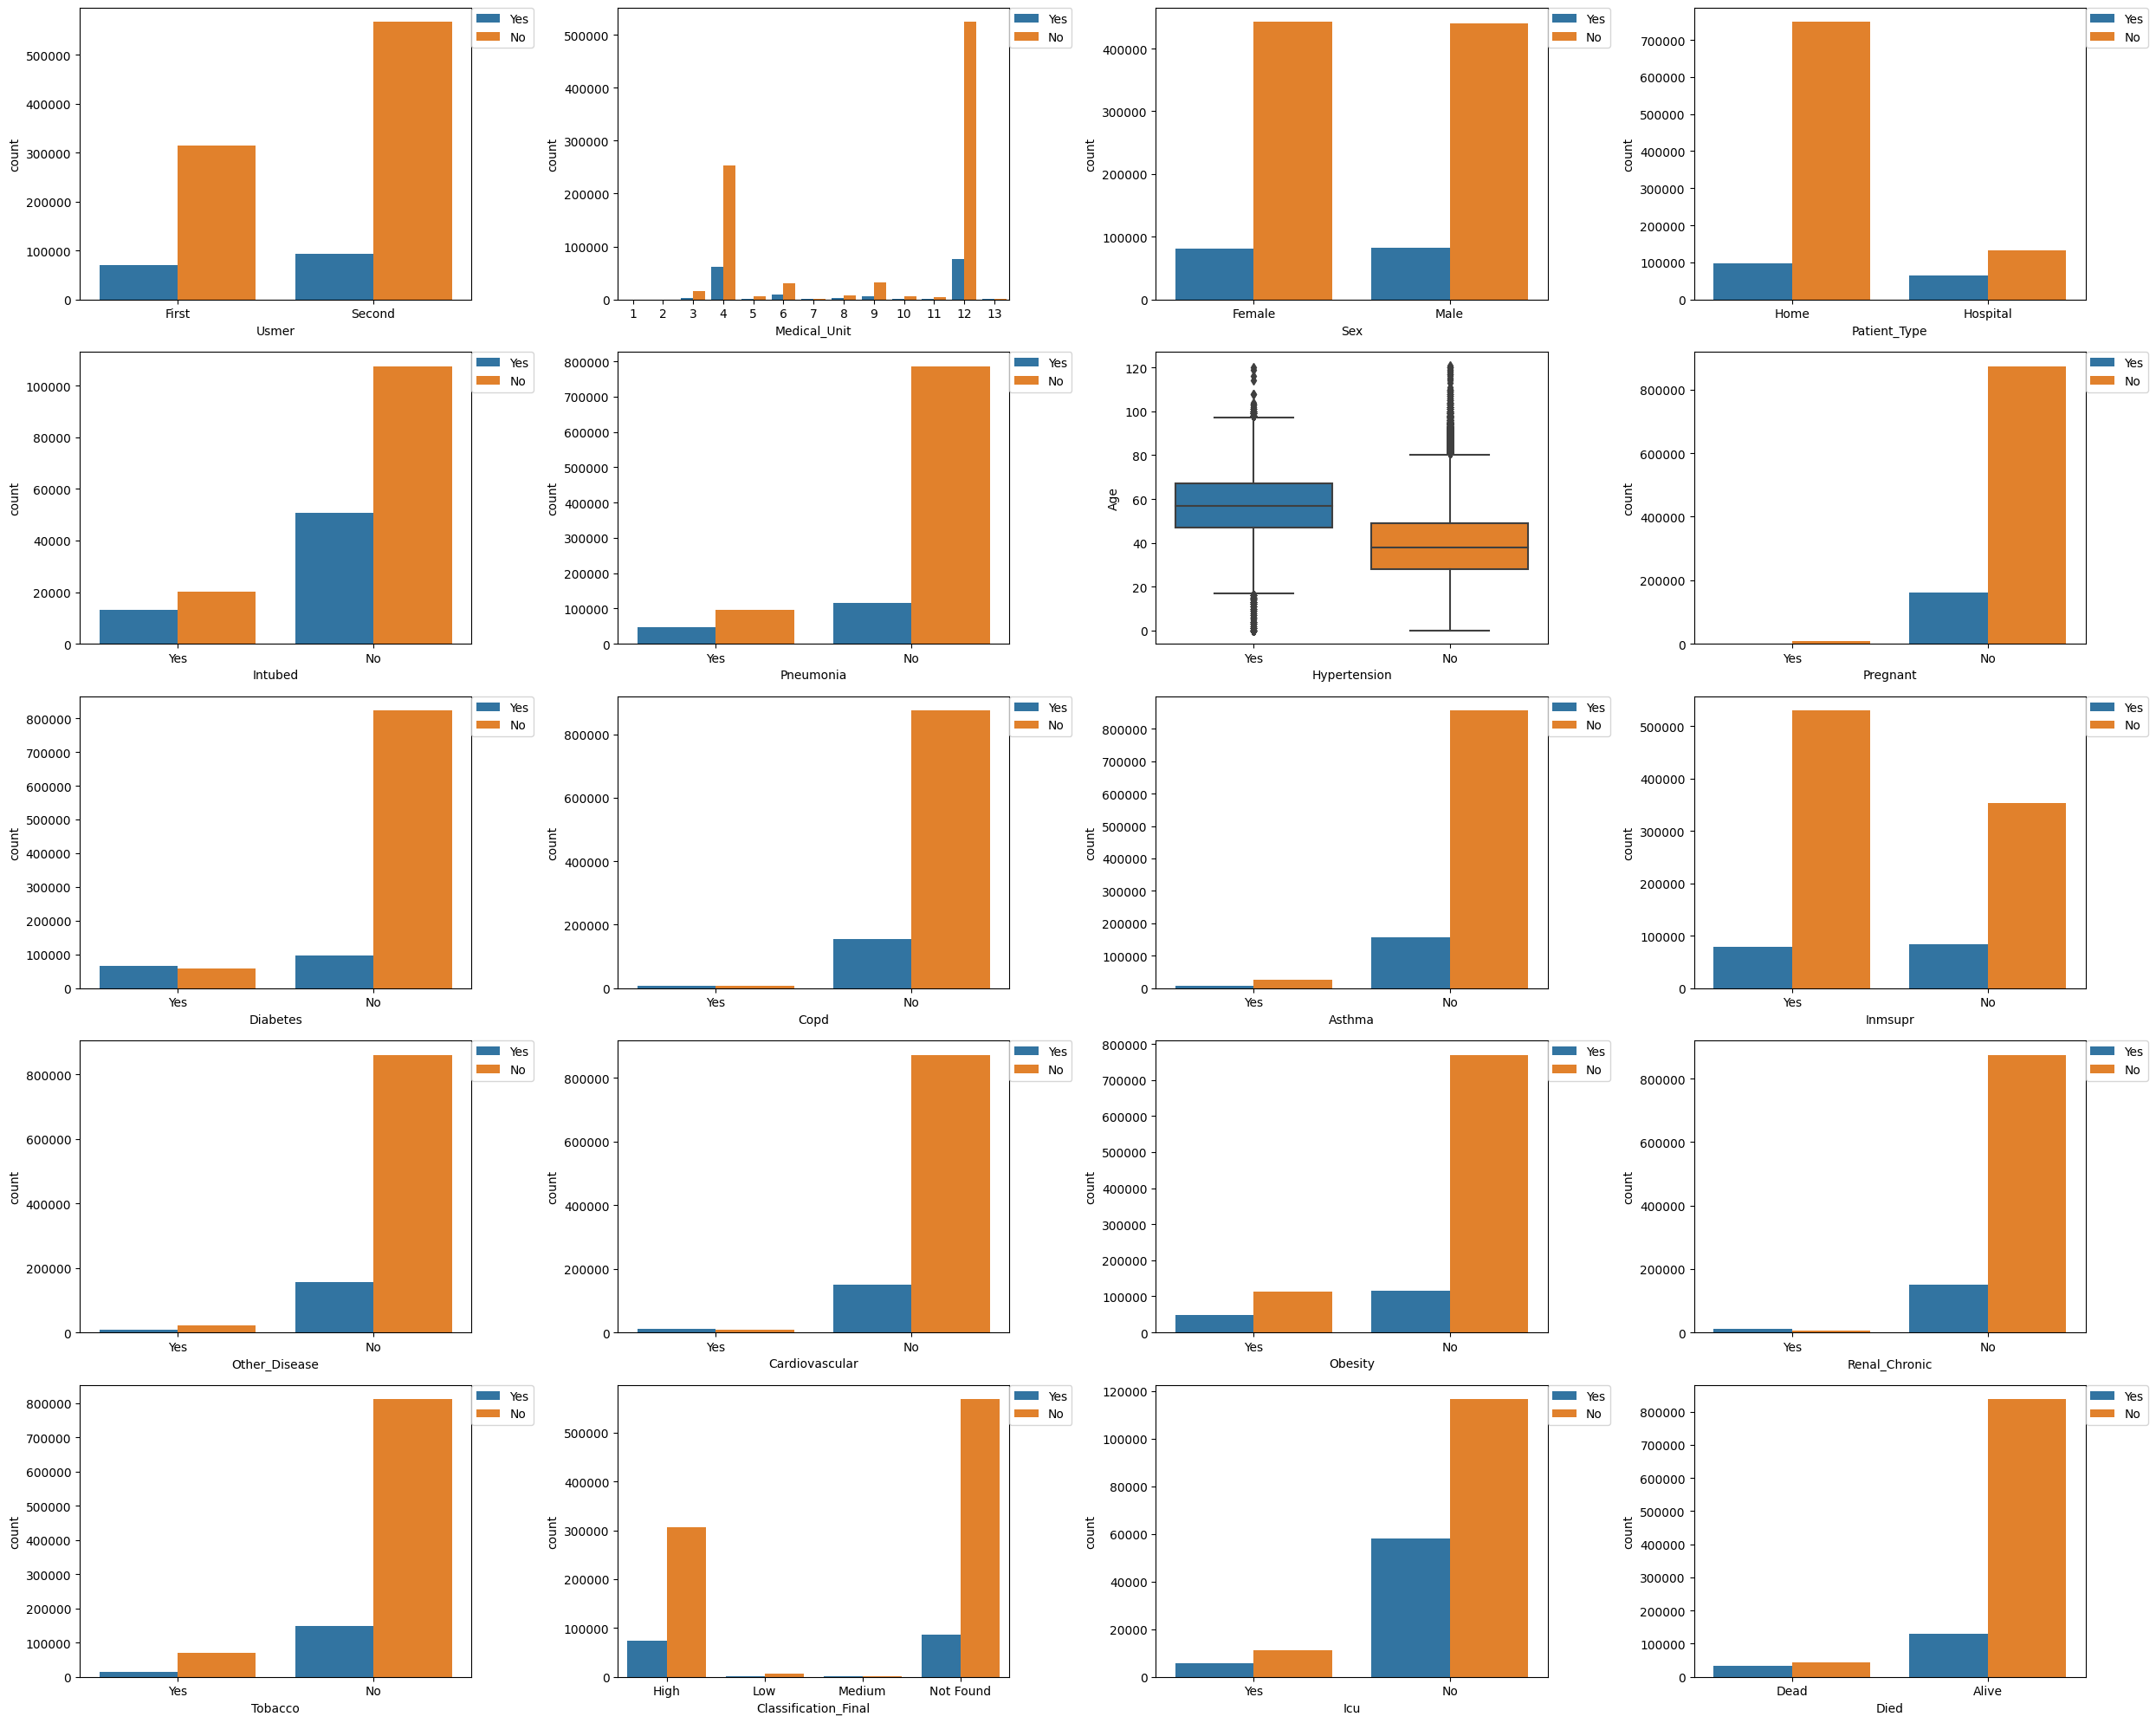

In [46]:
bivariate(y = 'Hypertension')

In [47]:
# Hypertension vs Age has a slight pattern, using that.

data.loc[(data['Age'] > 50) & (data['Hypertension'].isnull()), 'Hypertension'] = 'Yes'
data.loc[(data['Age'] <= 50) & (data['Hypertension'].isnull()), 'Hypertension'] = 'No'   

In [48]:
data.isnull().sum() [ data.isnull().sum() > 0]

Intubed           855869
Other_Disease       5045
Cardiovascular      3076
Obesity             3032
Renal_Chronic       3006
Tobacco             3220
Icu               856032
dtype: int64

### Column: Other Disease

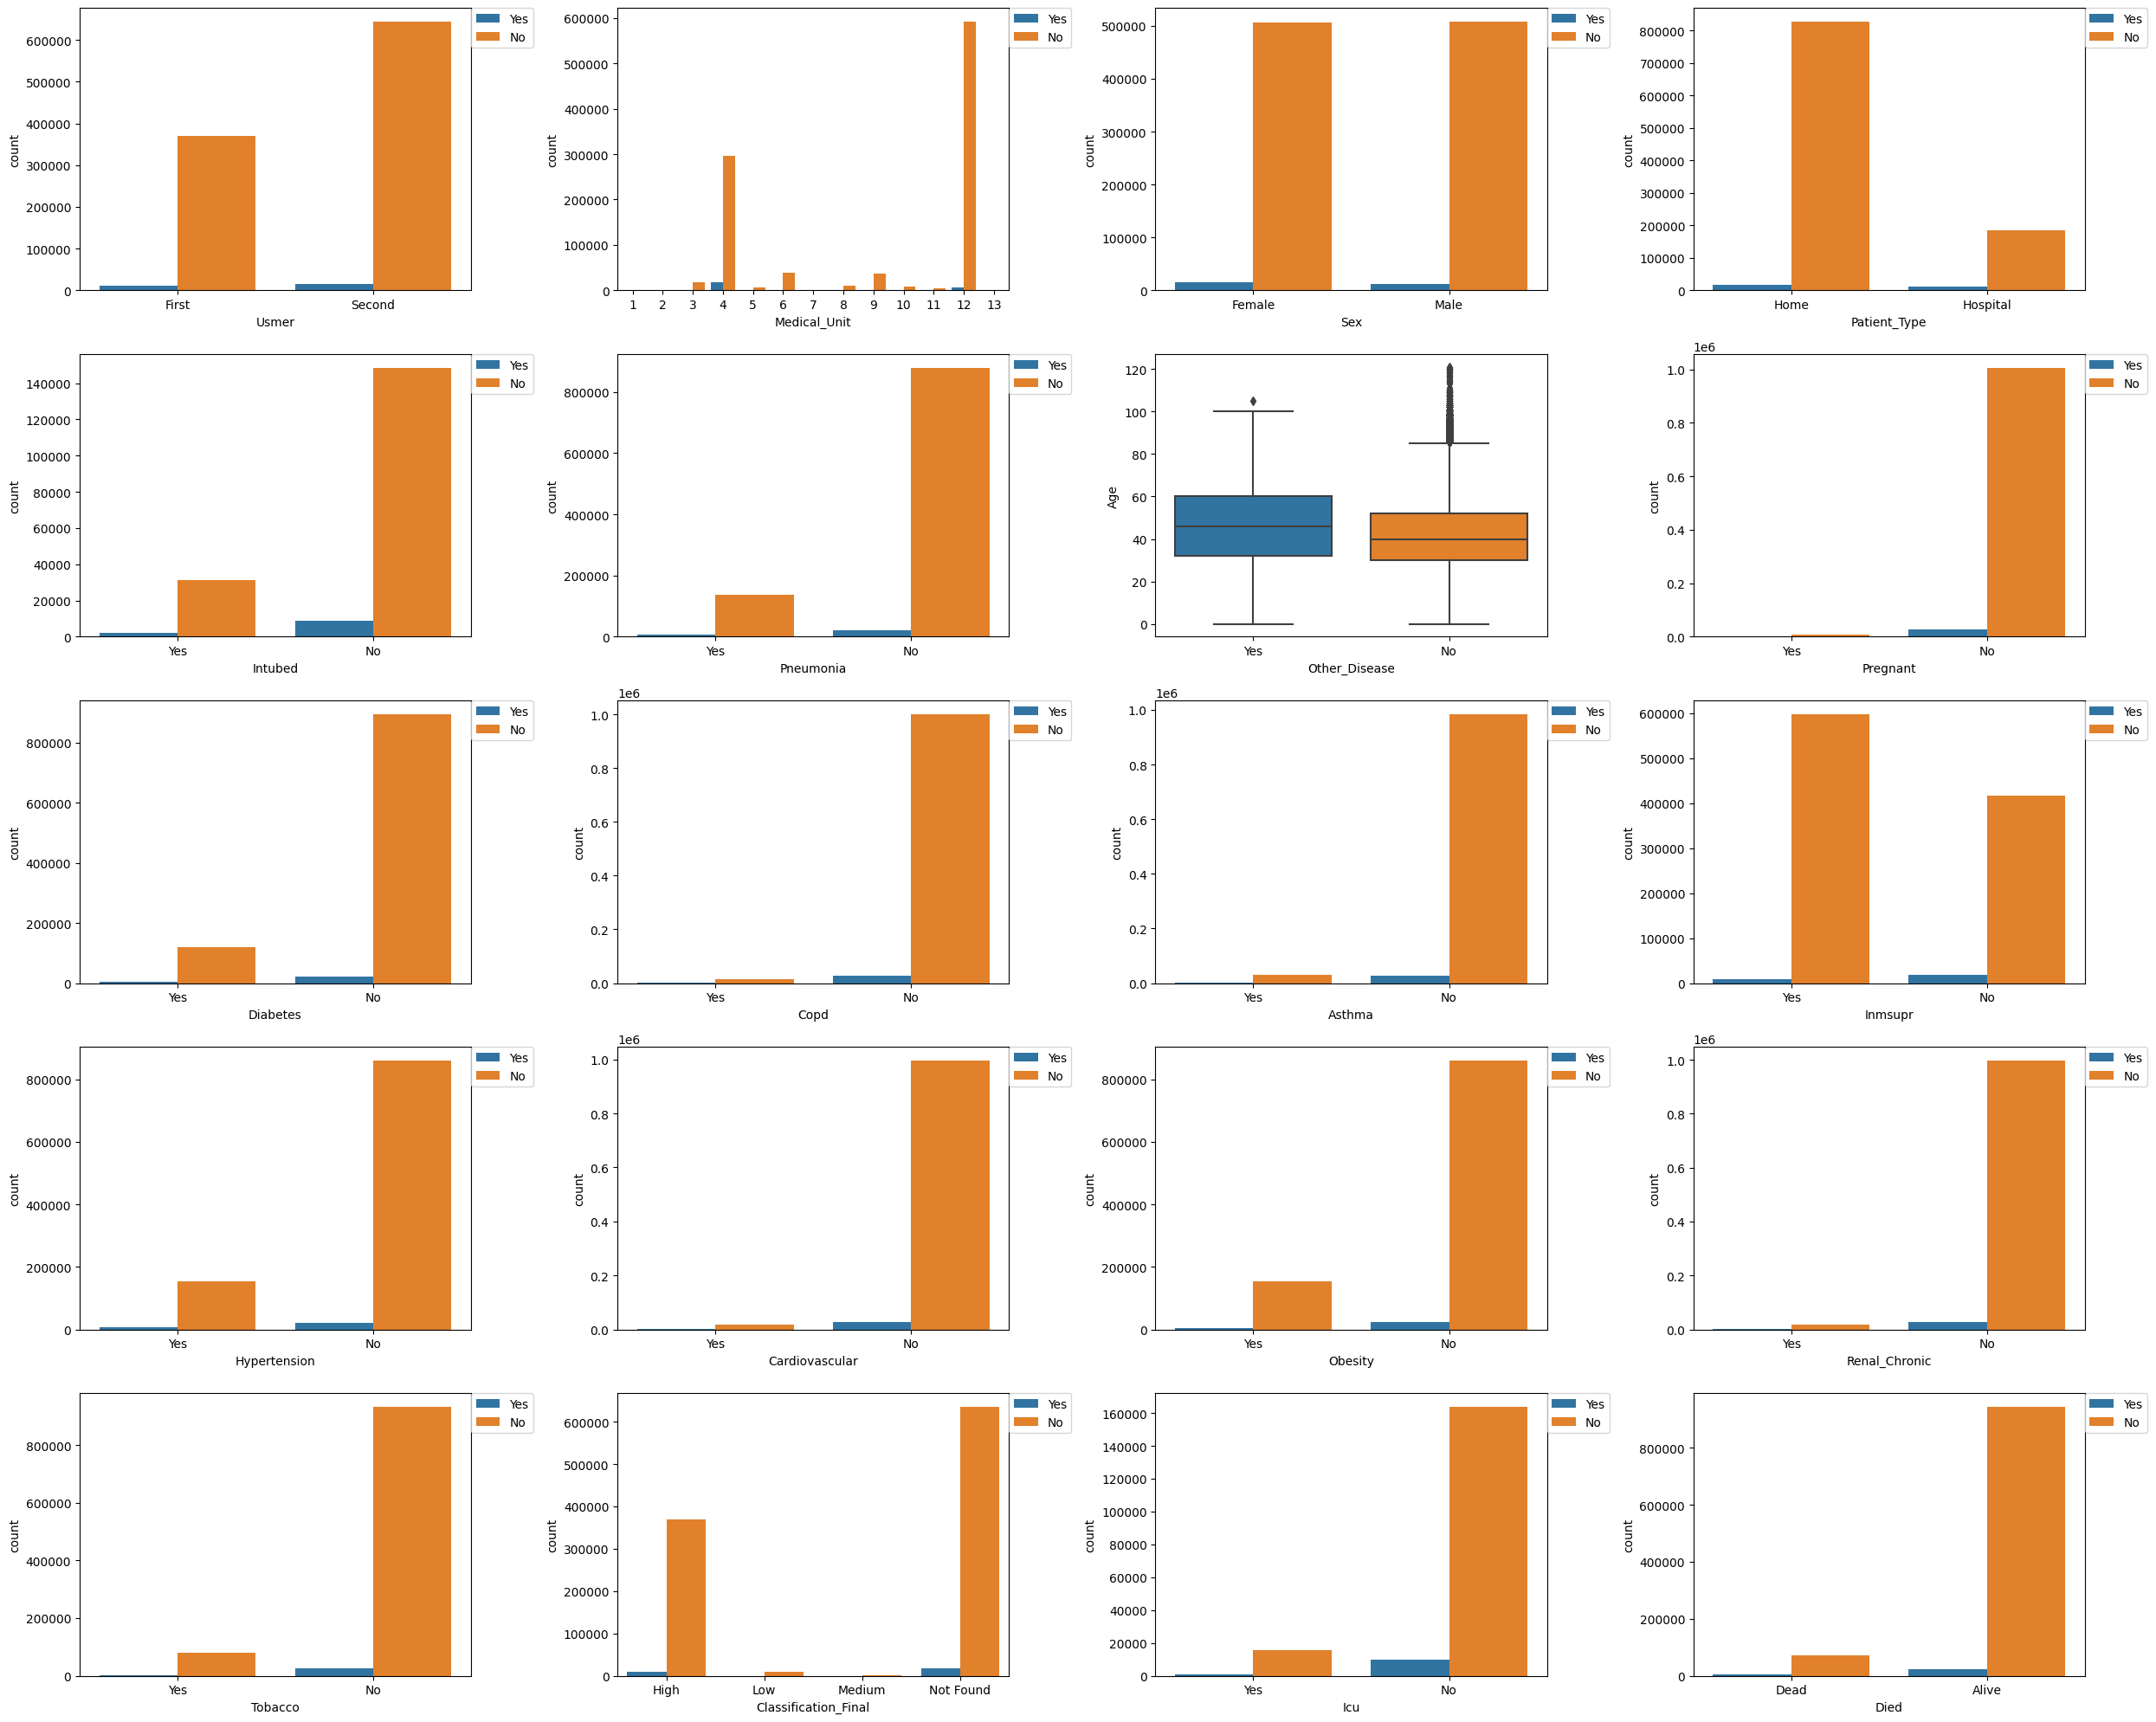

In [49]:
bivariate(y = 'Other_Disease')

In [50]:
# "Medical Unit" gives a slight pattern with "Other Disease": 
# May be patients having other Diseases are assign Units 4, 12

data.loc[(data['Other_Disease'].isnull()) & (data['Medical_Unit'] == 4) | (data['Medical_Unit'] == 12), 'Other_Disease'] = 'Yes'
data.loc[data['Other_Disease'].isnull(), 'Other_Disease'] = 'No'

In [51]:
data.isnull().sum() [ data.isnull().sum() > 0]

Intubed           855869
Cardiovascular      3076
Obesity             3032
Renal_Chronic       3006
Tobacco             3220
Icu               856032
dtype: int64

### Column: Cardiovascular

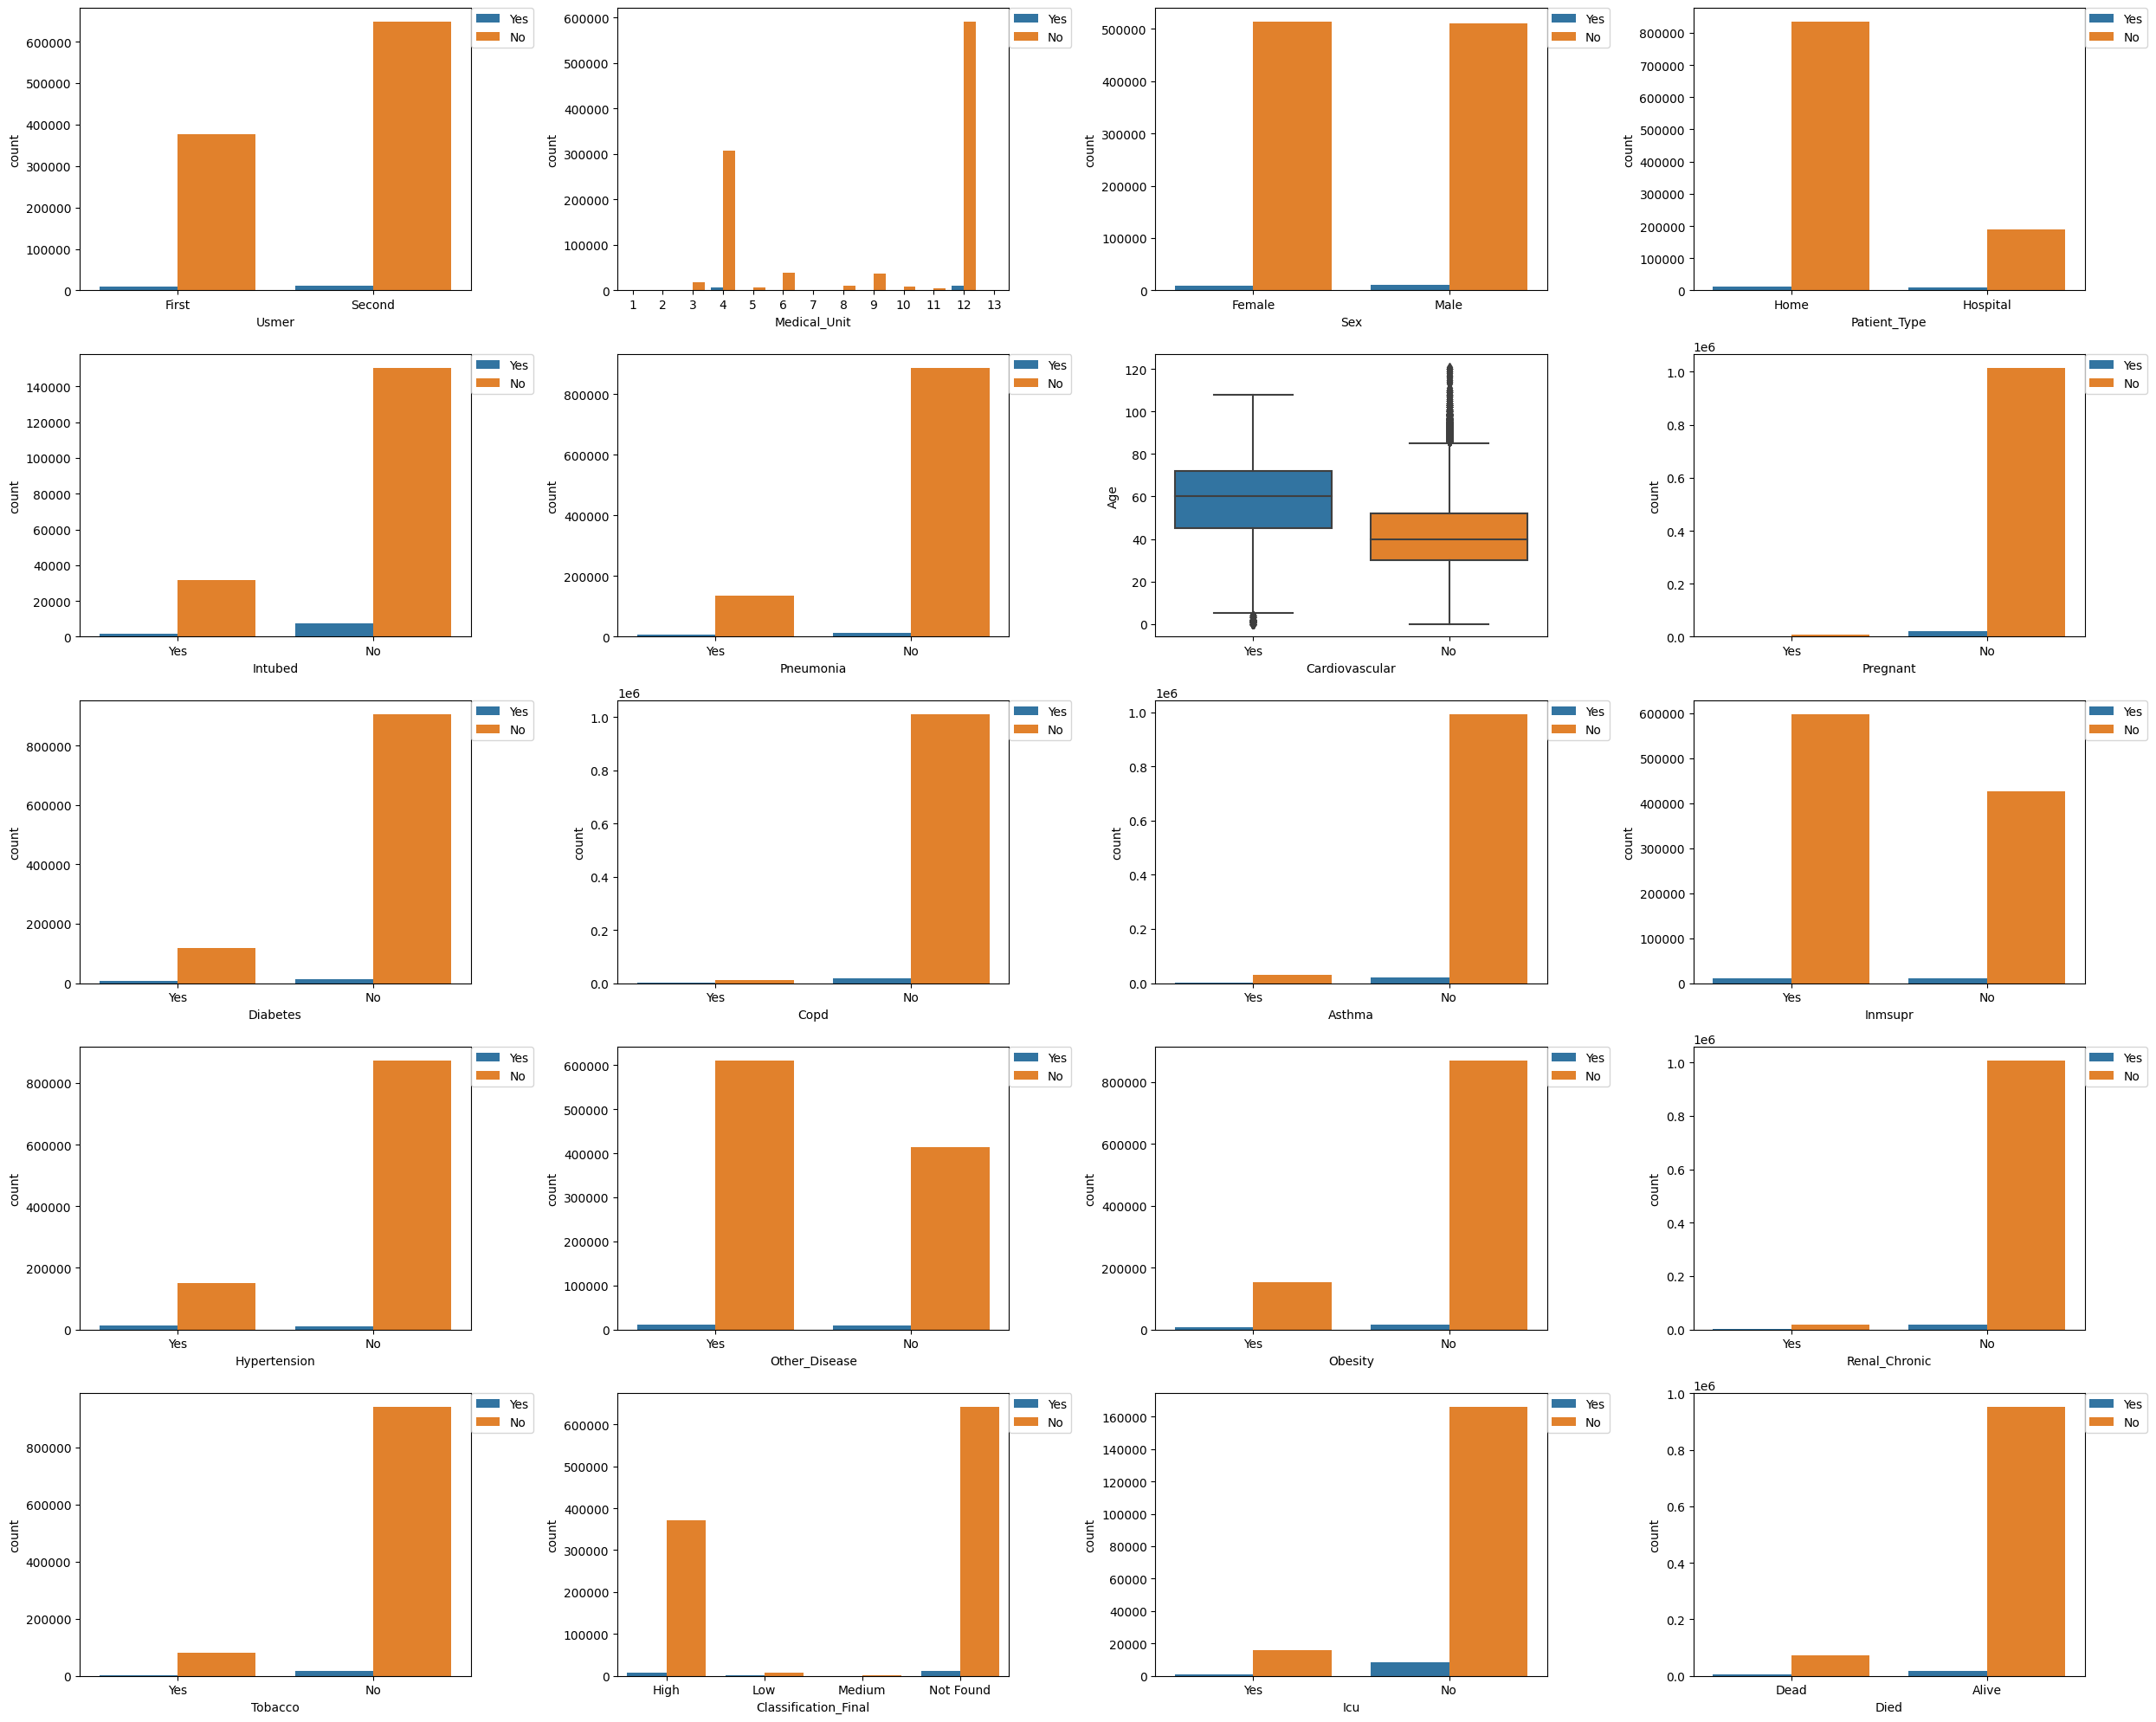

In [52]:
bivariate(y = 'Cardiovascular')

In [53]:
# Age vs Cardiovascular has a slight pattern.

data.loc[(data['Age'] > 50) & (data['Cardiovascular'].isnull()), 'Cardiovascular'] = 'Yes'
data.loc[(data['Age'] <= 50) & (data['Cardiovascular'].isnull()), 'Cardiovascular'] = 'No'   

In [54]:
data.isnull().sum() [ data.isnull().sum() > 0]

Intubed          855869
Obesity            3032
Renal_Chronic      3006
Tobacco            3220
Icu              856032
dtype: int64

### Column: Obesity

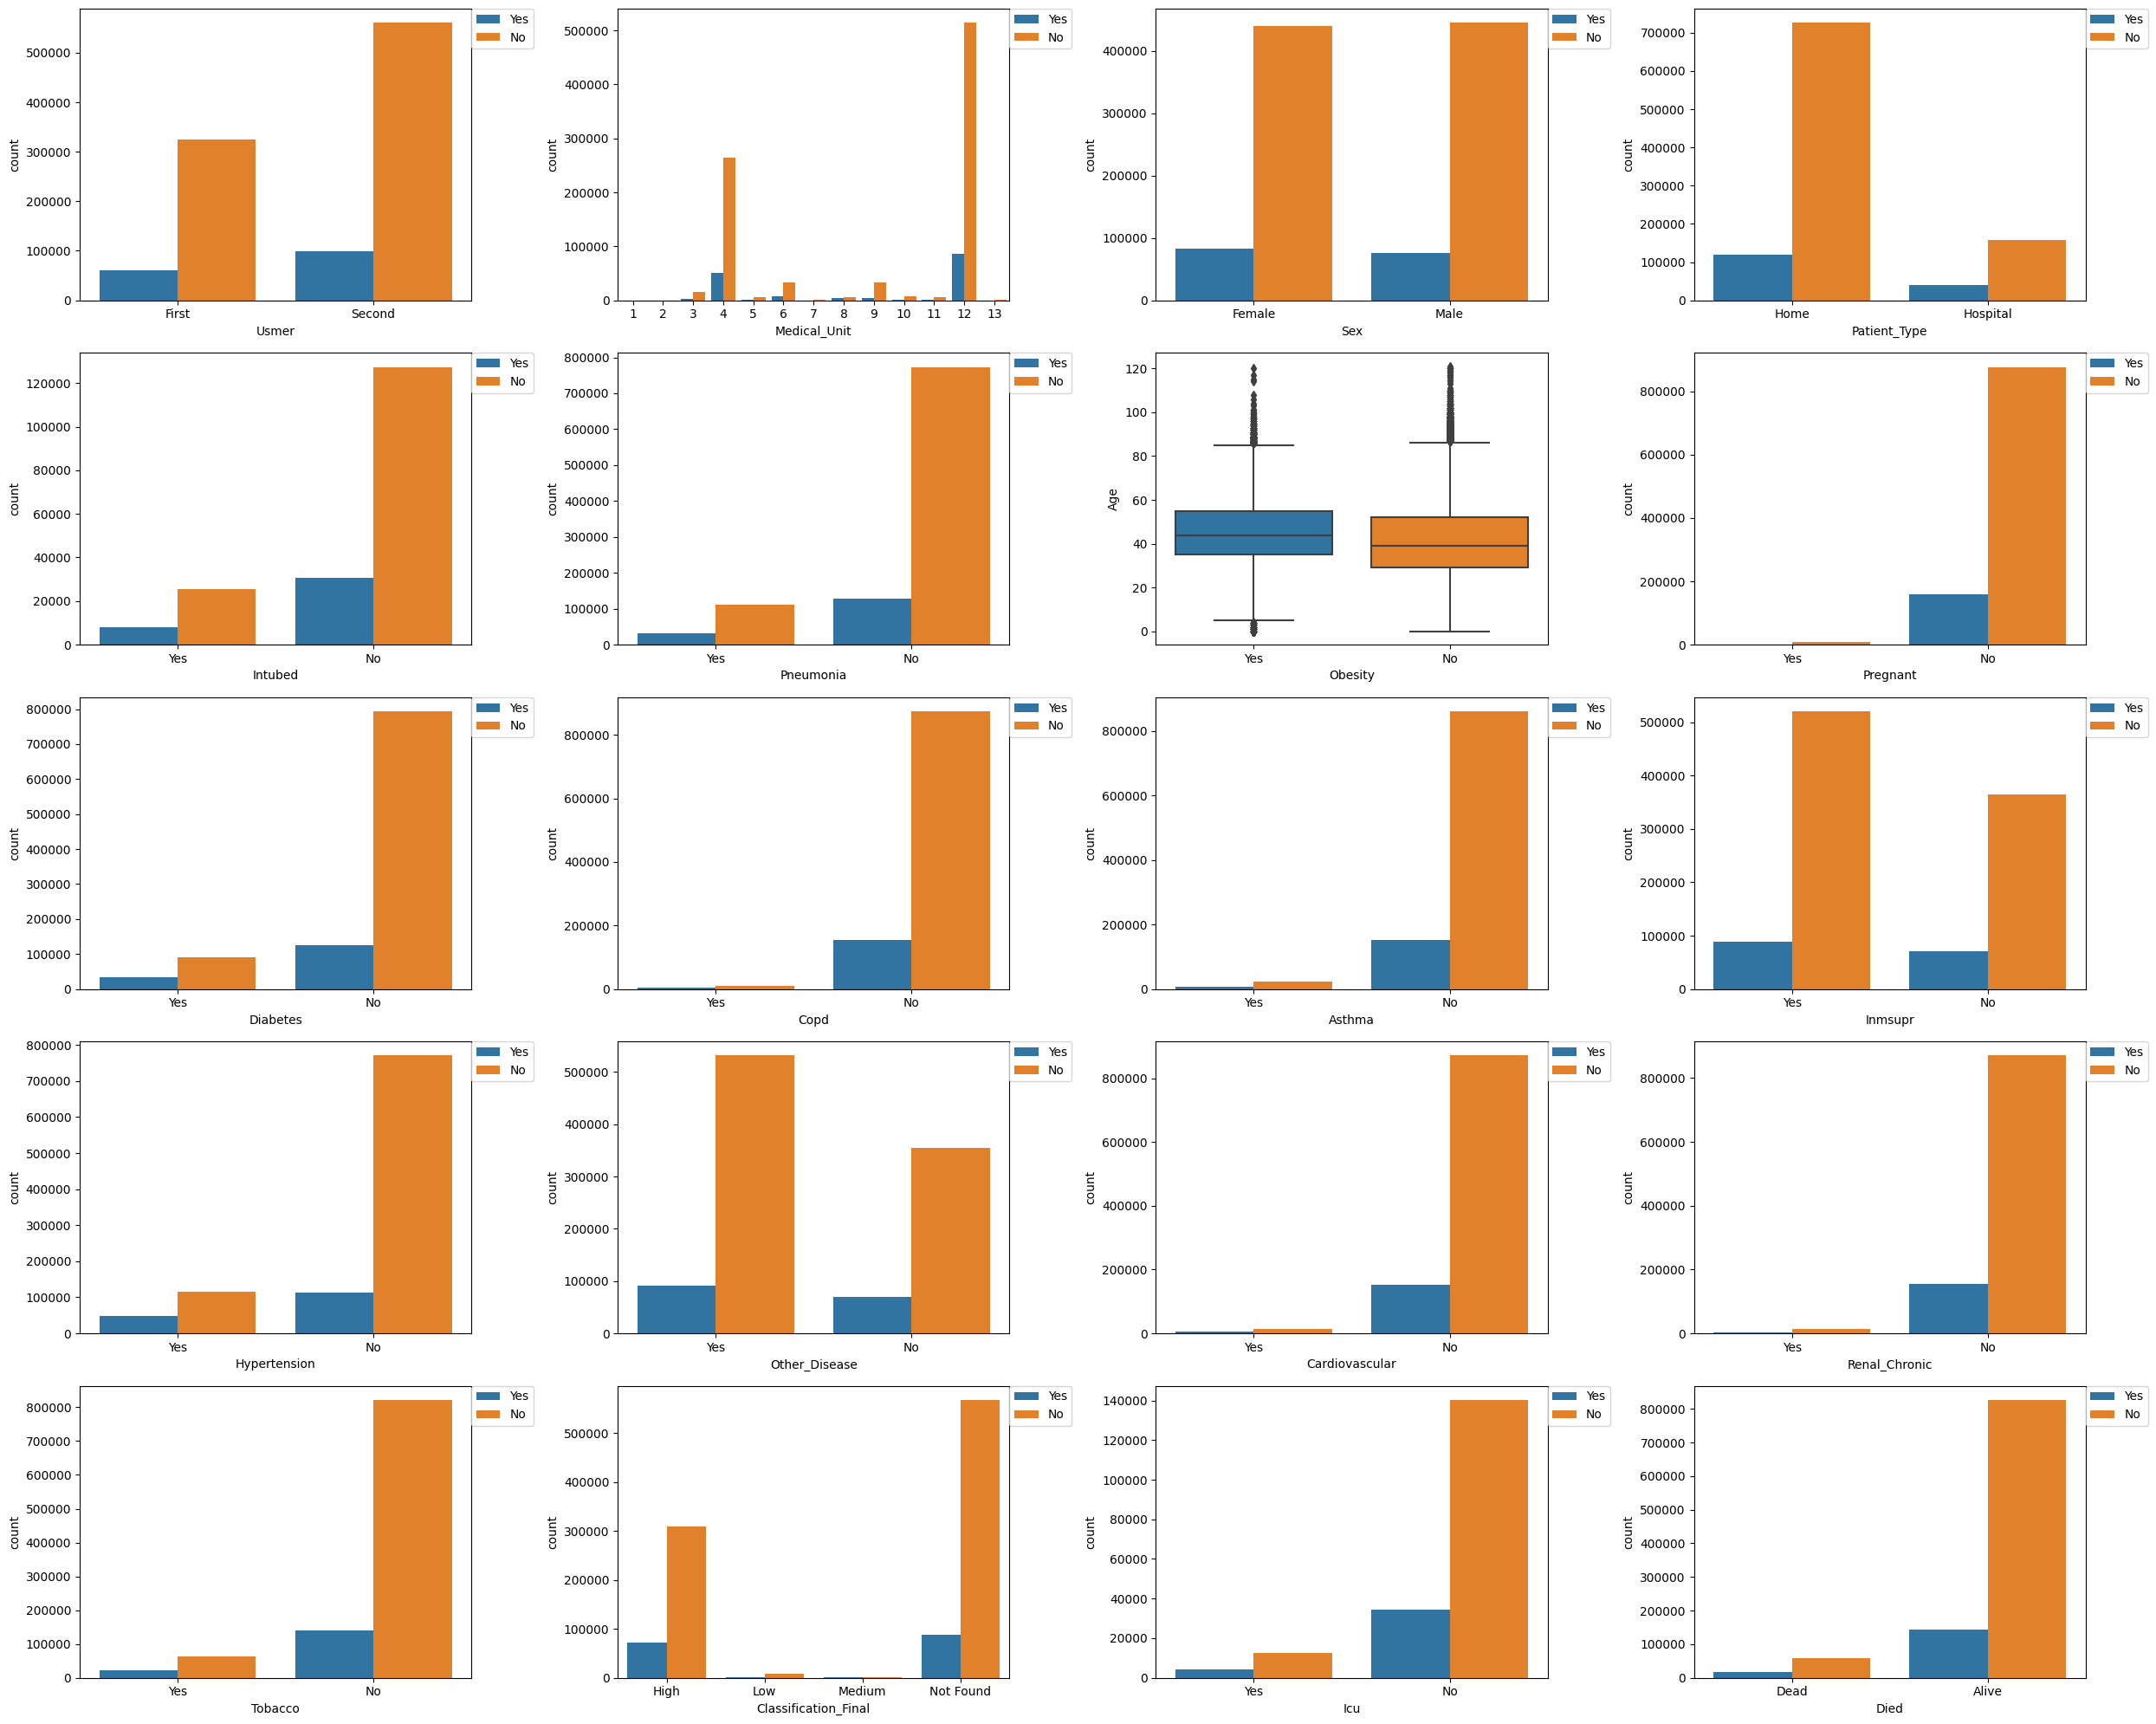

In [55]:
bivariate(y = 'Obesity')

In [56]:
# Adding random values since no pattern is found yet.

add_rand_choice('Obesity')

In [57]:
data.isnull().sum() [ data.isnull().sum() > 0]

Intubed          855869
Renal_Chronic      3006
Tobacco            3220
Icu              856032
dtype: int64

### Column: Renal Chronic

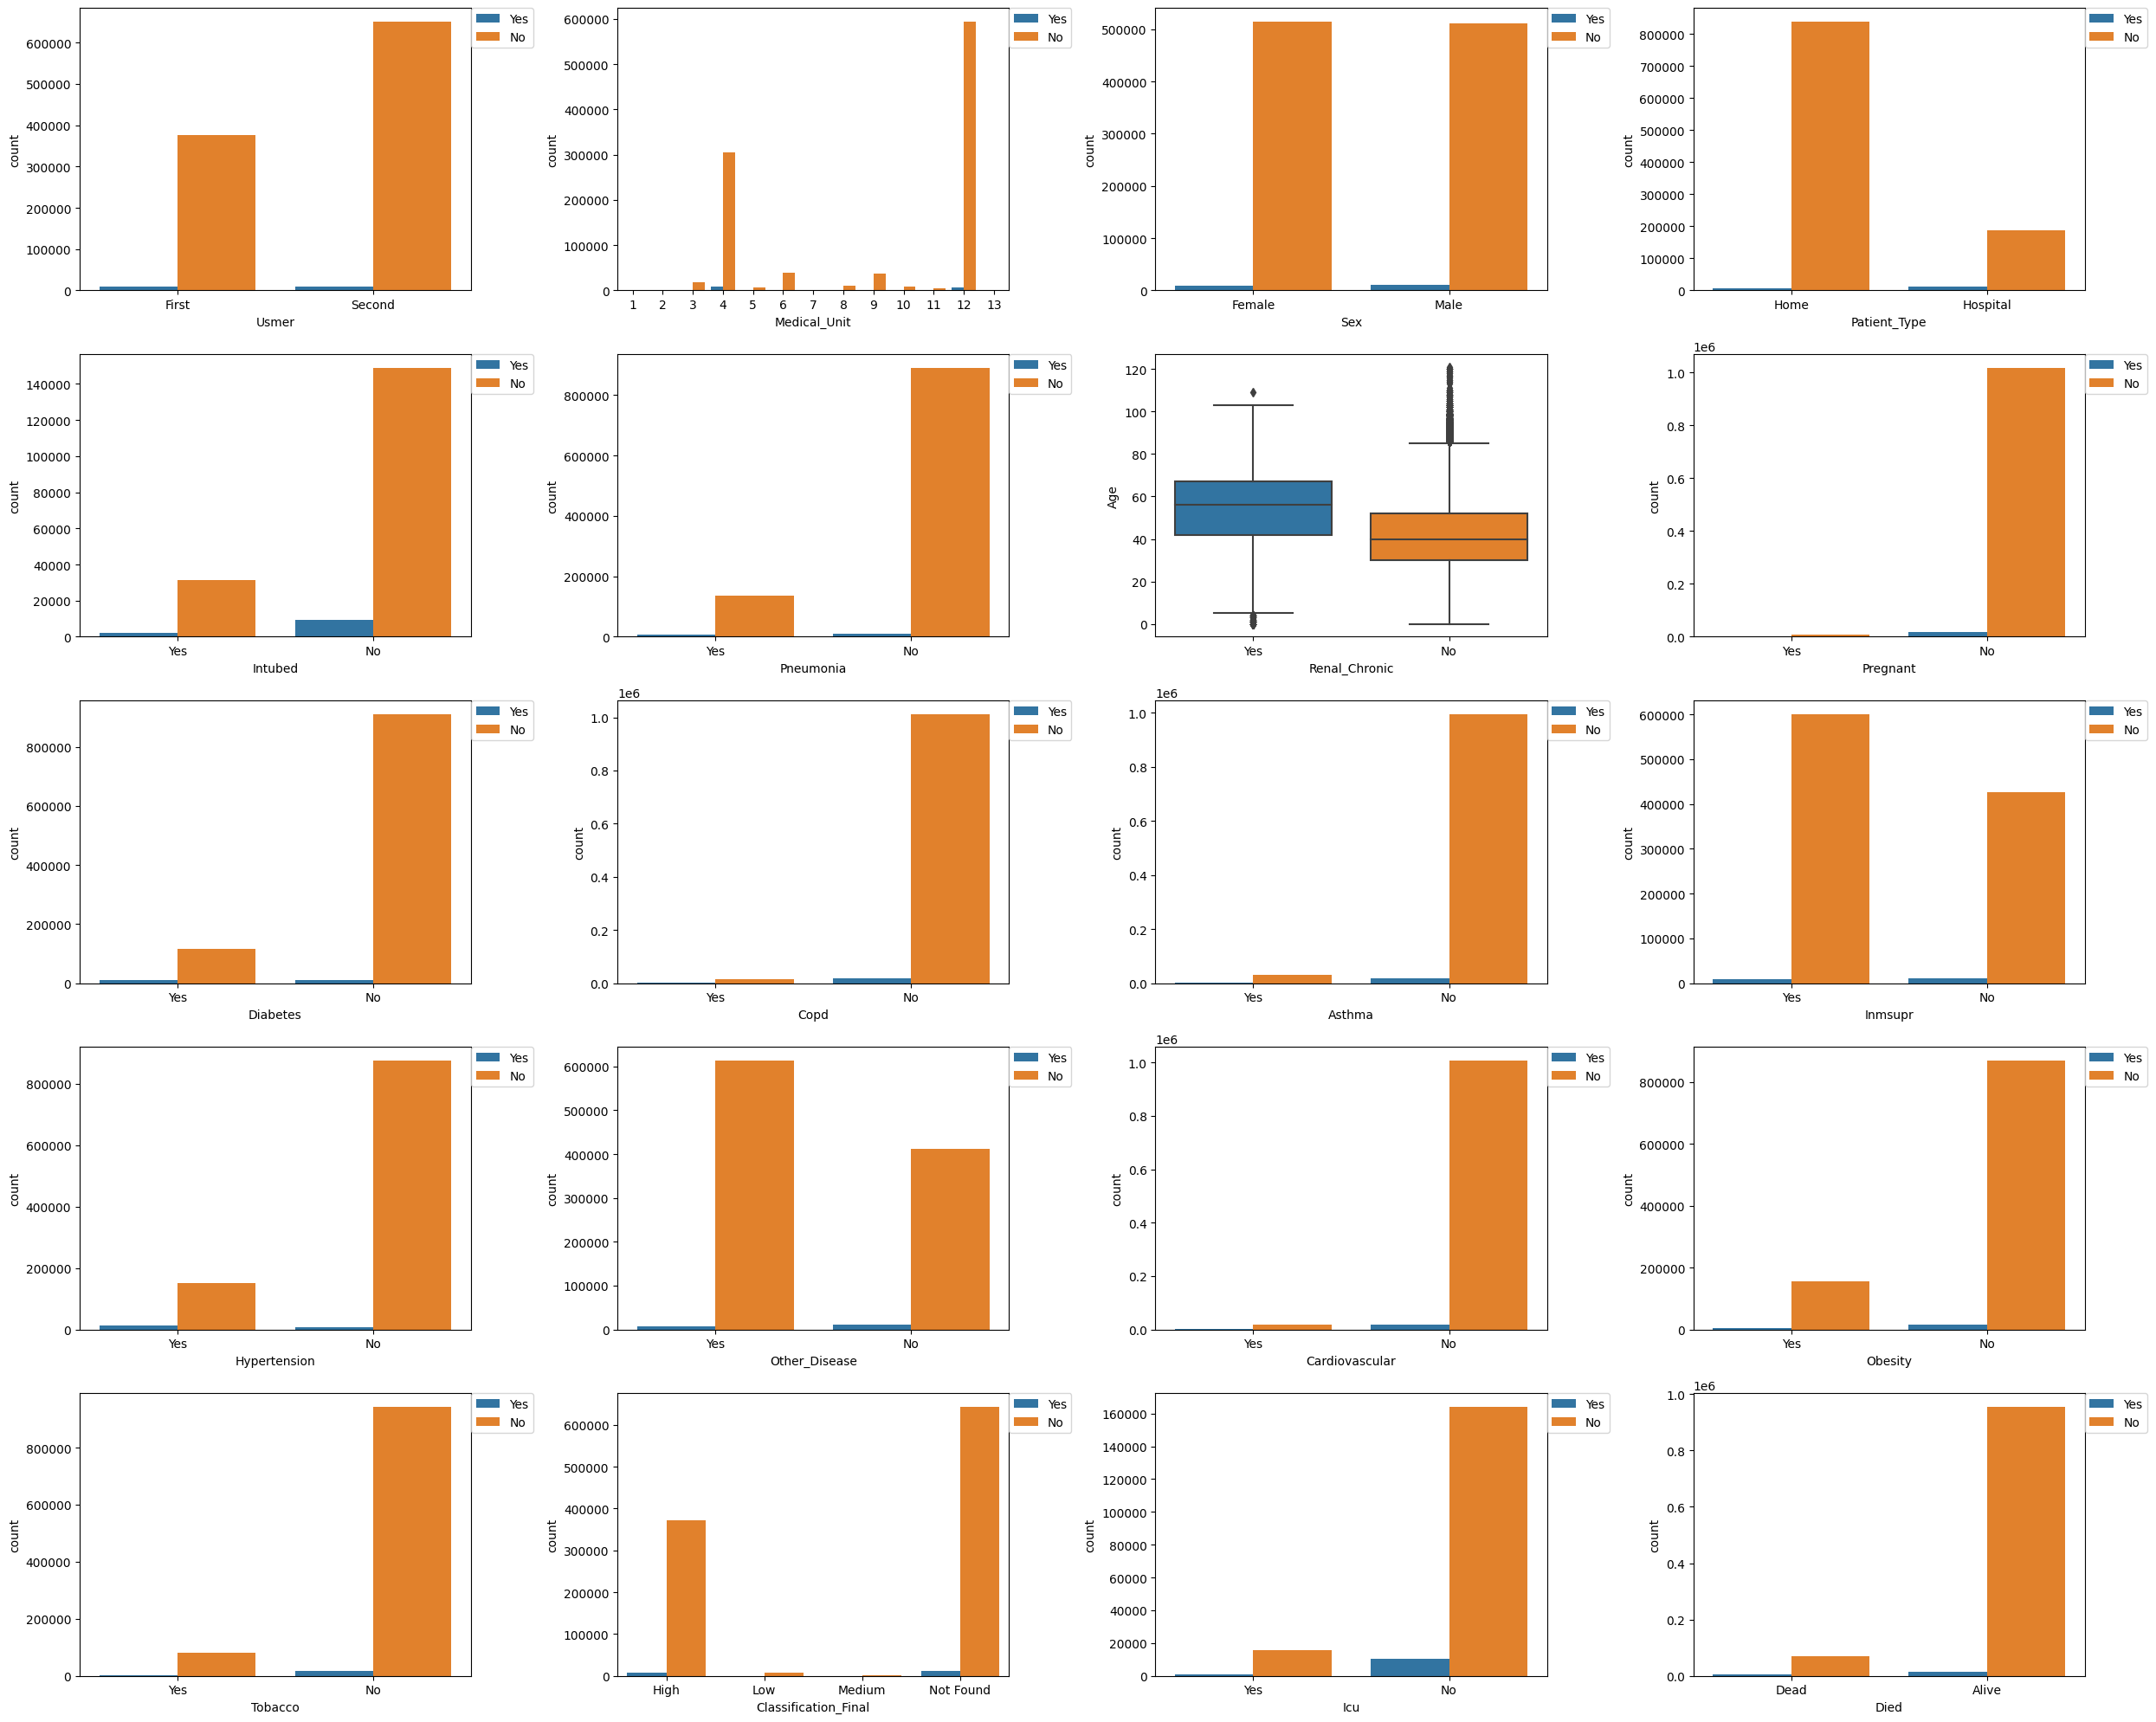

In [58]:
bivariate(y = 'Renal_Chronic')

In [59]:
# "Medical Unit" gives a slight pattern with "Renal Chronic": 
# May be patients having chronic renal disease are assigned Units 4, 12

data.loc[(data['Renal_Chronic'].isnull()) & (data['Medical_Unit'] == 4) | (data['Medical_Unit'] == 12), 'Renal_Chronic'] = 'Yes'
data.loc[data['Renal_Chronic'].isnull(), 'Renal_Chronic'] = 'No'

In [60]:
data.isnull().sum() [ data.isnull().sum() > 0]

Intubed    855869
Tobacco      3220
Icu        856032
dtype: int64

### Column: Tobacco

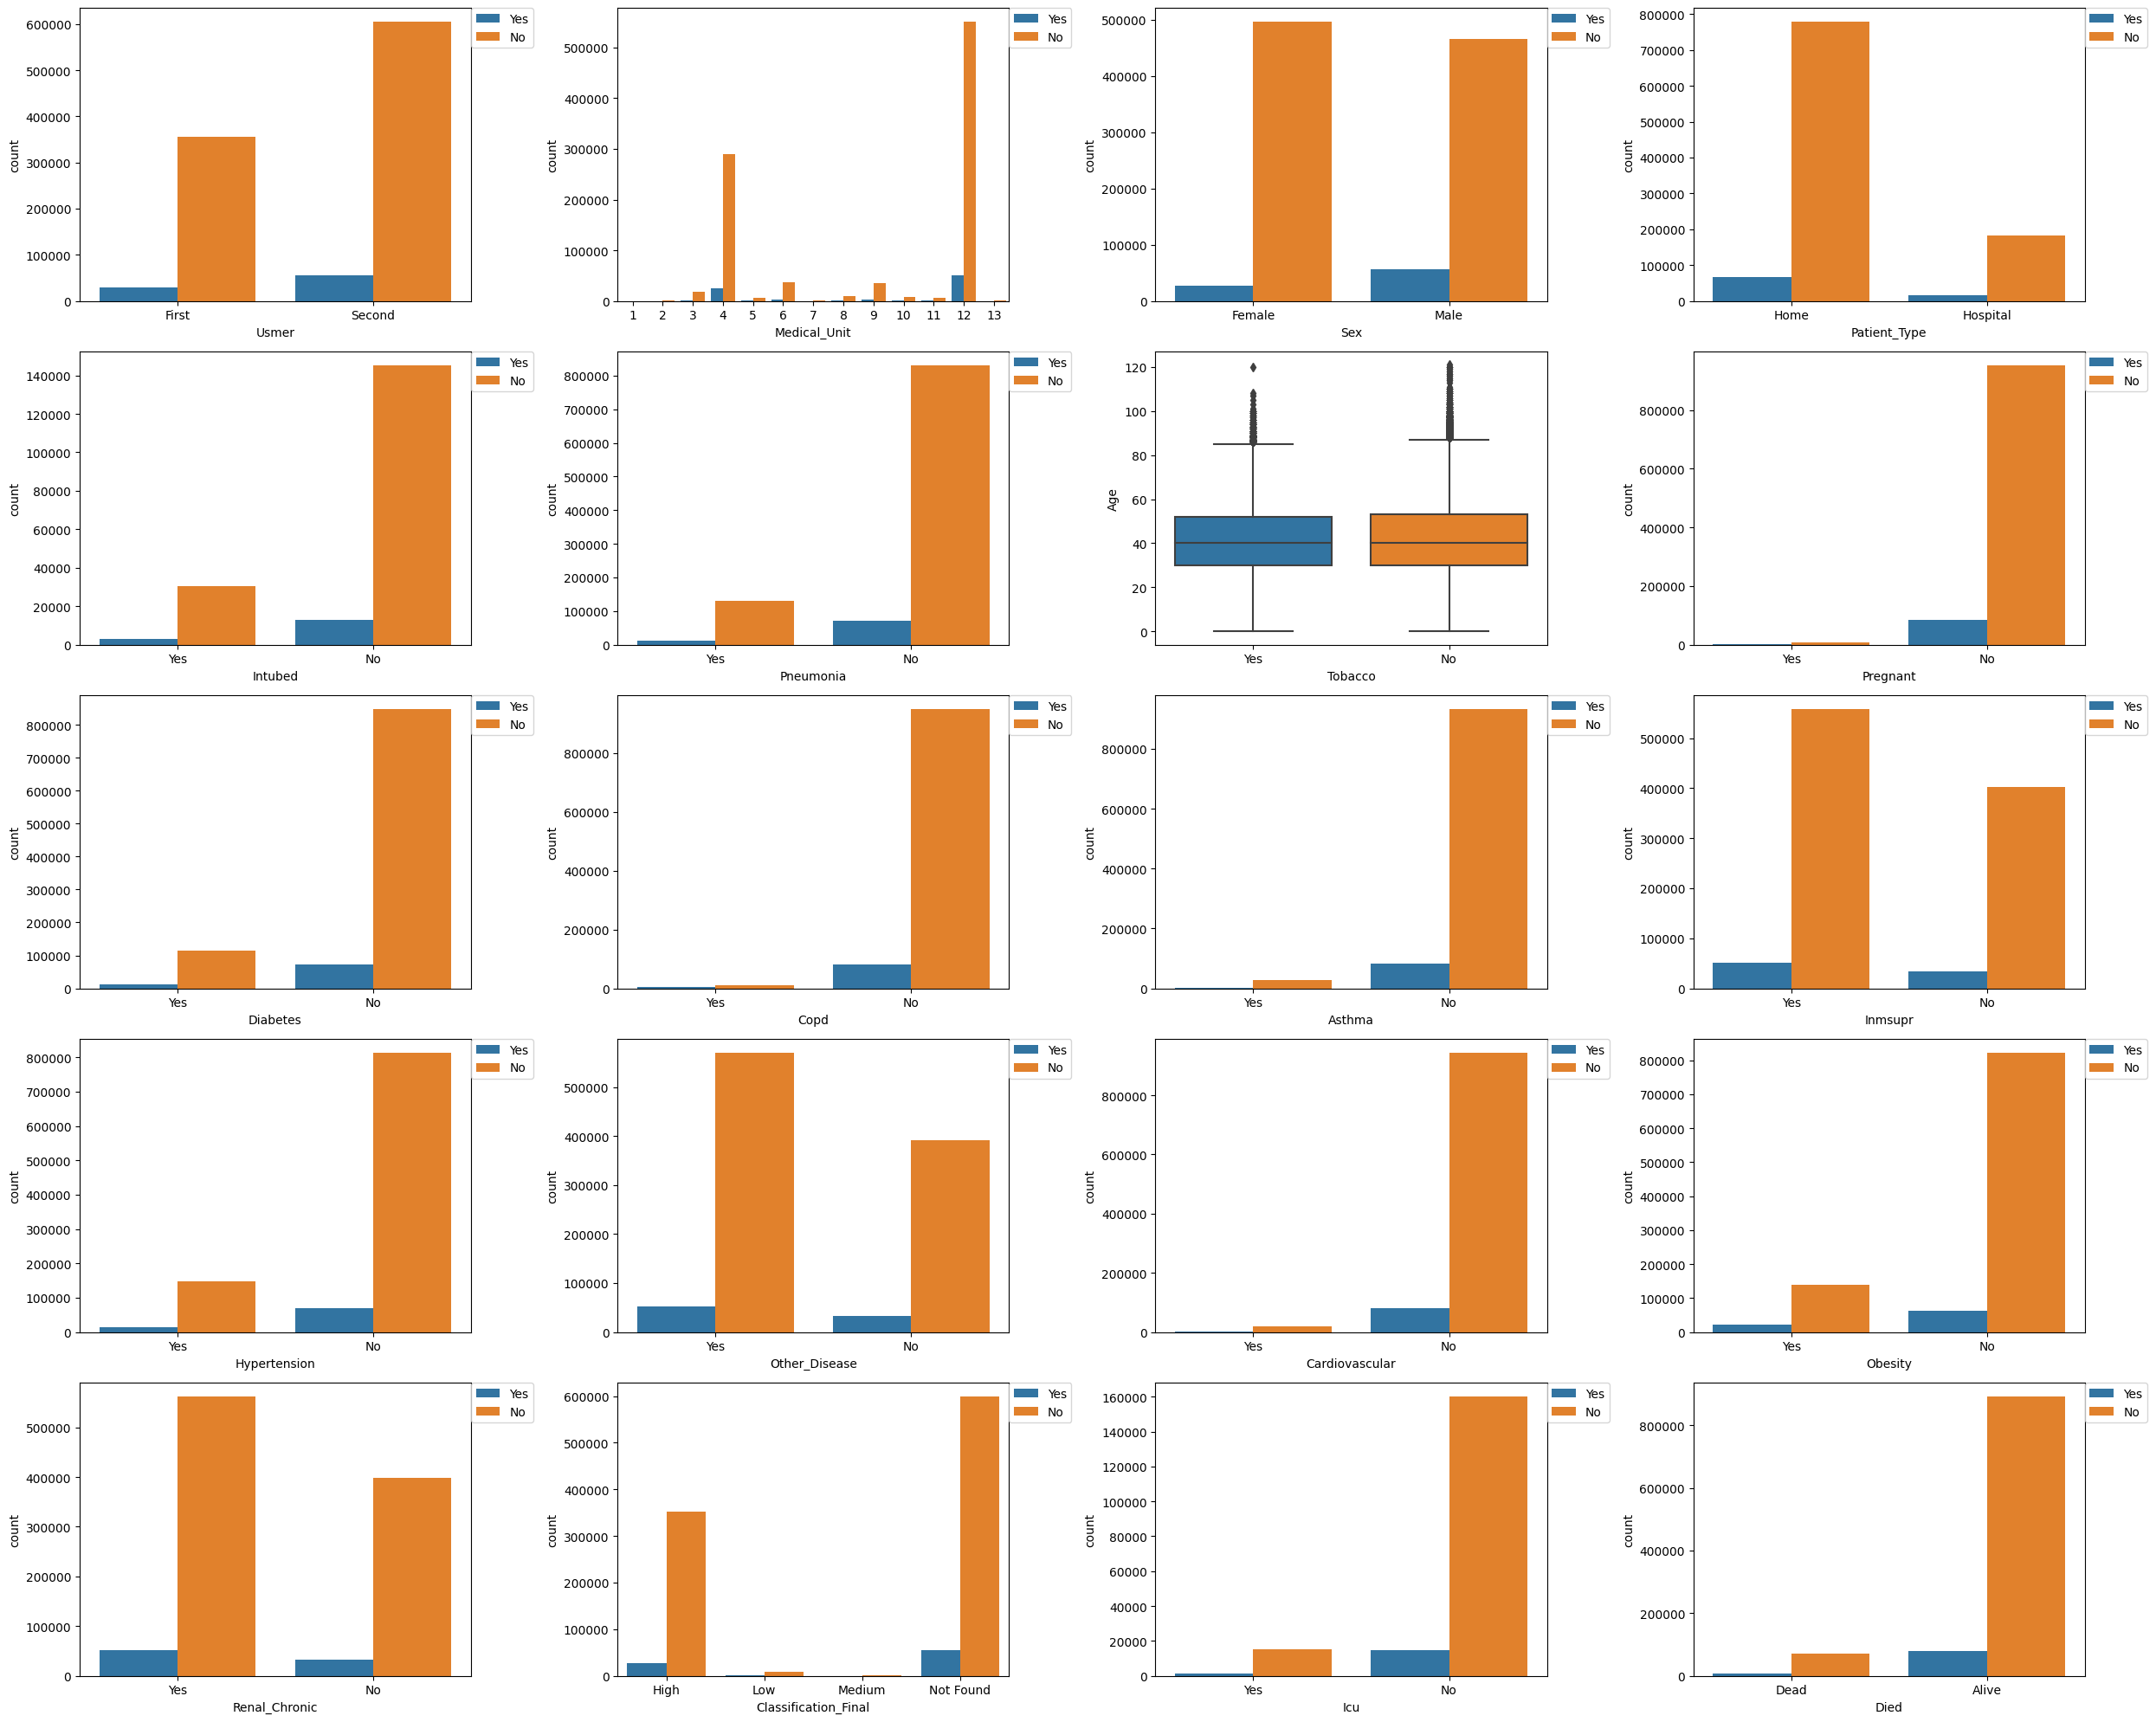

In [61]:
bivariate(y = 'Tobacco')

In [62]:
# No relation found, Imputing random values.

add_rand_choice('Tobacco')

In [63]:
data.isnull().sum() [ data.isnull().sum() > 0]

Intubed    855869
Icu        856032
dtype: int64

### Column: Intubed

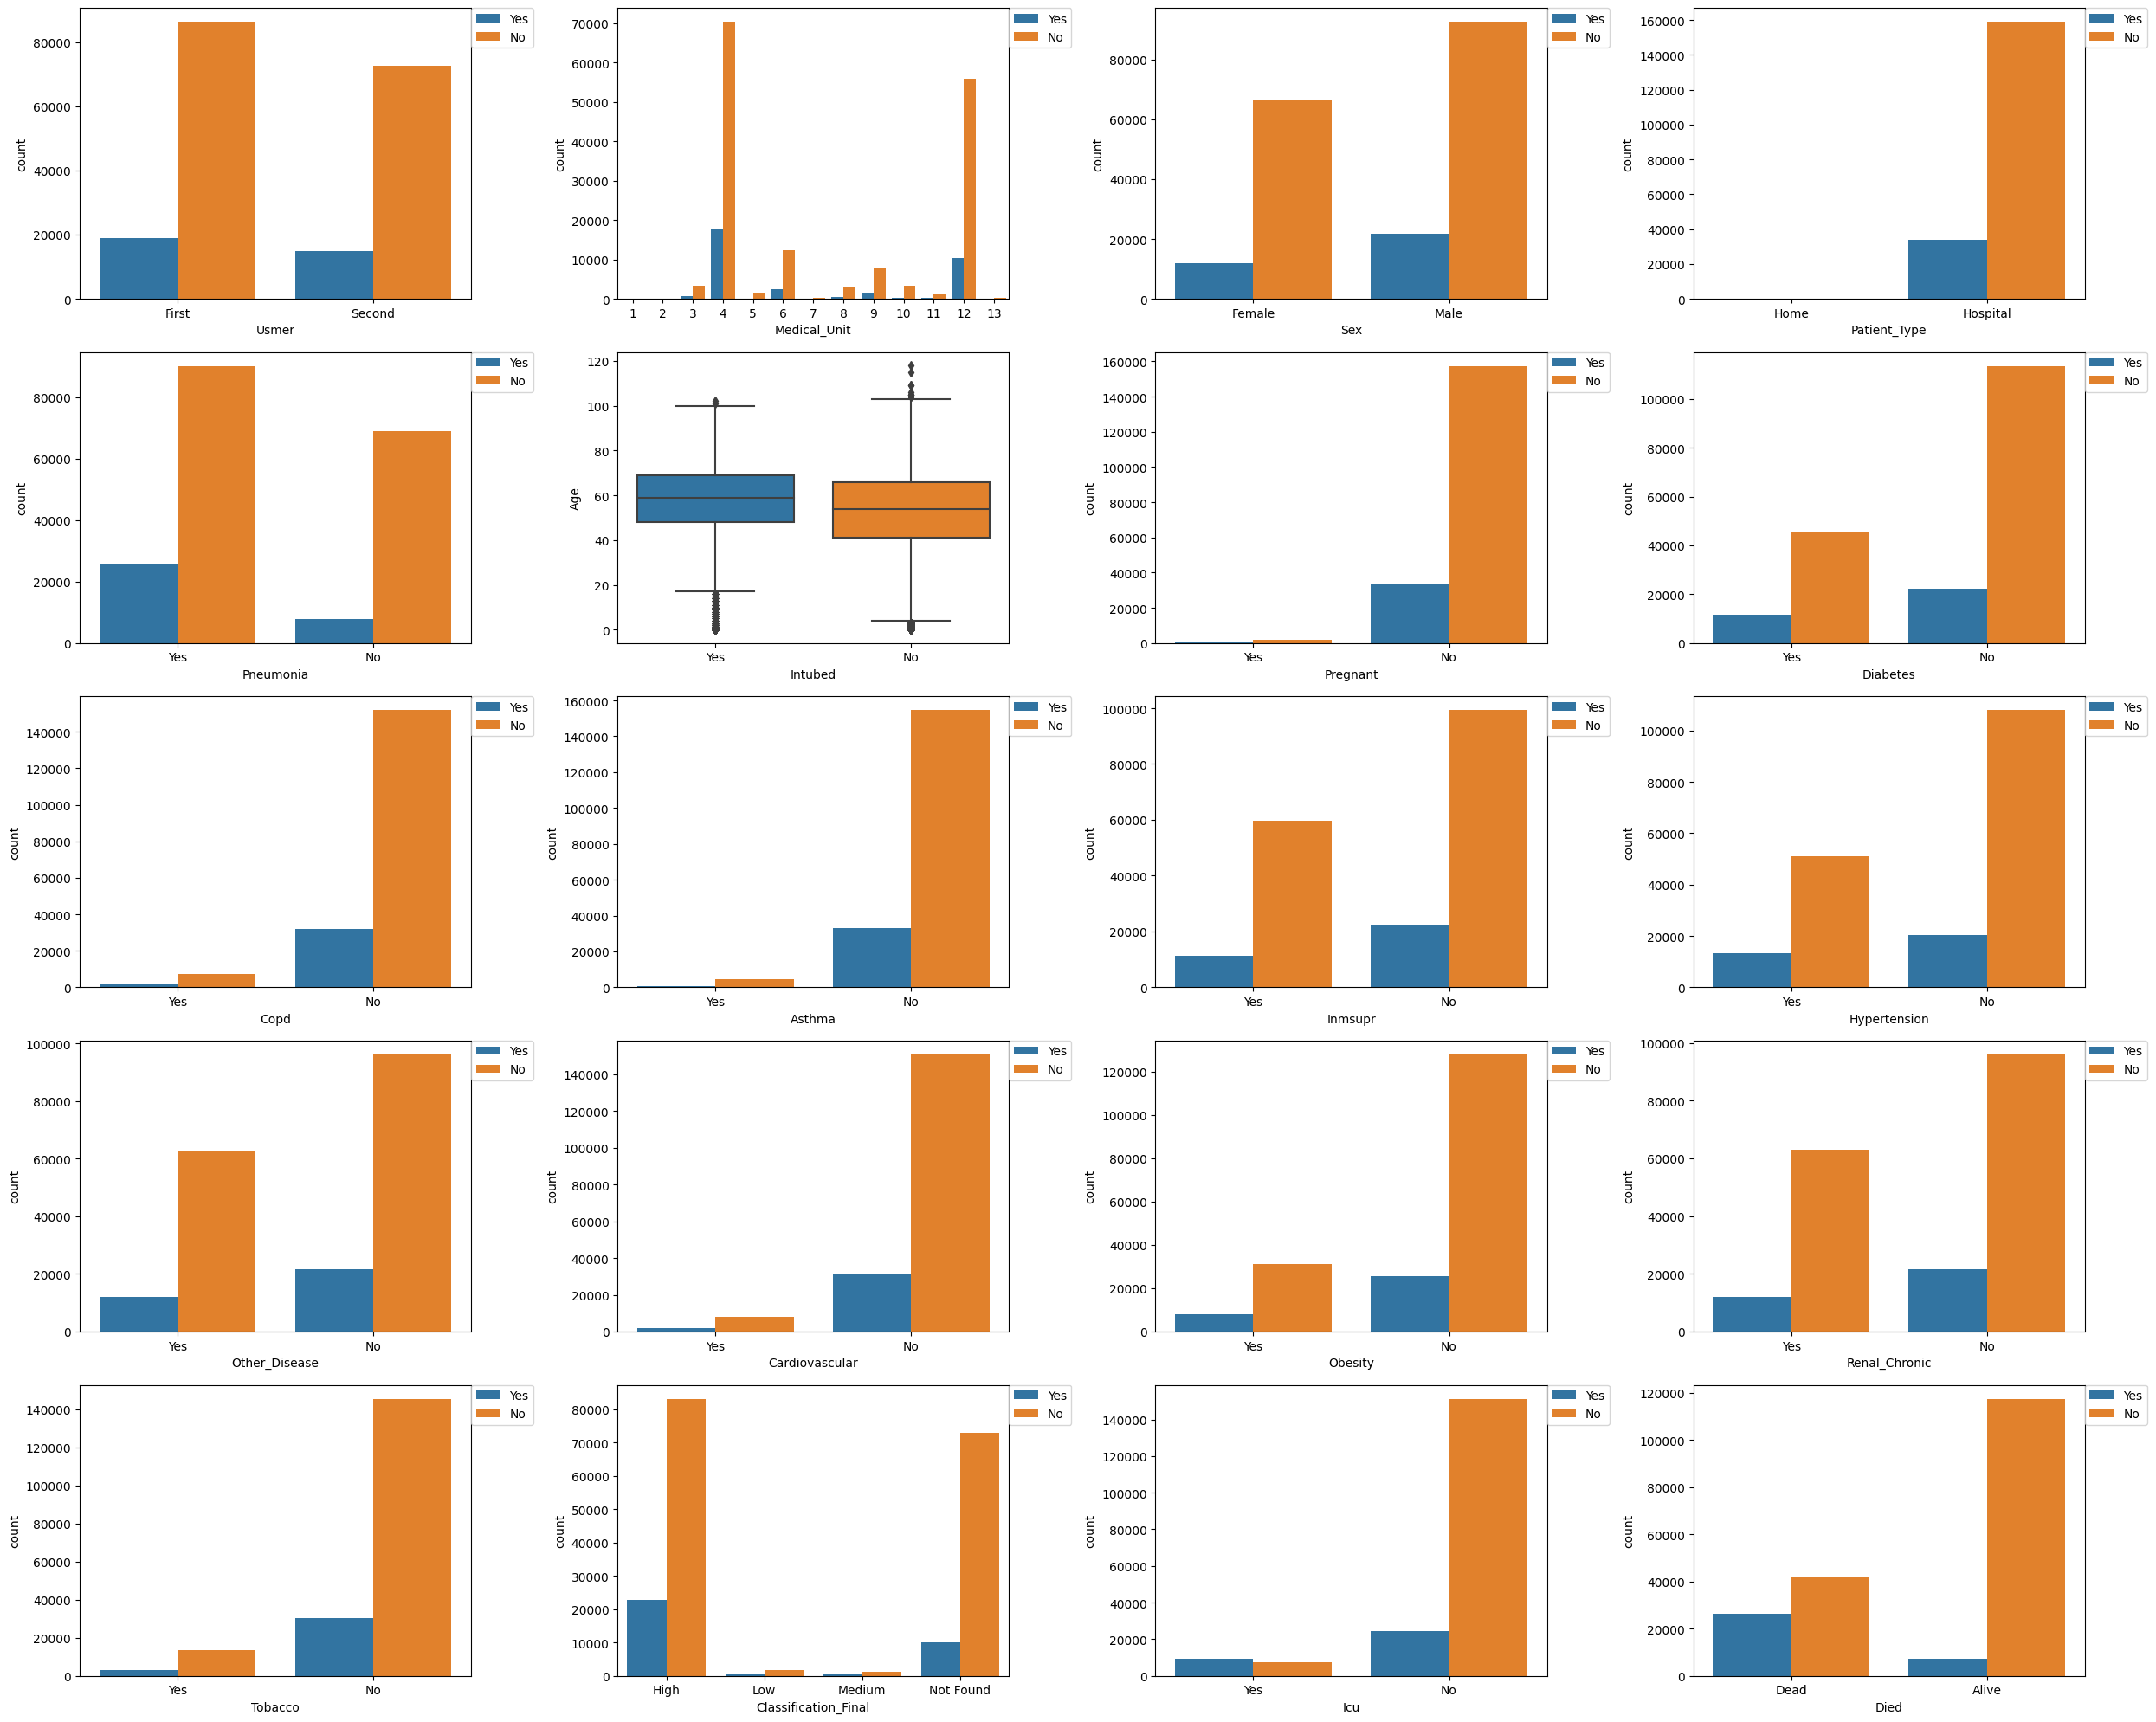

In [64]:
bivariate(y = 'Intubed')

In [65]:
# Assuming Ventilator cannot be used in Home.
# Assigning Intubed and Icu as 'No' for every patient treated as Home (Patient Type: Home)

data.loc[(data['Intubed'].isnull()) & (data['Patient_Type'] == 'Home'), 'Intubed'] = 'No'
data.loc[(data['Icu'].isnull()) & (data['Patient_Type'] == 'Home'), 'Icu'] = 'No'

In [66]:
data[data['Intubed'].notnull()].head()

Usmer Medical_Unit     Sex Patient_Type Intubed Pneumonia  Age Pregnant  \
0  Second            1  Female         Home      No       Yes   65       No   
1  Second            1    Male         Home      No       Yes   72       No   
2  Second            1    Male     Hospital     Yes        No   55       No   
3  Second            1  Female         Home      No        No   53       No   
4  Second            1    Male         Home      No        No   68       No   

  Diabetes Copd Asthma Inmsupr Hypertension Other_Disease Cardiovascular  \
0       No   No     No      No          Yes            No             No   
1       No   No     No      No          Yes            No             No   
2      Yes   No     No      No           No            No             No   
3       No   No     No      No           No            No             No   
4      Yes   No     No      No          Yes            No             No   

  Obesity Renal_Chronic Tobacco Classification_Final Icu  Died  
0      No            No      No                 High  No  Dead  
1     Yes           Yes      No            Not Found  No  Dead  
2      No            No      No                 High  No  Dead  
3      No            No      No            Not Found  No  Dead  
4      No            No      No                 High  No  Dead

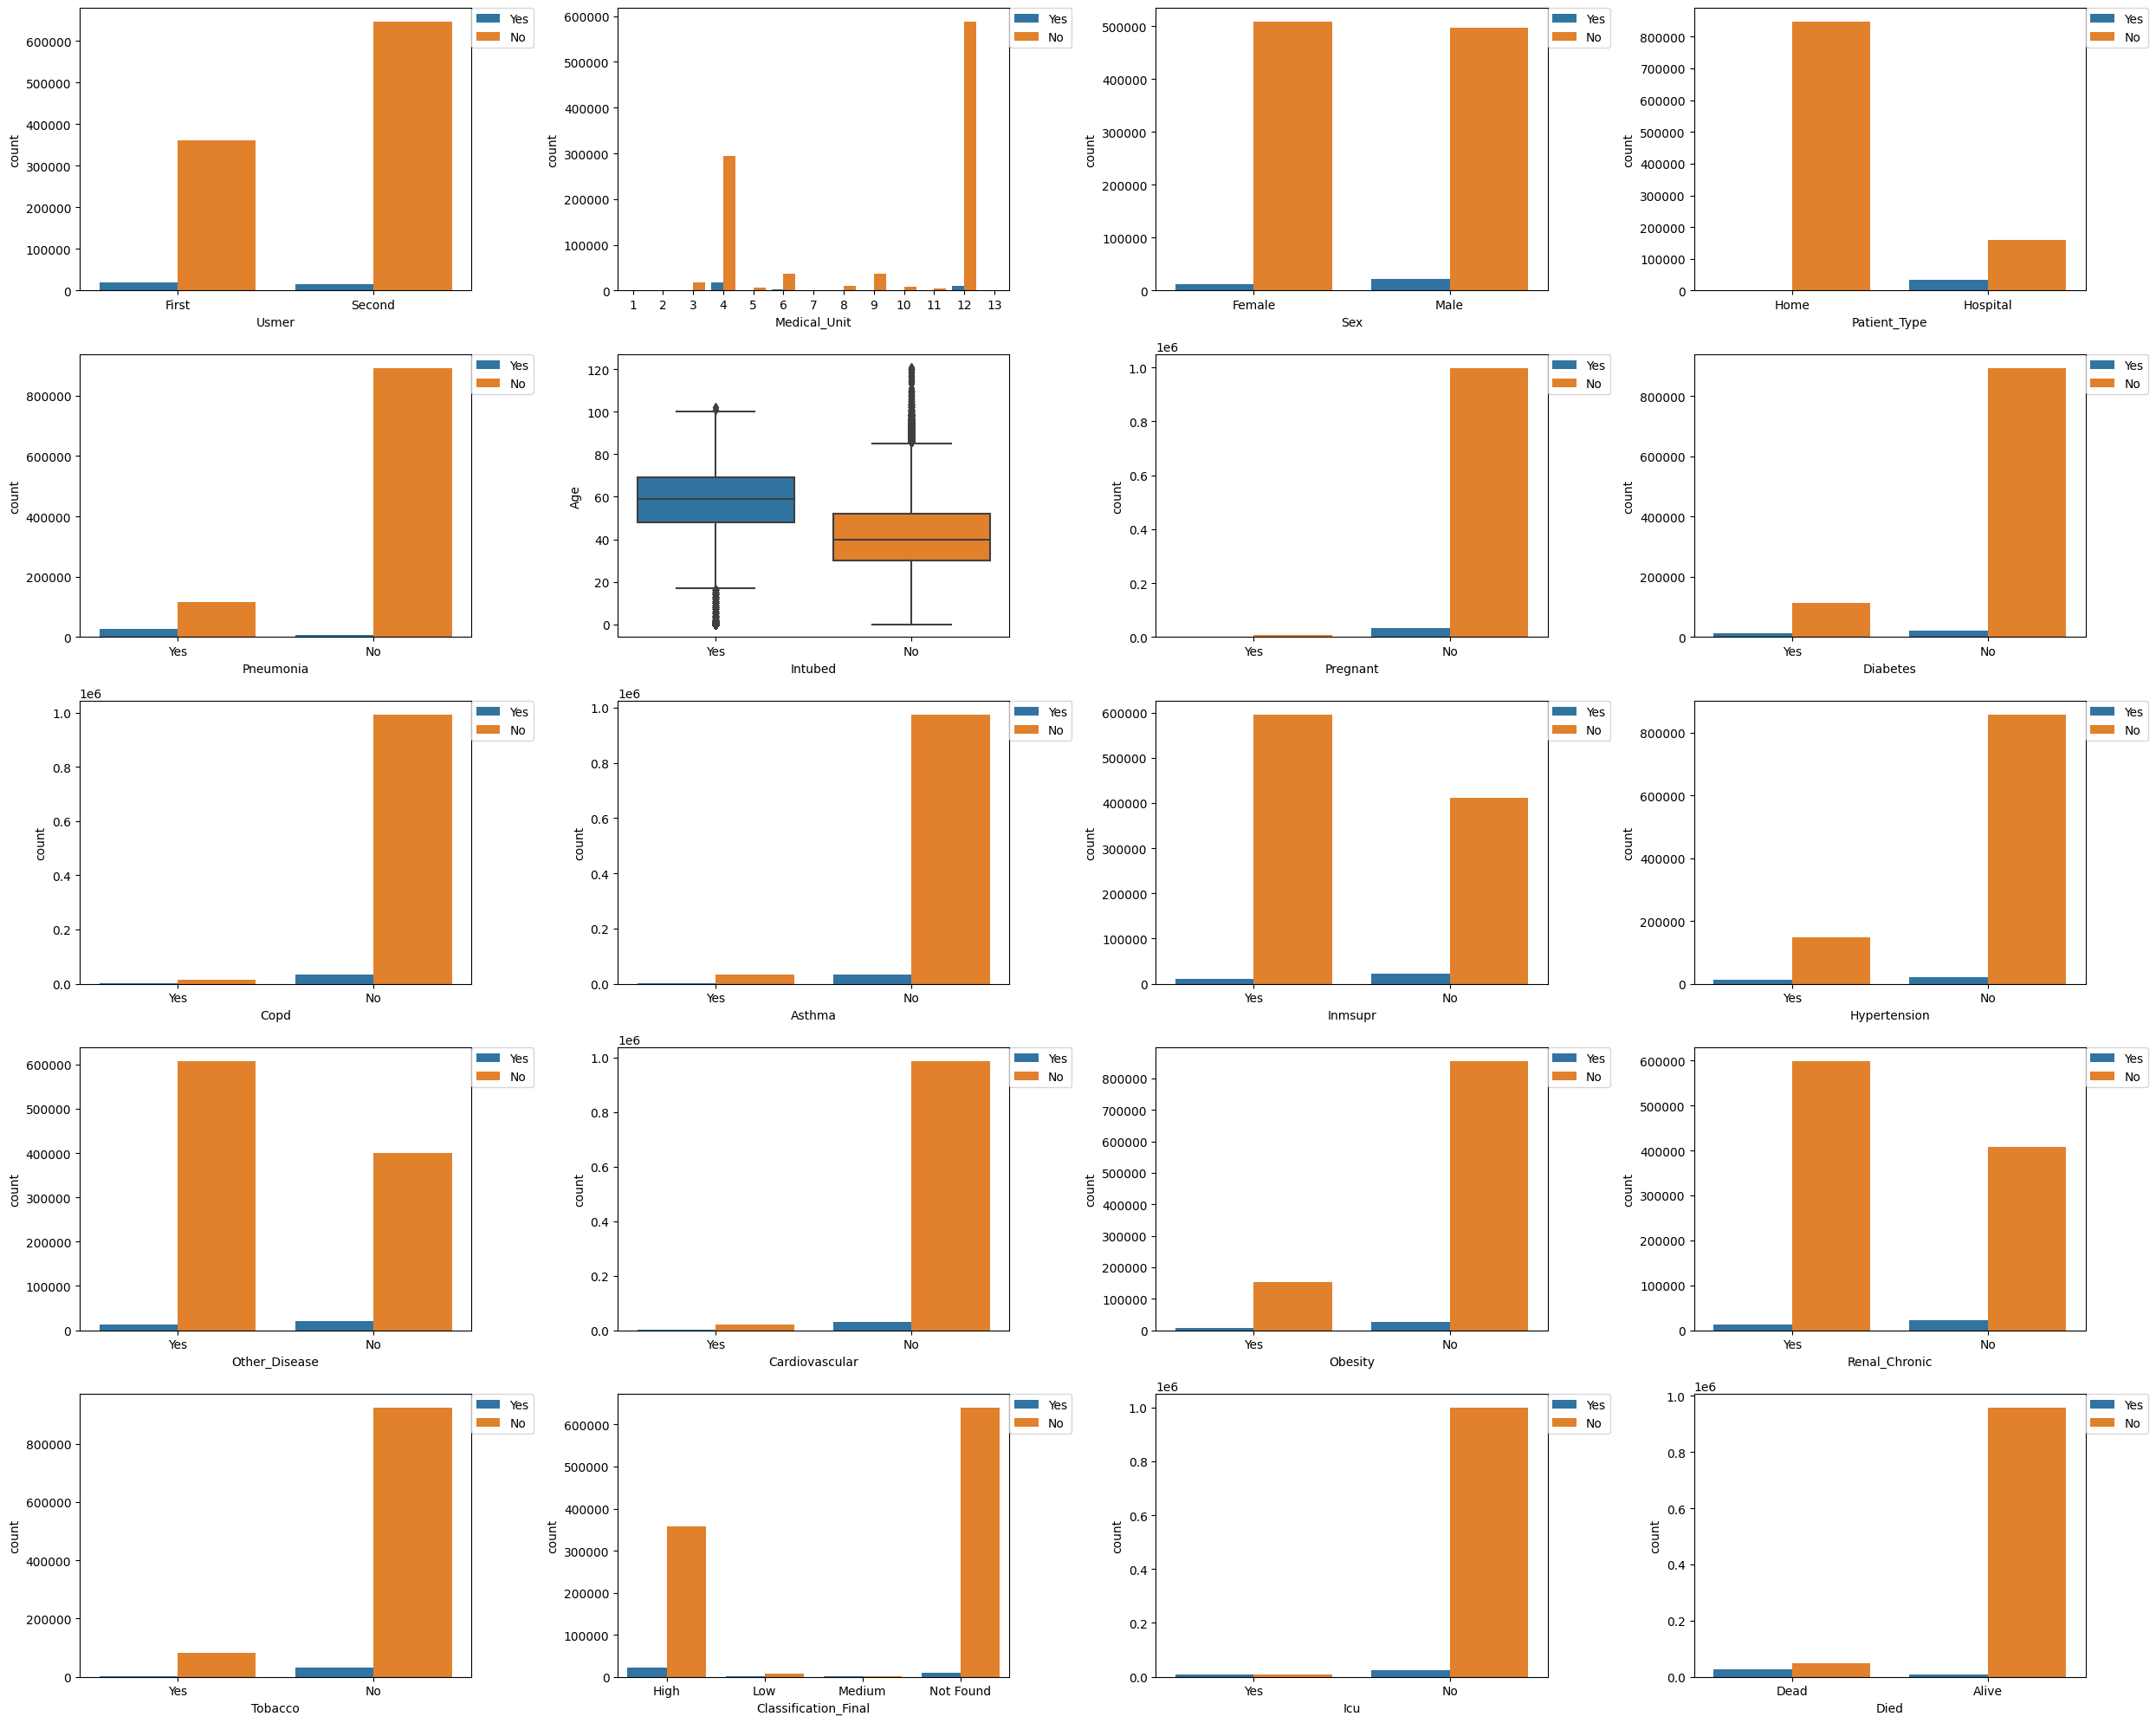

In [67]:
bivariate(y = 'Intubed')

In [68]:
# Temporarily Dropping Intubed and Icu

data.drop(['Intubed', 'Icu'], axis = 1, inplace=True)

In [69]:
data.isnull().sum() [ data.isnull().sum() > 0]

Series([], dtype: int64)

## Encoding Data

In [70]:
lb_data = data.apply(LabelEncoder().fit_transform)

In [71]:
def encod_data(df):

    df = pd.get_dummies(df, columns = ['Usmer', 'Sex', 'Patient_Type', 'Pneumonia', 'Pregnant', 
        'Diabetes', 'Copd', 'Asthma', 'Inmsupr', 'Hypertension', 'Other_Disease', 
        'Cardiovascular', 'Obesity', 'Renal_Chronic', 'Tobacco', 'Died'], drop_first=True)
    
    df['Classification_Final'] = lb_data['Classification_Final']

    return df

In [72]:
en_data = encod_data(data)
en_data.head()

Medical_Unit  Age  Classification_Final  Usmer_Second  Sex_Male  \
0            1   65                     0             1         0   
1            1   72                     3             1         1   
2            1   55                     0             1         1   
3            1   53                     3             1         0   
4            1   68                     0             1         1   

   Patient_Type_Hospital  Pneumonia_No  Pregnant_No  Diabetes_No  Copd_No  \
0                      0             0            1            1        1   
1                      0             0            1            1        1   
2                      1             1            1            0        1   
3                      0             1            1            1        1   
4                      0             1            1            0        1   

   Asthma_No  Inmsupr_No  Hypertension_No  Other_Disease_No  \
0          1           1                0                 1   
1          1           1                0                 1   
2          1           1                1                 1   
3          1           1                1                 1   
4          1           1                0                 1   

   Cardiovascular_No  Obesity_No  Renal_Chronic_No  Tobacco_No  Died_Dead  
0                  1           1                 1           1          1  
1                  1           0                 0           1          1  
2                  1           1                 1           1          1  
3                  1           1                 1           1          1  
4                  1           1                 1           1          1

## Model Building

In [73]:
def split_data(df, target_var = 'Classification_Final'):

    x = df.loc[:, df.columns != target_var]
    y = df[target_var]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=123)

    return x_train, x_test, y_train, y_test

In [74]:
def check_multicol(x):
    plt.figure(figsize=(20, 10))
    sns.heatmap(x.corr(), annot=True)
    plt.show()

In [75]:
def create_cm(model, tup):
    x, xv, y, yv = tup[0], tup[1], tup[2], tup[3]

    model.fit(x, y)
    yp = model.predict(xv)
    
    cm = confusion_matrix(yv, yp)
    cm_df = pd.DataFrame(cm, columns=['Pred: 0', 'Pred: 1', 'Pred: 2', 'Pred: 3'], index = ['Obs: 0', 'Obs: 1', 'Obs: 2', 'Obs: 3'])

    sns.heatmap(cm_df, annot=True, fmt='d')
    plt.show()
    
    print(classification_report(yv, yp))

In [76]:
# Implementing SMOTE

def smote(x, y):
    oversample = SMOTE(random_state = 2, sampling_strategy='minority')
    try:
        x = x.values
        y = y.values
    except:
        pass
    x, y = oversample.fit_resample(x, y)
    return x, y

In [77]:
def equate_classes(df):
    x_train, x_test, y_train, y_test = split_data(df)

    while Counter(y_train).most_common(4)[-1][1] != Counter(y_train).most_common(4)[0][1]:
        x_train, y_train = smote(x_train, y_train)
    
    print(Counter(y_train))
    
    return x_train, y_train

In [100]:
# General Grid Search Model that could be used by all Classification Models. 

def rand_search(model, params, x, y, cm = 'no'):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, random_state = 123)
    
    print(Counter(y_train))
    
    x_train = sc.fit_transform(x_train)
    x_val = sc.transform(x_val)

    grid_mod = RandomizedSearchCV(model, param_distributions=params, scoring = ['accuracy'], cv = 10, n_jobs=10, refit='accuracy')
    grid_mod.fit(x_train, y_train)

    if cm == 'yes':
        create_cm(grid_mod.best_estimator_, (x_train, x_val, y_train, y_val))

    return grid_mod.best_estimator_, grid_mod.best_score_

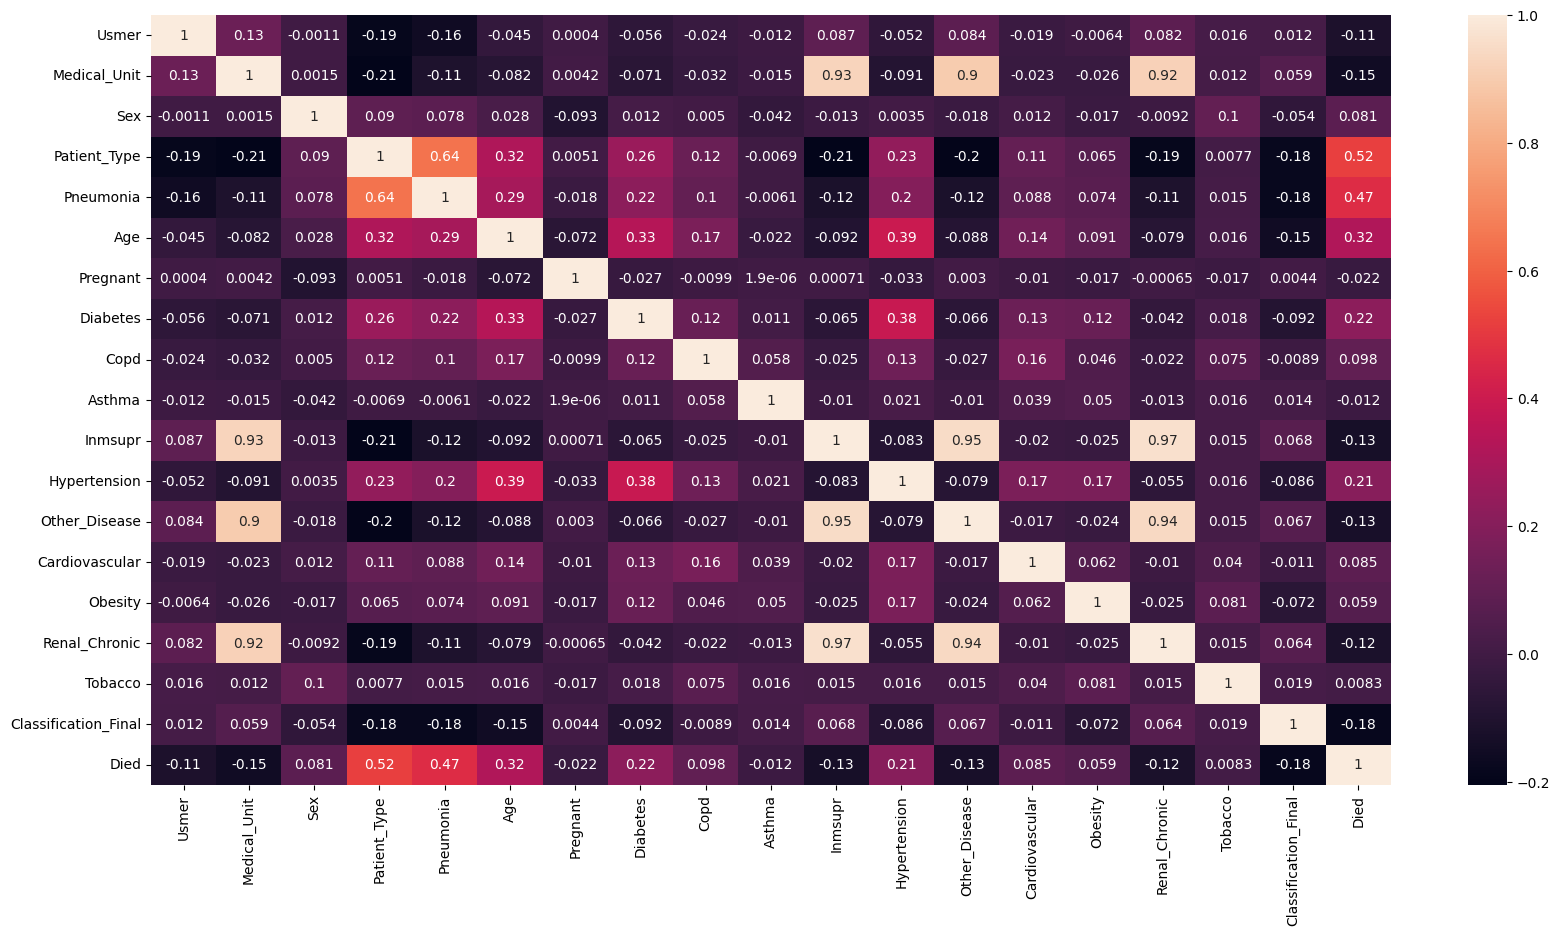

In [79]:
# Checking MultiCollinearity

check_multicol(lb_data)

### Backward feature Elimination

In [80]:
# Removing cols with p-value more than 0.05

def back_feat_elem(df = lb_data):
    x_train, x_test, y_train, y_test = split_data(df) 

    col = x_train.columns

    while len(col) > 0:
        model = dm.MNLogit(y_train, ac(x_train[col]))
        result = model.fit(disp= 0)
        print(result.summary())
        # result['Sum'] = result.sum(axis = 1)
        res = result.summary()
        res['Sum'] = res.sum(axis = 1)
        largest_pvalue = round(res.pvalues, 3).nlargest(1, columns = 'Sum')

        if largest_pvalue[0] < (0.05):
            return result
            break
        else:
            col = col.drop(largest_pvalue.index)

In [81]:
# back_res = back_feat_elem()
# back_res.summary()

In [82]:
# ind = list(back_res.params.index)
# ind.remove('const')
# ind

In [83]:
# new_x = data[ind]
# new_x = en_data
# new_y = data.Classification_Final
# new_df = pd.concat([new_x, new_y], axis=1)
# new_x.head()

In [84]:
# new_en_data = encod_data(new_df)
new_en_data = en_data
new_en_data.head()

Medical_Unit  Age  Classification_Final  Usmer_Second  Sex_Male  \
0            1   65                     0             1         0   
1            1   72                     3             1         1   
2            1   55                     0             1         1   
3            1   53                     3             1         0   
4            1   68                     0             1         1   

   Patient_Type_Hospital  Pneumonia_No  Pregnant_No  Diabetes_No  Copd_No  \
0                      0             0            1            1        1   
1                      0             0            1            1        1   
2                      1             1            1            0        1   
3                      0             1            1            1        1   
4                      0             1            1            0        1   

   Asthma_No  Inmsupr_No  Hypertension_No  Other_Disease_No  \
0          1           1                0                 1   
1          1           1                0                 1   
2          1           1                1                 1   
3          1           1                1                 1   
4          1           1                0                 1   

   Cardiovascular_No  Obesity_No  Renal_Chronic_No  Tobacco_No  Died_Dead  
0                  1           1                 1           1          1  
1                  1           0                 0           1          1  
2                  1           1                 1           1          1  
3                  1           1                 1           1          1  
4                  1           1                 1           1          1

### SMOTE

In [85]:
x, y = equate_classes(new_en_data)

Counter({3: 459482, 0: 459482, 1: 459482, 2: 459482})


### 1.Logistic Regression

In [86]:
# x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, random_state = 123)

# model = dm.MNLogit(y_train, ac(x_train))
# res = model.fit()

# yp = res.predict(ac(x_val))
# y_pred = []

# for i in range(len(yp)):
#     y_pred.append(yp[i].argmax())

# y_pred = np.array(y_pred)

# cm = confusion_matrix(y_val, y_pred)
# cm_df = pd.DataFrame(cm, columns=['Pred: 0', 'Pred: 1', 'Pred: 2', 'Pred: 3'], index = ['Obs: 0', 'Obs: 1', 'Obs: 2', 'Obs: 3'])

# sns.heatmap(cm_df, annot=True, fmt='d')
# plt.show()

# print(classification_report(y_val, y_pred))
# print(res.summary())

### 2. Decision Tree

In [87]:
# params_dt = {
#     'criterion': ['gini','entropy', 'log_loss'],
#     'splitter': ['best', 'random'],
#     'max_depth': [3, 6, 9],
#     'min_samples_leaf': [5, 8, 11],
#     'max_features': ['sqrt', 'log2'],
# }

In [88]:
# mod_dt, acc_dt = rand_search(model = DecisionTreeClassifier(), params = params_dt, x = x, y = y, cm = 'yes')
# acc_dt

### 3. Random Forest

In [89]:
rf_params = {
    'n_estimators': [50, 100, 150, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [10, 15, 20, 25, 40],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'oob_score': [True],
    # 'n_jobs': [-1],
}

Counter({2: 321818, 3: 321689, 0: 321588, 1: 321454})


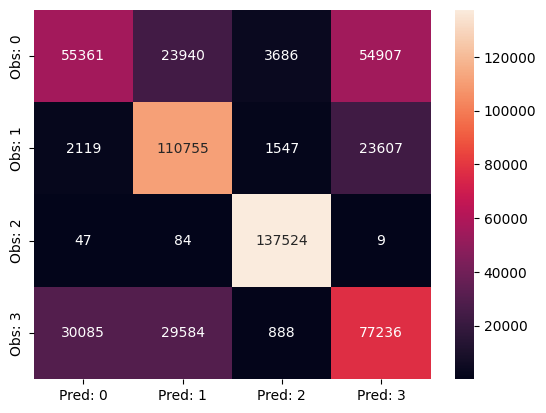

              precision    recall  f1-score   support

           0       0.63      0.40      0.49    137894
           1       0.67      0.80      0.73    138028
           2       0.96      1.00      0.98    137664
           3       0.50      0.56      0.53    137793

    accuracy                           0.69    551379
   macro avg       0.69      0.69      0.68    551379
weighted avg       0.69      0.69      0.68    551379



0.6894335164076805

In [92]:
mod_rf, acc_rf = rand_search(model = RandomForestClassifier(), params = rf_params, x = x, y = y, cm = 'yes')
acc_rf

### 4. SVC

In [101]:
params_svc = {
    'C': [0.1, 1, 10, 15, 20],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'decision_function_shape': ['ovo','ovr']
}

In [102]:
mod_svc, acc_svc = rand_search(model = SVC(), params = params_svc, x = x, y = y, cm='yes')
acc_svc

Counter({2: 321818, 3: 321689, 0: 321588, 1: 321454})


### 5. KNN

In [ ]:
params_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    # 'n_jobs': [-1],
    'p':[0,1,2,'i']
}

In [ ]:
mod_knn, acc_knn = rand_search(model = KNeighborsClassifier(), params = params_knn, x = x, y = y, cm = 'yes')
acc_knn

### 6. Naive Bayes

In [ ]:
params_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [ ]:
mod_nb, acc_nb = rand_search(model = GaussianNB(), params= params_nb, x = x, y = y, cm = 'yes')
acc_nb

In [ ]:
mod = [mod_dt, mod_knn, mod_nb, mod_rf, mod_svc]

### 7. Bagging Classifier

In [ ]:
params_bg = {
    'base_estimator': mod,
    'n_estimators': [10, 20, 30, 40, 50],
    # 'n_jobs':[-1]
}

In [ ]:
mod_bg, acc_bg = rand_search(model = BaggingClassifier(), params = params_bg, x = x, y = y, cm='yes')
acc_bg 

### 8. Ada Boost

In [ ]:
params_ada = {
    'base_estimator': mod,
    'n_estimators': [40, 50, 60, 70, 80, 90],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [ ]:
mod_ada, acc_ada = rand_search(model = AdaBoostClassifier(), params = params_ada, x = x, y = y, cm = 'yes')
acc_ada